<a href="https://colab.research.google.com/github/txu3663-art/Tianrui/blob/main/CHA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Êï∞ÊçÆÊ∏ÖÊ¥ó

ÁßªÈô§ÊñáÊú¨Âûã/ÂàÜÁ±ªÂûãÁ≠âÈùûÊï∞ÂÄºÂèòÈáè‚ÄîÂà†Èô§Áº∫Â§±ÁéáÂ§ß‰∫é40%ÁöÑÂàó‚ÄîÂØπ‰∫é‰∏≠Á≠âÁº∫Â§±ÁéáÂàóÈááÁî®Á∫øÊÄßÊèíÂÄºÂ°´Ë°•‚ÄîÂâ©‰ΩôÁº∫Â§±ÂÄºÁî®‰∏≠‰ΩçÊï∞Â°´Ë°•‚ÄîÁßªÈô§Êó†ÂèòÂåñÂàó

/tmp/ipython-input-2339844248.py:39: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


FileNotFoundError: [Errno 2] No such file or directory: 'Data cleaning/interpolation_before.png'

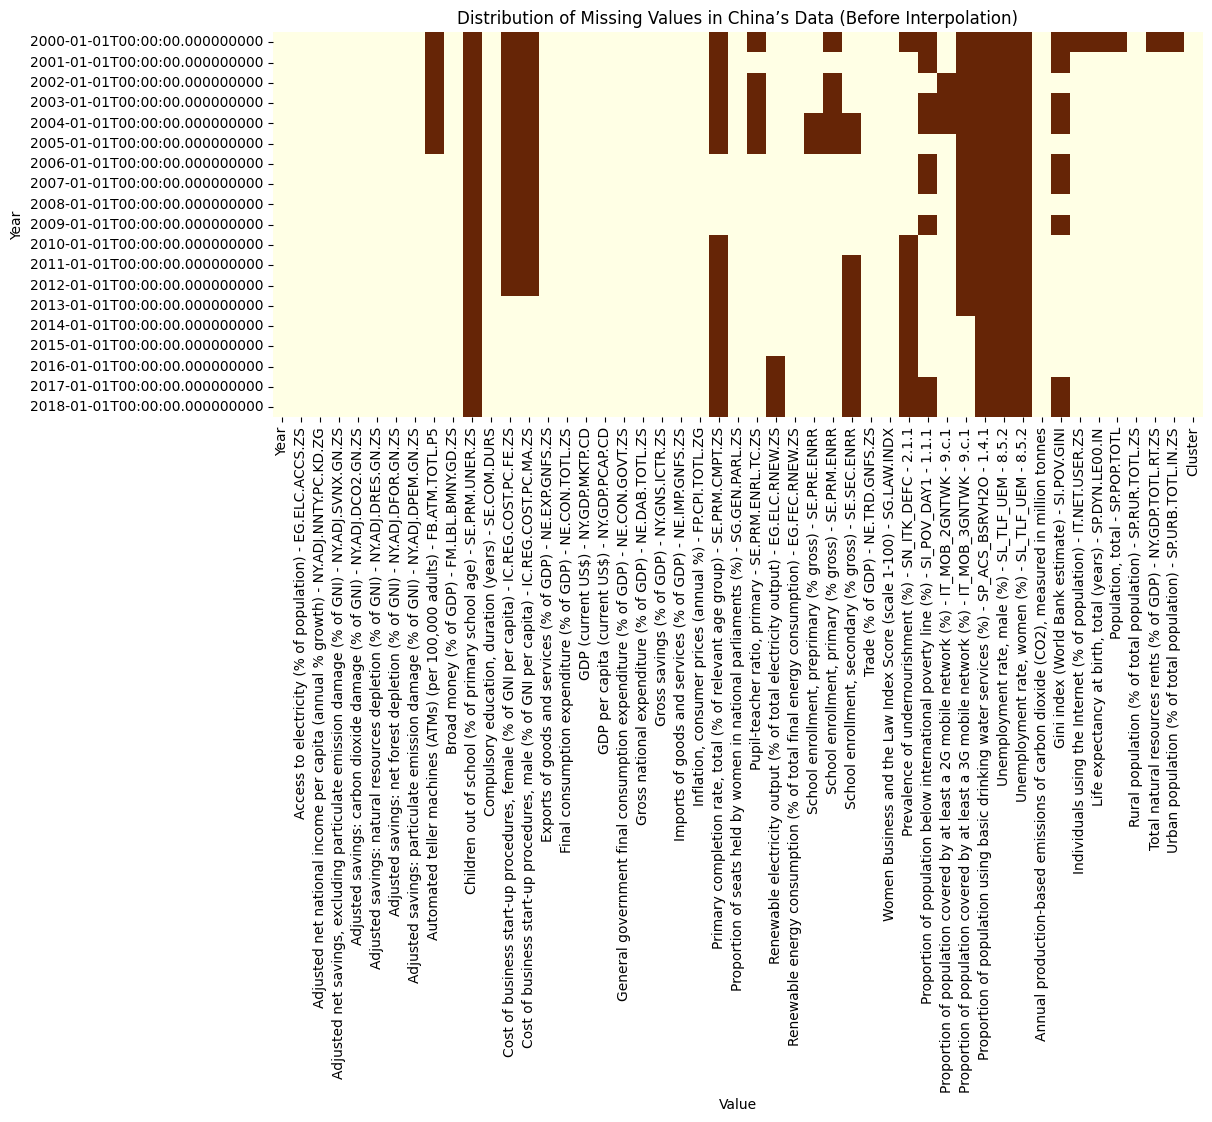

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================
# 1. ËØªÂèñÂéüÂßãÊï∞ÊçÆ
# ==============================
file_path = "cluster_1_data.csv"  # ÂéüÂßãÊï∞ÊçÆË∑ØÂæÑ
df = pd.read_csv(file_path)

# ==============================
# 2. Á≠õÈÄâÂá∫‰∏≠ÂõΩÊï∞ÊçÆ
# ==============================
china_df = df[df["Country Name"] == "China"].copy()

# ==============================
# 3. Âà†Èô§ÈùûÊï∞ÂÄºÂûãÂèòÈáè
# ==============================
numeric_df = china_df.select_dtypes(include=["number"]).copy()

# ==============================
# 4. ËÆæÁΩÆÊó∂Èó¥Á¥¢ÂºïÔºàÁî®‰∫éÊó∂Èó¥ÊèíÂÄºÔºâ
# ==============================
# ÂÅáÂÆöÂπ¥‰ªΩÂàóÂêç‰∏∫ "Year"
if "Year" in china_df.columns:
    numeric_df.index = pd.to_datetime(china_df["Year"], format='%Y')
    numeric_df = numeric_df.sort_index()  # Á°Æ‰øùÊåâÊó∂Èó¥ÊéíÂ∫è
else:
    raise ValueError("Êï∞ÊçÆ‰∏≠Áº∫Â∞ë 'Year' ÂàóÔºåÊó†Ê≥ïËøõË°åÊó∂Èó¥ÊèíÂÄº„ÄÇ")

# ==============================
# 5. ÂèØËßÜÂåñÁº∫Â§±ÂÄºÂàÜÂ∏É
# ==============================
plt.figure(figsize=(12, 5))
sns.heatmap(numeric_df.isnull(), cbar=False, cmap="YlOrBr")
plt.title("Distribution of Missing Values in China‚Äôs Data (Before Interpolation)")
plt.xlabel("Value")
plt.ylabel("Year")
plt.tight_layout()
plt.savefig("Data cleaning/interpolation_before.png", dpi=300, bbox_inches='tight')
plt.show()

# ==============================
# 6. Áº∫Â§±ÁéáÁªüËÆ°‰∏éÂà†Èô§È´òÁº∫Â§±Âàó
# ==============================
missing_rate = numeric_df.isnull().mean()
filtered_df = numeric_df.loc[:, missing_rate <= 0.4]

# ==============================
# 7. ‰∏•Ë∞®ÁöÑÊó∂Èó¥ÊèíÂÄº
# ==============================
# Âü∫‰∫éÊó∂Èó¥Á¥¢ÂºïÁöÑÁ∫øÊÄßÊèíÂÄºÔºàÂèØÊâ©Â±ï‰∏∫ spline„ÄÅpolynomialÔºâ
medium_missing_cols = missing_rate[(missing_rate > 0) & (missing_rate <= 0.4)].index
interpolated_df = filtered_df.copy()
interpolated_df.loc[:, medium_missing_cols] = interpolated_df[medium_missing_cols].interpolate(
    method="time", limit_direction="both"
)

# ==============================
# 8. Ââ©‰ΩôÁº∫Â§±ÂÄºÁî®‰∏≠‰ΩçÊï∞Â°´Ë°•
# ==============================
interpolated_df = interpolated_df.fillna(interpolated_df.median())

# ==============================
# 9. ÁßªÈô§Êó†ÂèòÂåñÂàó
# ==============================
cleaned_df = interpolated_df.loc[:, interpolated_df.nunique() > 1]

# ==============================
# 10. ÊèíÂÄºÂâçÂêéÂØπÊØîÂèØËßÜÂåñ
# ==============================
example_col = medium_missing_cols[0] if len(medium_missing_cols) > 0 else cleaned_df.columns[0]
plt.figure(figsize=(10, 5))
plt.plot(numeric_df.index, numeric_df[example_col], 'o-', label='orignial data (include missing value)', alpha=0.6)
plt.plot(cleaned_df.index, cleaned_df[example_col], 's--', label='data after interpolation', alpha=0.8)
plt.title(f"comparation between before and after interpolationÔºö{example_col}")
plt.xlabel("year")
plt.ylabel("value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Data cleaning/interpolation_.png", dpi=300, bbox_inches='tight')
plt.show()

# ==============================
# 11. Áº∫Â§±‰øÆÂ§çÂêéÁÉ≠ÂäõÂõæ
# ==============================
plt.figure(figsize=(12, 5))
sns.heatmap(cleaned_df.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Distribution of Missing Values in China‚Äôs Data (After Interpolation)")
plt.xlabel("Value")
plt.ylabel("Year")
plt.savefig("Data cleaning/interpolation_comparison after.png", dpi=300, bbox_inches='tight')
plt.show()

# ==============================
# 12. ‰øùÂ≠òÊ∏ÖÊ¥óÂêéÁöÑÁªìÊûú
# ==============================
output_path = "China_cleaned_final.csv"
cleaned_df.to_csv(output_path, index=True)
print(f"Ê∏ÖÊ¥óÂÆåÊàêÔºÅËæìÂá∫Êñá‰ª∂Ôºö{output_path}")

‚ë† Êó∂Èó¥ÊèíÂÄºÔºàmethod='time'Ôºâ

Áõ∏ÊØîÊôÆÈÄöÁ∫øÊÄßÊèíÂÄºÔºåËøôÁßçÊñπÊ≥ïÂà©Áî®Êó∂Èó¥Á¥¢ÂºïËøõË°åÊèíÂÄºÔºåËÉΩÊõ¥ÂáÜÁ°ÆÂú∞Â§ÑÁêÜ‰∏çÁ≠âÊó∂Èó¥Èó¥ÈöîÁöÑÊï∞ÊçÆÔºåÊØîÂ¶ÇÂΩìÈÉ®ÂàÜÂπ¥‰ªΩÁº∫Â§±Êó∂ÔºåÂÆÉÊåâÁúüÂÆûÊó∂Èó¥Ë∑®Â∫¶‰º∞ÁÆóÂèòÂåñÈÄüÁéá„ÄÇ

‚ë° Áº∫Â§±ÂÄºÁÉ≠ÂäõÂõæÔºàHeatmapÔºâ

Âú®Ê∏ÖÊ¥óÂâçÂêéÂàÜÂà´Â±ïÁ§∫Áº∫Â§±ÊÉÖÂÜµ„ÄÇ

Ê∑±Ëâ≤ ‚Üí ÊúâÂÄº

ÊµÖËâ≤ ‚Üí Áº∫Â§±

ÂÆÉËÉΩÂø´ÈÄüÊè≠Á§∫Âì™‰∫õÊåáÊ†áÁº∫Â§±‰∏•ÈáçÔºåÂì™‰∫õÂπ¥‰ªΩÊï∞ÊçÆ‰∏çÂÖ®„ÄÇ

‚ë¢ ÊèíÂÄºÂâçÂêéÊõ≤Á∫øÂØπÊØîÂõæ

Áõ¥ËßÇÂ±ïÁ§∫ÊèíÂÄºÂπ≥ÊªëÊïàÊûú„ÄÇ

ÂèØ‰ª•Á´ãÂç≥ÁúãÂà∞ÊèíÂÄºÊòØÂê¶ÂêàÁêÜ‚Äî‚ÄîËã•ÊèíÂÄºÂêéÊõ≤Á∫ø‚ÄúËøá‰∫éÂπ≥Êªë‚ÄùÊàñ‚ÄúËøùËÉåË∂ãÂäø‚ÄùÔºåËØ¥ÊòéËØ•ÂèòÈáèÂèØËÉΩÈúÄË¶ÅÊõ¥È´òÈò∂ÊèíÂÄºÊñπÊ≥ïÔºàÂ¶Ç splineÔºâ„ÄÇ



---



---



Âü∫‰∫é XGBoost ÂõûÂΩíÊ®°ÂûãÁöÑ‰∏≠ÂõΩÁ¢≥ÊéíÊîæÊçüÂÆ≥ÂÖ≥ÈîÆÈ©±Âä®Âõ†Á¥†ËØÜÂà´

Renewable energy consumption (% of total final energy consumption) ÂèçÊò†‰∏Ä‰∏™ÂõΩÂÆ∂ËÉΩÊ∫êÁªìÊûÑÁöÑÁªøËâ≤ÂåñÁ®ãÂ∫¶ÔºåÊòØË°°ÈáèËÉΩÊ∫êËΩ¨Âûã‰∏é‰ΩéÁ¢≥ÂèëÂ±ïÊ∞¥Âπ≥ÁöÑÈáçË¶ÅÊåáÊ†á„ÄÇ

ÈÄöËøáÊú∫Âô®Â≠¶‰π†Âª∫Ê®°‰∏é SHAP Ëß£ÈáäÂàÜÊûêÔºåÂèØ‰ª•Êè≠Á§∫Ôºö

Âì™‰∫õÂÆèËßÇÁªèÊµéÂèòÈáèÔºàÂ¶ÇÁîµÂäõÊôÆÂèäÁéá„ÄÅÂ∑•‰∏öÁªìÊûÑ„ÄÅÂõΩÈôÖË¥∏Êòì„ÄÅÂÇ®ËìÑÁéá„ÄÅÊ±°ÊüìÊàêÊú¨Ôºâ

ÂØπÂèØÂÜçÁîüËÉΩÊ∫ê‰ΩøÁî®ÊúÄÂÖ∑ÂΩ±ÂìçÂäõÔºõ

Ëøô‰∫õÂõ†Á¥†ÊòØ‰øÉËøõËøòÊòØÊäëÂà∂ÂèØÂÜçÁîüËÉΩÊ∫êÊØî‰æãÊèêÂçáÔºõ

‰∏çÂêåÊó∂Èó¥ÊÆµÂÜÖÔºåÈ©±Âä®Âõ†Á¥†ÁöÑ‰ΩúÁî®ÊòØÂê¶Á®≥ÂÆö„ÄÇ

ËøôÁßçÊñπÊ≥ïÂÖºÂÖ∑È¢ÑÊµãÊÄß‰∏éËß£ÈáäÊÄßÔºå‰∏∫ÊîøÁ≠ñÂà∂ÂÆöÊèê‰æõÊï∞ÊçÆ‰æùÊçÆ„ÄÇ

ËæìÂá∫ÁªìÊûú‰∏éÂê´‰πâÔºö

| ËæìÂá∫Êñá‰ª∂                                       | Âê´‰πâ                     | Áî®ÈÄî                  |
| ------------------------------------------ | ---------------------- | ------------------- |
| **xgb_feature_importance_RENEW_fixed.csv** | Ê®°Âûã‰∏≠Êåâ‚ÄúÂ¢ûÁõäÔºàgainÔºâ‚ÄùÊéíÂ∫èÁöÑÁâπÂæÅÈáçË¶ÅÊÄß | ËØ¥ÊòéÊ®°ÂûãÊúÄ‰æùËµñÂì™‰∫õÂèòÈáèËøõË°åÈ¢ÑÊµã     |
| **shap_importance_RENEW_fixed.csv**        | Âπ≥ÂùáÁªùÂØπ SHAP ÂÄºÊéíÂ∫èÁöÑÂÖ®Â±ÄÈáçË¶ÅÊÄß    | Ë°°ÈáèÊØè‰∏™ÂèòÈáèÂØπÈ¢ÑÊµãÂÄºÂèòÂåñÁöÑÂπ≥ÂùáË¥°ÁåÆÂº∫Â∫¶ |
| **xgb_feature_importance_RENEW_fixed.png** | XGBoost gain ÈáçË¶ÅÊÄßÂèØËßÜÂåñ    | Â±ïÁ§∫Ââç 15 ‰∏™ÂÖ≥ÈîÆÁâπÂæÅÁöÑÈáçË¶ÅÁ®ãÂ∫¶   |
| **shap_importance_RENEW_fixed.png**        | SHAP ÂÖ®Â±ÄÁâπÂæÅÊù°ÂΩ¢Âõæ           | Â±ïÁ§∫Êï¥‰ΩìÂΩ±ÂìçÂäõÁªìÊûÑ           |
| **shap_dependence_RENEW_fixed_*.png**      | Ââç 3 ‰∏™ÂÖ≥ÈîÆÁâπÂæÅÁöÑ SHAP ‰æùËµñÂõæ    | Êè≠Á§∫ÂèòÈáèÂØπÁõÆÊ†áÁöÑÊ≠£Ë¥üÂΩ±ÂìçÊñπÂêë‰∏éÈòàÂÄºÊïàÂ∫î |
| **ÊéßÂà∂Âè∞ÊåáÊ†áËæìÂá∫ÔºàR¬≤, MAEÔºâ**                       | Ê®°ÂûãÈ¢ÑÊµãÊÄßËÉΩ                 | Ë°°ÈáèÊ®°ÂûãÂØπÂéÜÂè≤Ë∂ãÂäøÊãüÂêàÁ®ãÂ∫¶       |


ÁâπÂæÅÁ≠õÈÄâÈÄªËæëÔºàFeature Filtering LogicÔºâ

Êï∞ÊçÆÈõÜ‰∏≠ÂæÄÂæÄÂåÖÂê´Êï∞Áôæ‰∏™ÂÆèËßÇÂèòÈáè„ÄÇ

Á≠õÈÄâÈÄªËæëÂ¶Ç‰∏ãÔºö

1.Á±ªÂûãÁ≠õÈÄâ

Âè™‰øùÁïôÊï∞ÂÄºÂûãÂàóÔºàÈÅøÂÖçÊñáÊú¨Á±ªÊàñÁ±ªÂà´ÂèòÈáèÂΩ±ÂìçÊ®°ÂûãËÆ≠ÁªÉÔºâ„ÄÇ

2.ÂÜó‰ΩôÊéíÈô§

Âà†Èô§Ê†áËØÜÊÄßÂàóÔºàÂ¶Ç Year„ÄÅClusterÔºâÔºåËøô‰∫õÂàó‰∏çËÉΩ‰Ωú‰∏∫È¢ÑÊµãÂõ†Â≠ê„ÄÇ

3.‰ø°ÊÅØÈáèÁ≠õÈÄâ

Âà†Èô§ÂÆåÂÖ®‰∏∫Á©∫ÊàñÊñπÂ∑Æ‰∏∫Èõ∂ÁöÑÂàóÔºàÂç≥Êó†ÂèòÂåñÁâπÂæÅÔºâ„ÄÇ

4.Áº∫Â§±ÂÄºÂ°´Ë°•

‰∏≠‰ΩçÊï∞Â°´Ë°•Ôºå‰øùÊåÅÁâπÂæÅÂ∞∫Â∫¶‰∏ÄËá¥ÔºåÈÅøÂÖçÊûÅÂÄºÂπ≤Êâ∞„ÄÇ

5.Ê®°ÂûãÂÜÖÁâπÂæÅÁ≠õÈÄâ

XGBoost Ëá™Â∏¶‚ÄúÁâπÂæÅÈáçË¶ÅÊÄßËØÑ‰º∞‚ÄùÊú∫Âà∂ÔºåÂú®Âª∫Ê®°‰∏≠Ëá™Âä®Âº±Âåñ‰ΩéË¥°ÁåÆÁâπÂæÅ„ÄÇ

ËøôÂ±û‰∫é ÈöêÂºèÁâπÂæÅÈÄâÊã©Ôºàembedded feature selectionÔºâ„ÄÇ

Âõ†Ê≠§ÔºåÊúÄÁªàÁªìÊûú‰∏≠ÁöÑ Top ÁâπÂæÅÊòØÊ®°ÂûãÂÆûÈôÖÂ≠¶‰π†‰∏≠ÊúÄÂÖ∑Ëß£ÈáäÂäõÁöÑÂèòÈáèÈõÜÂêà„ÄÇ

Êó∂Èó¥Êï∞ÊçÆÂàíÂàÜÈÄªËæëÔºàTemporal Split LogicÔºâ

‰∏éÈöèÊú∫ÊäΩÊ†∑‰∏çÂêåÔºåÊú¨Á†îÁ©∂‰ΩøÁî®Êó∂Èó¥Â∫èÂàóÂàíÂàÜÔºå

ÂéüÂõ†ÊòØÔºöÁªèÊµé‰∏éËÉΩÊ∫êÊï∞ÊçÆÂ≠òÂú®ÊòéÊòæÁöÑÊó∂Èó¥‰æùËµñÁªìÊûÑ„ÄÇ

ÂàíÂàÜÁ≠ñÁï•‰∏∫Ôºö

Â∞ÜÊï∞ÊçÆÊåâÂπ¥‰ªΩÊéíÂ∫èÔºõ

Ââç 80%ÔºàÊó©ÊúüÂπ¥‰ªΩÔºâ ‚Üí ËÆ≠ÁªÉÈõÜÔºåÁî®‰∫éÊãüÂêàÂéÜÂè≤ËßÑÂæãÔºõ

Âêé 20%ÔºàÂêéÊúüÂπ¥‰ªΩÔºâ ‚Üí ÊµãËØïÈõÜÔºåÁî®‰∫éÈ™åËØÅÊ®°ÂûãÂú®‚ÄúÊú™Êù•‚ÄùÊÉÖÂ¢É‰∏ãÁöÑÊ≥õÂåñÊÄßËÉΩ„ÄÇ

ËøôÊ†∑ÂèØÈÅøÂÖç‚ÄúÊú™Êù•‰ø°ÊÅØÊ≥ÑÊºè‚ÄùÔºåÁ°Æ‰øùÊ®°ÂûãËß£ÈáäÁúüÂÆûÂõ†ÊûúÂÖ≥Á≥ªÔºåËÄåÈùûÁªüËÆ°Â∑ßÂêà„ÄÇ

Ê®°ÂûãÈÄâÊã©ÂéüÂõ†ÔºàWhy XGBoostÔºâ

ÈÄâÊã© XGBoost ÁöÑÁêÜÁî±Êúâ‰∏âÔºö

ÈùûÁ∫øÊÄß‰∏é‰∫§‰∫íÊçïÊçâËÉΩÂäõÂº∫

ÂèØÂ§ÑÁêÜ GDP„ÄÅËÉΩÊ∫êÁªìÊûÑ„ÄÅÊ±°ÊüìÊåáÊ†áÁ≠âÈ´òÂ∫¶ÈùûÁ∫øÊÄßÁöÑÁªèÊµéÂèòÈáè„ÄÇ

È≤ÅÊ£íÊÄßÈ´ò

ÂØπÂºÇÂ∏∏ÂÄº„ÄÅÁº∫Â§±ÂÄº‰∏çÊïèÊÑüÔºåËÉΩÈÄÇÂ∫îÂÆèËßÇÊï∞ÊçÆÂô™Â£∞„ÄÇ ÂèØËß£ÈáäÊÄßÂ¢ûÂº∫

ÂèØËæìÂá∫ÁâπÂæÅÈáçË¶ÅÊÄß„ÄÅÂπ∂‰∏é SHAP ÁªìÂêàÂÆûÁé∞Â±ÄÈÉ®Ëß£Èáä„ÄÇ

Áõ∏ÊØîÁ∫øÊÄßÂõûÂΩíÊàñ‰º†ÁªüÁªüËÆ°Ê®°ÂûãÔºåÂÆÉËÉΩÊõ¥ÂÖ®Èù¢ÂàªÁîªÂ§çÊùÇÁöÑÊîøÁ≠ñ‰∏éËÉΩÊ∫êË°å‰∏∫ÂÖ≥Á≥ª„ÄÇ

ËØÑ‰º∞ÊåáÊ†áÁöÑ‰ΩúÁî®ÔºàEvaluation MetricsÔºâ R¬≤ÔºàÂÜ≥ÂÆöÁ≥ªÊï∞Ôºâ

Ë°°ÈáèÊ®°ÂûãÂØπÊï∞ÊçÆÊñπÂ∑ÆÁöÑËß£ÈáäÊØî‰æã„ÄÇ

R¬≤=1 Ë°®Á§∫ÂÆåÁæéÊãüÂêàÔºå

R¬≤<0 Ë°®Á§∫Ê®°ÂûãÊØîÁÆÄÂçïÂπ≥ÂùáÈ¢ÑÊµãÊõ¥Â∑Æ„ÄÇ

Âú®ÁªèÊµéÊó∂Èó¥Â∫èÂàó‰∏≠ÔºåR¬≤ ‰∏ç‰ªÖÂèçÊò†È¢ÑÊµãÁ≤æÂ∫¶Ôºå‰πüÂèçÊò†Ê®°ÂûãÊçïÊçâÁªìÊûÑË∂ãÂäøÁöÑËÉΩÂäõ„ÄÇ

MAEÔºàÂπ≥ÂùáÁªùÂØπËØØÂ∑ÆÔºâ

Ë°®Á§∫È¢ÑÊµãÂÄº‰∏éÁúüÂÆûÂÄºÁöÑÂπ≥ÂùáÂÅèÂ∑ÆÔºàË∂äÂ∞èË∂äÂ•ΩÔºâ„ÄÇ

ÂÆÉÁõ¥ËßÇÂèçÊò†Ê®°ÂûãÁöÑÂπ≥ÂùáÈ¢ÑÊµãËØØÂ∑Æ„ÄÇ

‰∏§ËÄÖÁªìÂêàÂèØ‰ª•Âà§Êñ≠Ê®°ÂûãÁöÑÁ®≥ÂÅ•ÊÄß‰∏éÊñπÂêëÊÄßÂáÜÁ°ÆÂ∫¶„ÄÇ

ÊåáÊ†áËæìÂá∫ÁõÆÁöÑÔºàOutput Interpretation PurposeÔºâ

ËæìÂá∫ÁöÑÊï∞ÂÄºÁªìÊûú‰∏éÂõæÂΩ¢ÁªìÊûúÂÖ±ÂêåÊúçÂä°‰∫éÁ†îÁ©∂Ëß£ÈáäÔºö

R¬≤, MAE ‚Üí È™åËØÅÊ®°ÂûãÊòØÂê¶ÂèØÈù†Ôºõ

Gain ÈáçË¶ÅÊÄß ‚Üí Á°ÆÂÆöÂèòÈáè‚ÄúÁªìÊûÑË¥°ÁåÆ‚ÄùÔºõ

SHAP ÂÄº ‚Üí Êè≠Á§∫ÂèòÈáè‚Äú‰ΩúÁî®ÊñπÂêë‰∏éÂº∫Â∫¶‚ÄùÔºõ

‰æùËµñÂõæ ‚Üí ÂàÜÊûêÂèòÈáèÂèòÂåñÂ¶Ç‰ΩïÂΩ±ÂìçÁõÆÊ†áÔºàÂ¶ÇÂ≠òÂú®ÈòàÂÄºÊàñËæπÁïåÊïàÂ∫îÔºâÔºõ

CSV Êñá‰ª∂ ‚Üí ÊîØÊíëÂèØÈáçÂ§çÊÄßÂàÜÊûê‰∏éÊîøÁ≠ñÈáèÂåñÊä•Âëä„ÄÇ

ÂèØËßÜÂåñÁõÆÁöÑÔºàVisualization ObjectivesÔºâ

ÂèØËßÜÂåñÊòØÊú¨Á†îÁ©∂ÊñπÊ≥ï‰∏≠‰∏çÂèØÊàñÁº∫ÁöÑ‰∏ÄÁéØÔºå ‰∏ç‰ªÖÁî®‰∫éÂ±ïÁ§∫ÁªìÊûúÔºåÊõ¥Áî®‰∫éÁêÜËß£Â§çÊùÇÁ≥ªÁªü‰∏≠ÁöÑÂèòÈáèÂÖ≥Á≥ªÔºö

1.Êù°ÂΩ¢ÂõæÔºàgain / SHAPÔºâ

Áõ¥ËßÇÊòæÁ§∫ÂêÑÂõ†Á¥†ÂØπÊ®°ÂûãÈ¢ÑÊµãÁöÑÈáçË¶ÅÁ®ãÂ∫¶„ÄÇ

2.SHAP ‰æùËµñÂõæ

ÊòæÁ§∫Âçï‰∏™ÁâπÂæÅÁöÑËæπÈôÖÂΩ±Âìç„ÄÇ

‰æãÂ¶ÇÔºåÂΩì‚ÄúÁîµÂäõÊôÆÂèäÁéá‚Äù‰∏äÂçáÊó∂Ôºå

SHAP ÂÄº‰∏∫Ê≠£ ‚Üí Ë°®Á§∫ÂèØÂÜçÁîüËÉΩÊ∫êÂç†ÊØîÂ¢ûÂä†Ôºõ

‰∏∫Ë¥ü ‚Üí Ë°®Á§∫ÊäëÂà∂‰ΩúÁî®„ÄÇ

3.ÂàÜÂ∏ÉÂõæÊàñÊó∂Èó¥Ë∂ãÂäøÂõæÔºàÂèØÊâ©Â±ïÔºâ

ËÉΩËøõ‰∏ÄÊ≠•Êè≠Á§∫ÁâπÂæÅÂΩ±ÂìçÁöÑÈò∂ÊÆµÊÄßÂ∑ÆÂºÇ„ÄÇ

Êú∫Âô®Â≠¶‰π†Ê®°ÂûãÊè≠Á§∫ËÉΩÊ∫êËΩ¨ÂûãËÉåÂêéÁöÑÁªìÊûÑÊÄßÈ©±Âä®Êú∫Âà∂„ÄÇ

ÂÆÉÂ∞ÜÁªüËÆ°ÂàÜÊûê‰∏éËß£ÈáäÂª∫Ê®°ËûçÂêàÔºö

Âú®Êï∞ÊçÆÂ±ÇÈù¢ ‚Üí ÈÄöËøáÊ∏ÖÊ¥ó‰∏éÂ°´Ë°•Á°Æ‰øùÂèØÈù†ÊÄßÔºõ

Âú®Âª∫Ê®°Â±ÇÈù¢ ‚Üí ÈÄöËøá XGBoost Â≠¶‰π†Â§çÊùÇÈùûÁ∫øÊÄßÂÖ≥Á≥ªÔºõ

Âú®Ëß£ÈáäÂ±ÇÈù¢ ‚Üí ÈÄöËøá SHAP ÂÆûÁé∞Ê®°ÂûãÈÄèÊòéÂåñ„ÄÇ

In [ ]:
fig_list = []  # Âª∫ËÆÆÂú®ËÑöÊú¨ÊúÄ‰∏äÈù¢Âª∫‰∏Ä‰∏™ÂÖ®Â±ÄÁ©∫ÂàóË°®

Ê®°ÂûãËØÑ‰º∞ÁªìÊûúÔºàÊó†Êó∂Èó¥ÂèòÈáèÔºâ: R¬≤ = -2.212, MAE = 0.5420


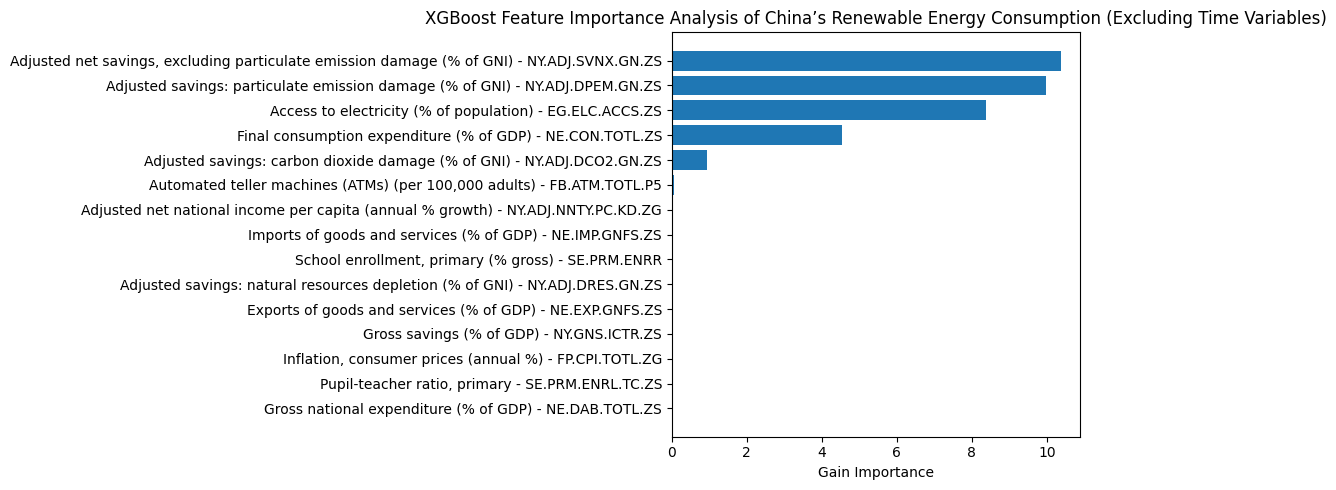

Êó†Ê≥ïÁªòÂà∂XGBoostÁâπÂæÅÈáçË¶ÅÊÄßÂõæÔºö 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


Top15 key factor:(Excluding Time Variables)


feature  gain_importance
2   Adjusted net savings, excluding particulate em...        10.367917
5   Adjusted savings: particulate emission damage ...         9.978808
0   Access to electricity (% of population) - EG.E...         8.375001
8   Final consumption expenditure (% of GDP) - NE....         4.533875
3   Adjusted savings: carbon dioxide damage (% of ...         0.926625
6   Automated teller machines (ATMs) (per 100,000 ...         0.060865
1   Adjusted net national income per capita (annua...         0.013739
11  Imports of goods and services (% of GDP) - NE....         0.011623
14  School enrollment, primary (% gross) - SE.PRM....         0.009440
4   Adjusted savings: natural resources depletion ...         0.001776
7   Exports of goods and services (% of GDP) - NE....         0.001709
10          Gross savings (% of GDP) - NY.GNS.ICTR.ZS         0.001385
12  Inflation, consumer prices (annual %) - FP.CPI...         0.001302
13   Pupil-teacher ratio, primary - SE.PRM.ENRL.TC.ZS         0.000378
9   Gross national expenditure (% of GDP) - NE.DAB...         0.000252

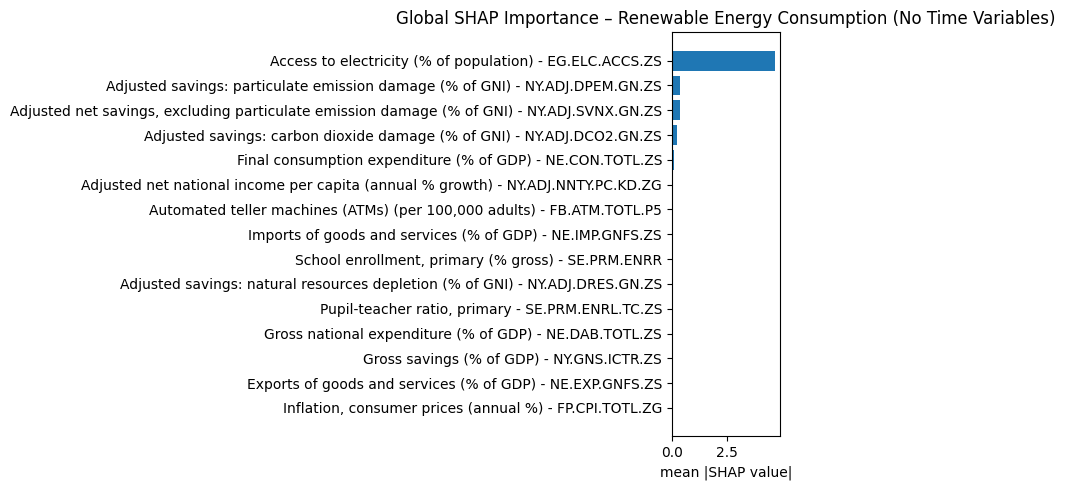

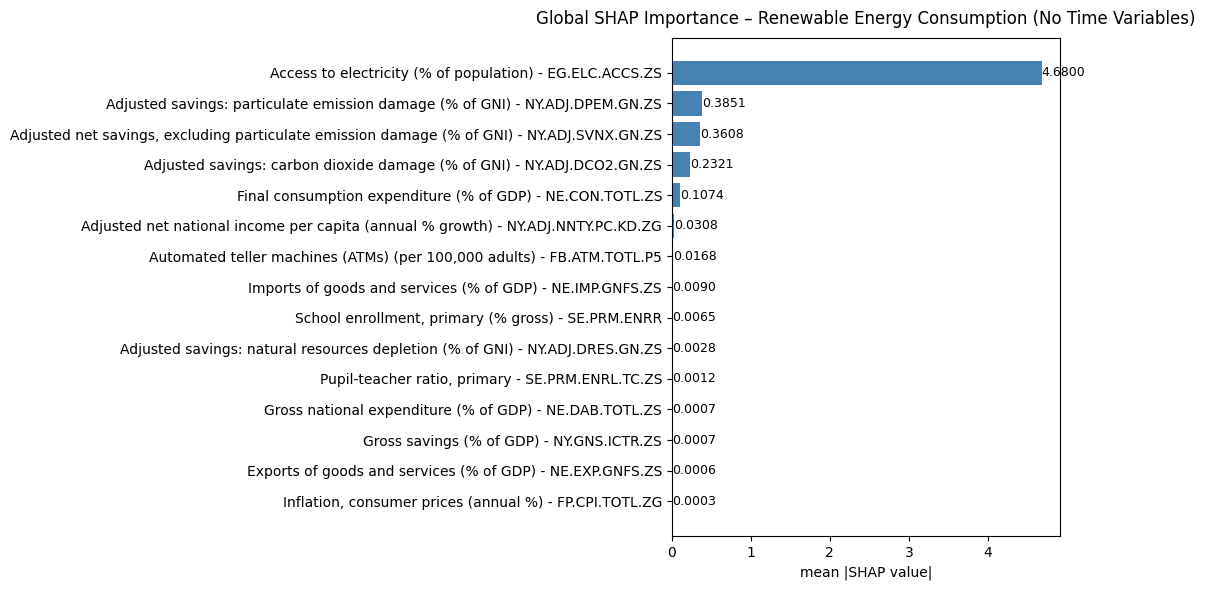

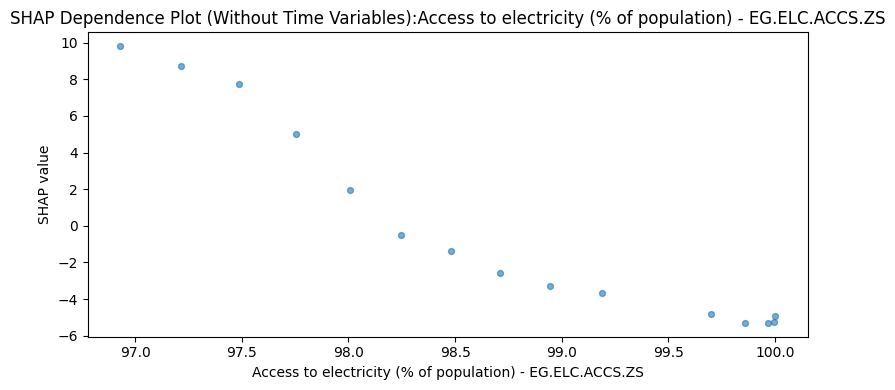

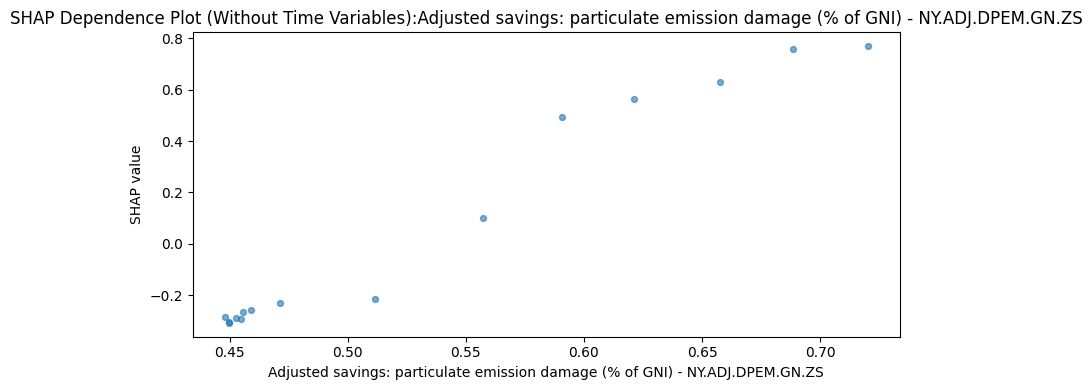

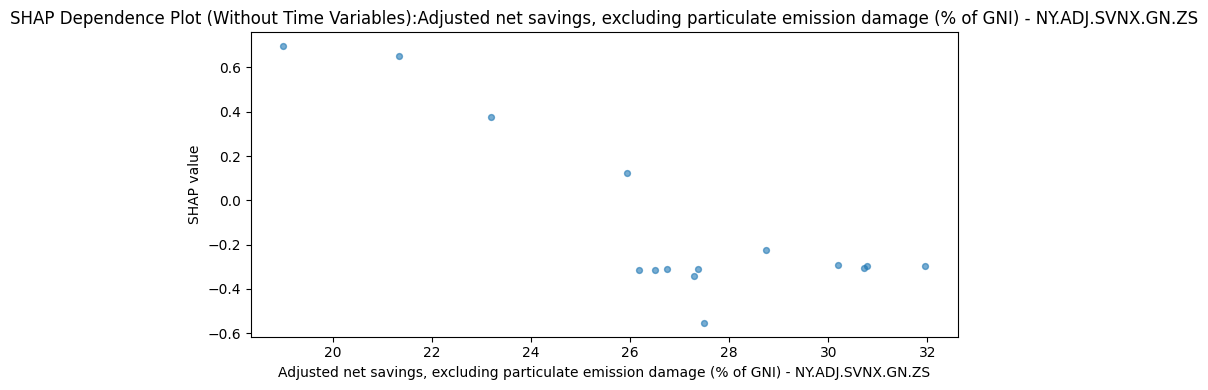


 ÂàÜÊûêÂÆåÊàêÔºåÊâÄÊúâÁªìÊûúÂ∑≤‰øùÂ≠òËá≥Ôºö results_RENEW_noTIME
ÂåÖÊã¨Ôºö
 - xgb_feature_importance_RENEW_noTIME.csv / .png
 - shap_importance_RENEW_noTIME.csv / .png
 - shap_dependence_RENEW_noTIME_*.png


In [ ]:
# -*- coding: utf-8 -*-
"""
‰∏≠ÂõΩÂèØÂÜçÁîüËÉΩÊ∫êÊ∂àË¥πÂç†ÊØî ‚Äî XGBoostÂª∫Ê®°Ôºà‰∏çÂê´Êó∂Èó¥ÂèòÈáèÔºâ
--------------------------------------------------------
ÁõÆÊ†áÂèòÈáèÔºö
  Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS

ÂäüËÉΩÔºö
  1. Ëá™Âä®ËØªÂèñÊ∏ÖÊ¥óÊï∞ÊçÆ
  2. ËÆ≠ÁªÉ XGBoost Ê®°ÂûãÔºàÊó†Êó∂Èó¥ÁâπÂæÅÔºâ
  3. ËæìÂá∫ÁâπÂæÅÈáçË¶ÅÊÄß + SHAPËß£Èáä
  4. ÁªìÊûúÁªü‰∏Ä‰øùÂ≠òÂú® results_RENEW_noTIME Êñá‰ª∂Â§π‰∏≠
  5. Ëá™Âä®Â±ïÁ§∫‰∏ªË¶ÅÂõæË°®
"""

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor, DMatrix
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error

# -----------------------------
# 0. ÁéØÂ¢É‰∏éË∑ØÂæÑÈÖçÁΩÆ
# -----------------------------
OUTDIR = "results_RENEW_noTIME"
os.makedirs(OUTDIR, exist_ok=True)

DATA_PATH = "China_cleaned_final.csv"
TARGET = "Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS"

# -----------------------------
# 1. Êï∞ÊçÆËØªÂèñ‰∏éÈ¢ÑÂ§ÑÁêÜ
# -----------------------------
df = pd.read_csv(DATA_PATH)

if "Country Name" in df.columns:
    china = df[df["Country Name"] == "China"].copy().sort_values("Year")
else:
    china = df.copy().sort_values("Year")

numeric_cols = china.select_dtypes(include=[np.number]).columns.tolist()
for c in [TARGET, "Year", "Year.1", "Cluster"]:
    if c in numeric_cols:
        numeric_cols.remove(c)

X_full = china[numeric_cols]
y_full = china[TARGET]

# Âà†Èô§ÂÖ®Á©∫Âàó + Â°´Ë°•Áº∫Â§±
valid_cols = [c for c in X_full.columns if X_full[c].notna().any()]
X = X_full[valid_cols]
X = pd.DataFrame(SimpleImputer(strategy="median").fit_transform(X), columns=valid_cols)
y = y_full

# 2. Êó∂Èó¥Â∫èÂàóÂàíÂàÜÔºà‰øùÊåÅÈ°∫Â∫èÔºâ

split_idx = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# 3. Ê®°ÂûãËÆ≠ÁªÉ‰∏éËØÑ‰º∞

xgb_model = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_estimators=120,
    learning_rate=0.08,
    max_depth=3,
    subsample=0.9,
    colsample_bytree=0.9,
)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred) if len(y_test.unique()) > 1 else np.nan
mae = mean_absolute_error(y_test, y_pred)

print(f"Ê®°ÂûãËØÑ‰º∞ÁªìÊûúÔºàÊó†Êó∂Èó¥ÂèòÈáèÔºâ: R¬≤ = {r2:.3f}, MAE = {mae:.4f}")

# -----------------------------
# 4. ÁâπÂæÅÈáçË¶ÅÊÄß
# -----------------------------
booster = xgb_model.get_booster()
importance = booster.get_score(importance_type="gain")
feat_imp = (
    pd.DataFrame({
        "feature": list(importance.keys()),
        "gain_importance": list(importance.values())
    })
    .sort_values("gain_importance", ascending=False)
    .head(15)
)

feat_imp_path = os.path.join(OUTDIR, "xgb_feature_importance_RENEW_noTIME.csv")
feat_imp.to_csv(feat_imp_path, index=False)

plt.figure(figsize=(11,5))
plt.barh(feat_imp["feature"][::-1], feat_imp["gain_importance"][::-1])
plt.title("XGBoost Feature Importance Analysis of China‚Äôs Renewable Energy Consumption (Excluding Time Variables)")
plt.xlabel("Gain Importance")
plt.tight_layout()
plt.savefig(os.path.join(OUTDIR, "xgb_feature_importance_RENEW_noTIME.png"), dpi=150)
plt.show()  #Ëá™Âä®ÊòæÁ§∫

#*****‰∫§‰∫íÂõæÊ†á
import plotly.express as px

try:
    # Êää XGBoost ÁöÑ importance ËΩ¨Êç¢Êàê DataFrame
    importance_df = pd.DataFrame({
        "Feature": feat_imp["feature"],
        "Importance": feat_imp["gain_importance"]
    }).sort_values("Importance", ascending=False)

    # ‰ΩøÁî® Plotly Áîª‰∫§‰∫íÂºèÊù°ÂΩ¢Âõæ
    fig1 = px.bar(
        importance_df,
        x="Importance",
        y="Feature",
        orientation="h",
        color="Importance",
        color_continuous_scale="Viridis",
        title="XGBoost Feature Importance Analysis of China‚Äôs Renewable Energy Consumption (No Time Variables)",
        hover_data={"Feature": True, "Importance": ':.4f'}
    )

    # Ë∞ÉÊï¥È°∫Â∫èÔºåËÆ©ÊúÄÈáçË¶ÅÁöÑÂú®‰∏äÈù¢
    fig1.update_layout(
        yaxis=dict(categoryorder="total ascending"),
        template="plotly_white",
        title_font=dict(size=16),
        xaxis_title="Gain Importance",
        yaxis_title=None
    )

    # ÊòæÁ§∫Âõæ
    fig1.show()
    fig_list.append(fig1)

    # ‰øùÂ≠òÊàêÈùôÊÄÅÂõæÁâáÔºàÂèØÈÄâÔºâ
    fig1.write_image(os.path.join(OUTDIR, "xgb_feature_importance_RENEW_noTIME_interactive.png"))


except Exception as e:
    print("Êó†Ê≥ïÁªòÂà∂XGBoostÁâπÂæÅÈáçË¶ÅÊÄßÂõæÔºö", e)

print("\nTop15 key factor:(Excluding Time Variables)")
display(feat_imp)

# -----------------------------
# 5. ÂéüÁîü SHAP ÂÄºËÆ°ÁÆó
# -----------------------------
dtrain = DMatrix(X_train, feature_names=list(X_train.columns))
shap_values = booster.predict(dtrain, pred_contribs=True)
shap_values = shap_values[:, :-1]  # ÂéªÊéâÂÅèÁΩÆÂàó

mean_abs_shap = np.abs(shap_values).mean(axis=0)
shap_importance = pd.DataFrame({
    "feature": X_train.columns,
    "mean_abs_shap": mean_abs_shap
}).sort_values("mean_abs_shap", ascending=False)

shap_imp_path = os.path.join(OUTDIR, "shap_importance_RENEW_noTIME.csv")
shap_importance.to_csv(shap_imp_path, index=False)

plt.figure(figsize=(8,5))
plt.barh(shap_importance["feature"][:15][::-1],
         shap_importance["mean_abs_shap"][:15][::-1])
plt.title("Global SHAP Importance ‚Äì Renewable Energy Consumption (No Time Variables)")
plt.xlabel("mean |SHAP value|")
plt.tight_layout()
plt.savefig(os.path.join(OUTDIR, "shap_importance_RENEW_noTIME.png"), dpi=150)
plt.show()  #


import matplotlib.pyplot as plt
import os

# ÂèñÂâç15‰∏™ÁâπÂæÅ
top15 = shap_importance.head(15)[::-1]  # ÂèçÂ∫èËÆ©ÊúÄÈáçË¶ÅÁöÑÂú®‰∏ä

plt.figure(figsize=(12, 6))  # Á®çÂæÆÂä†ÂÆΩÊ®™ÂêëÁ©∫Èó¥
bars = plt.barh(top15["feature"], top15["mean_abs_shap"], color="steelblue")

plt.title("Global SHAP Importance ‚Äì Renewable Energy Consumption (No Time Variables)",
          fontsize=12, pad=10)
plt.xlabel("mean |SHAP value|")
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Âè≥ËæπÁïôÂá∫ 10% Á©∫Èó¥

# Âú®Êù°ÂΩ¢Âè≥Á´ØÂä†Êï∞ÂÄºÊ†áÁ≠æ
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.0005,              # ÂæÄÂè≥ÂÅè‰∏ÄÁÇπ
             bar.get_y() + bar.get_height()/2,
             f"{width:.4f}",              # Âõõ‰ΩçÂ∞èÊï∞
             va='center', ha='left', fontsize=9, color='black')

# ‰øùÂ≠òÂπ∂Â±ïÁ§∫
plt.savefig(os.path.join(OUTDIR, "shap_importance_RENEW_noTIME_labeled.png"),
            dpi=150, bbox_inches="tight")
plt.show()

# -----------------------------
# 6. ‰æùËµñÂõæÔºàÂâç3ÁâπÂæÅÔºâ
# -----------------------------
top3 = shap_importance["feature"].head(3).values
for f in top3:
    idx = list(X_train.columns).index(f)
    plt.figure(figsize=(8,4))
    plt.scatter(X_train[f], shap_values[:, idx], alpha=0.6, s=18)
    plt.title(f"SHAP Dependence Plot (Without Time Variables):{f}")
    plt.xlabel(f)
    plt.ylabel("SHAP value")
    plt.tight_layout()
    safe_name = f.replace(" ", "_").replace(":", "_")
    plt.savefig(os.path.join(OUTDIR, f"shap_dependence_RENEW_noTIME_{safe_name}.png"), dpi=150)
    plt.show()  #

# -----------------------------
# 7. Ê±áÊÄªËØ¥Êòé
# -----------------------------
print("\n ÂàÜÊûêÂÆåÊàêÔºåÊâÄÊúâÁªìÊûúÂ∑≤‰øùÂ≠òËá≥Ôºö", OUTDIR)
print("ÂåÖÊã¨Ôºö")
print(" - xgb_feature_importance_RENEW_noTIME.csv / .png")
print(" - shap_importance_RENEW_noTIME.csv / .png")
print(" - shap_dependence_RENEW_noTIME_*.png")


In [ ]:
# ----- imports -----
import os
import pandas as pd
import plotly.express as px

# ===== ÂèØÈÖçÁΩÆÂå∫ =====
# Â¶ÇÊûú‰Ω†Â∑≤ÁªèÂú®Âà´Â§ÑÂÆö‰πâ‰∫Ü OUTDIRÔºå‰ºöËá™Âä®Â§çÁî®ÔºõÂê¶ÂàôÂ∞±Áî®ÈªòËÆ§ÁöÑ "output"
OUTDIR = globals().get("OUTDIR", "output")
HTML_NAME = "xgb_feature_importance_RENEW_noTIME_interactive.html"
PNG_NAME  = "xgb_feature_importance_RENEW_noTIME_interactive.png"
PLOT_TITLE = "XGBoost Feature Importance Analysis of China‚Äôs Renewable Energy Consumption (No Time Variables)"

# feat_imp ÈúÄÂ∑≤Â≠òÂú®Ôºå‰∏îÂåÖÂê´ÂàóÔºö'feature' ‰∏é 'gain_importance'
# ‰æãÂ¶ÇÔºö
# feat_imp = pd.DataFrame({"feature": [...], "gain_importance": [...]})

# Ëã• fig_list Êú™ÂÆö‰πâÂàôÂàùÂßãÂåñ
if "fig_list" not in globals():
    fig_list = []

# ===== Á°Æ‰øùËæìÂá∫Êñá‰ª∂Â§πÂ≠òÂú® =====
os.makedirs(OUTDIR, exist_ok=True)

try:
    # 1) ÂáÜÂ§áÊï∞ÊçÆ
    if not isinstance(feat_imp, pd.DataFrame):
        raise ValueError("feat_imp Êú™ÂÆö‰πâÊàñ‰∏çÊòØ DataFrame„ÄÇËØ∑ÂÖàÁîüÊàêÂê´ 'feature' ‰∏é 'gain_importance' ÂàóÁöÑ feat_imp„ÄÇ")

    required_cols = {"feature", "gain_importance"}
    if not required_cols.issubset(set(feat_imp.columns)):
        raise KeyError(f"feat_imp ÈúÄË¶ÅÂåÖÂê´ÂàóÔºö{required_cols}ÔºåÂΩìÂâçÂàó‰∏∫Ôºö{list(feat_imp.columns)}")

    importance_df = (
        pd.DataFrame({
            "Feature": feat_imp["feature"],
            "Importance": feat_imp["gain_importance"]
        })
        .sort_values("Importance", ascending=False)
    )

    # 2) Áîª‰∫§‰∫íÂºèÊù°ÂΩ¢Âõæ
    fig1 = px.bar(
        importance_df,
        x="Importance",
        y="Feature",
        orientation="h",
        color="Importance",
        color_continuous_scale="Viridis",
        title=PLOT_TITLE,
        hover_data={"Feature": True, "Importance": ':.4f'}
    )

    # È°∫Â∫èÔºöÈáçË¶ÅÂ∫¶Ë∂äÂ§ßÊéíÂú®Ë∂ä‰∏äÈù¢
    fig1.update_layout(
        yaxis=dict(categoryorder="total ascending"),
        template="plotly_white",
        title_font=dict(size=16),
        xaxis_title="Gain Importance",
        yaxis_title=None
    )

    # 3) Â±ïÁ§∫ + ‰øùÂ≠ò HTML
    fig1.show()
    fig_list.append(fig1)

    html_path = os.path.join(OUTDIR, HTML_NAME)
    fig1.write_html(html_path)
    print("‚úÖ Â∑≤‰øùÂ≠ò‰∫§‰∫íÂºè HTMLÔºö\n", os.path.abspath(html_path))

    # 4) Â∞ùËØï‰øùÂ≠ò PNGÔºàËã•Êú™ÂÆâË£Ö kaleido ‰∏ç‰ºöÊä•Èîô‰∏≠Êñ≠Ôºâ
    try:
        png_path = os.path.join(OUTDIR, PNG_NAME)
        fig1.write_image(png_path)
        print("‚úÖ Â∑≤‰øùÂ≠òÈùôÊÄÅ PNGÔºö\n", os.path.abspath(png_path))
    except Exception as png_err:
        print("‚ÑπÔ∏è Êú™‰øùÂ≠ò PNGÔºàÂèØËÉΩÊú™ÂÆâË£Ö kaleidoÔºâ„ÄÇÂ¶ÇÈúÄPNGÔºåËØ∑ÂÖàËøêË°åÔºö pip install -U kaleido")
        # ‰∏çÊäõÂá∫ÔºåËÆ©ÊµÅÁ®ãÁªßÁª≠

except Exception as e:
    print("‚ùå Êó†Ê≥ïÁªòÂà∂XGBoostÁâπÂæÅÈáçË¶ÅÊÄßÂõæÔºö", e)

‚úÖ Â∑≤‰øùÂ≠ò‰∫§‰∫íÂºè HTMLÔºö
 /content/results_RENEW_noTIME/xgb_feature_importance_RENEW_noTIME_interactive.html
‚ÑπÔ∏è Êú™‰øùÂ≠ò PNGÔºàÂèØËÉΩÊú™ÂÆâË£Ö kaleidoÔºâ„ÄÇÂ¶ÇÈúÄPNGÔºåËØ∑ÂÖàËøêË°åÔºö pip install -U kaleido


‚úÖ ÊãºÊé•ÂÆåÊàê: results_RENEW_noTIME/shap_4panel_matrix.jpg


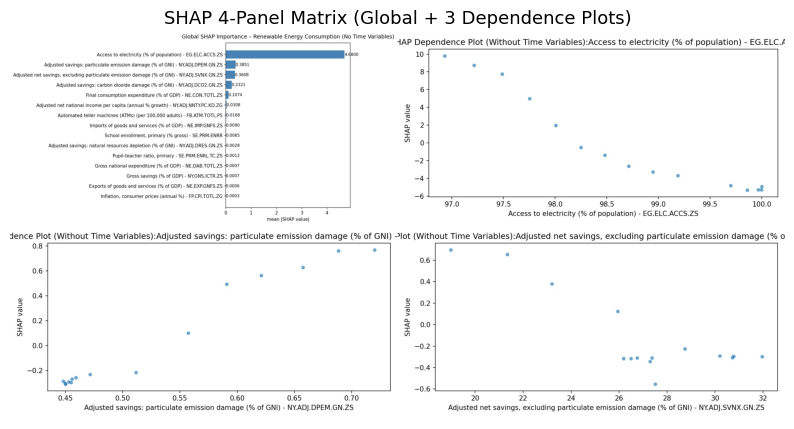

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# -----------------------------
# 7. ÊãºÊé•4Âº†ÂõæÊàê‰∏Ä‰∏™Áü©Èòµ (2x2)
# -----------------------------

# ÂõæÂÉèÊñá‰ª∂Ë∑ØÂæÑ
img_paths = [
    os.path.join(OUTDIR, "shap_importance_RENEW_noTIME_labeled.png"),
]

# Ê∑ªÂä†Ââç3‰∏™‰æùËµñÂõæÁöÑË∑ØÂæÑ
for f in shap_importance["feature"].head(3).values:
    safe_name = f.replace(" ", "_").replace(":", "_")
    img_paths.append(os.path.join(OUTDIR, f"shap_dependence_RENEW_noTIME_{safe_name}.png"))

# ÊâìÂºÄÊâÄÊúâÂõæÁâá
images = [Image.open(p) for p in img_paths if os.path.exists(p)]

# Á°Æ‰øùÊòØ4Âº†Âõæ
if len(images) == 4:
    # Ë∞ÉÊï¥ÊâÄÊúâÂõæÁâáÂ§ßÂ∞è‰∏ÄËá¥ÔºàÂÆΩÂ∫¶‰∏∫ÊúÄÂ∞èÂÄºÔºâ
    widths, heights = zip(*(i.size for i in images))
    min_w, min_h = min(widths), min(heights)
    images = [i.resize((min_w, min_h)) for i in images]

    # ÂàõÂª∫2√ó2Á©∫ÁôΩÁîªÂ∏É
    matrix = Image.new("RGB", (min_w*2, min_h*2), color=(255,255,255))

    # ÊîæÂÖ•ÂõæÁâá
    matrix.paste(images[0], (0, 0))             # Â∑¶‰∏ä
    matrix.paste(images[1], (min_w, 0))         # Âè≥‰∏ä
    matrix.paste(images[2], (0, min_h))         # Â∑¶‰∏ã
    matrix.paste(images[3], (min_w, min_h))     # Âè≥‰∏ã

    # ‰øùÂ≠ò
    out_path = os.path.join(OUTDIR, "shap_4panel_matrix.jpg")
    matrix.save(out_path, "JPEG", quality=95)
    print("‚úÖ ÊãºÊé•ÂÆåÊàê:", out_path)
else:
    print(f"‚ö†Ô∏è È¢ÑËÆ°4Âº†ÂõæÔºå‰ΩÜÂÆûÈôÖÊâæÂà∞ {len(images)} Âº†ÔºåËØ∑Ê£ÄÊü•Ë∑ØÂæÑ„ÄÇ")
    # ÊòæÁ§∫ÊãºÊé•Áü©ÈòµÂõæÔºàMatplotlibÔºâ
img = plt.imread(out_path)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis("off")
plt.title("SHAP 4-Panel Matrix (Global + 3 Dependence Plots)", fontsize=13)
plt.show()

# ËΩ¨Êàê Plotly ÂØπË±°Âêé append
fig_img = px.imshow(img, title="SHAP 4-Panel Matrix (Global + 3 Dependence Plots)")
fig_list.append(fig_img)

ÂÖ®Â±ÄÁâπÂæÅÈáçË¶ÅÊÄßËß£ËØª

Ôºà1ÔºâXGBoostÁªìÊûÑÊÄßÈáçË¶ÅÊÄßÔºàGainÔºâ

| ÊéíÂêç | ÂèòÈáèÂêçÁß∞                                                                       | Âê´‰πâ                | ‰ΩúÁî®Êú∫Âà∂ÔºàÂÆöÊÄßÊé®Êñ≠Ôºâ                         |
| -- | -------------------------------------------------------------------------- | ----------------- | ---------------------------------- |
| 1  | **Adjusted net savings, excluding particulate emission damage (% of GNI)** | Êâ£Èô§È¢óÁ≤íÁâ©ÊéíÊîæÊçüÂÆ≥ÂêéÁöÑË∞ÉÊï¥ÂáÄÂÇ®ËìÑÁéá | ÂèçÊò†ÁªèÊµéÁöÑÈïøÊúüÂèØÊåÅÁª≠ÊÄßÔºåÂÇ®ËìÑÁéáÈ´òÈÄöÂ∏∏‰º¥ÈöèËæÉÂº∫ÁöÑÂèØÂÜçÁîüÊäïËµÑËÉΩÂäõÔºàÊ≠£ÂêëÔºâ |
| 2  | **Adjusted savings: particulate emission damage (% of GNI)**               | È¢óÁ≤íÁâ©ÊéíÊîæÂ∏¶Êù•ÁöÑÁªèÊµéÊçüÂÆ≥      | ÁéØÂ¢ÉÊ±°ÊüìË∂ä‰∏•ÈáçÔºåÁªøËâ≤ËÉΩÊ∫êÂéãÂäõË∂äÂ§ßÔºåÂèçÂêëÈ©±Âä®ËÉΩÊ∫êËΩ¨ÂûãÔºàÊ≠£ÂêëÔºâ      |
| 3  | **Access to electricity (% of population)**                                | ÁîµÂäõÂèØÂèäÁéá             | ÈöèÁîµÂäõÊôÆÂèäÁéáÊèêÈ´òÔºåËÉΩÊ∫êÁªìÊûÑÊõ¥‰æùËµñÂåñÁü≥ËÉΩÊ∫êÔºàË¥üÂêëÔºâ           |
| 4  | **Final consumption expenditure (% of GDP)**                               | Â±ÖÊ∞ë‰∏éÊîøÂ∫úÊúÄÁªàÊ∂àË¥πÂç†GDPÊØîÈáç   | È´òÊ∂àË¥πÂèØËÉΩÊÑèÂë≥ÁùÄÈ´òËÉΩÊ∫êÈúÄÊ±ÇÔºåÂØπÂèØÂÜçÁîüËÉΩÊ∫êÊØî‰æãÂΩ¢ÊàêÊäëÂà∂ÔºàË¥üÂêëÔºâ     |
| 5  | **Adjusted savings: carbon dioxide damage (% of GNI)**                     | ‰∫åÊ∞ßÂåñÁ¢≥ÊéíÊîæÊçüÂÆ≥          | ÁéØÂ¢ÉÂéãÂäõÊåáÊ†áÔºå‰∏éÁªøËâ≤ËÉΩÊ∫êÂèëÂ±ïÂä®Êú∫Ê≠£Áõ∏ÂÖ≥ÔºàÊ≠£ÂêëÔºâ            |


ÊÄª‰Ωì‰∏äÁúãÔºåËøô‰∫õÂèòÈáèÂõ¥Áªï‰∏â‰∏™Ê†∏ÂøÉÊú∫Âà∂Â±ïÂºÄÔºö

ÂÇ®ËìÑ‰∏éÊäïËµÑËÉΩÂäõÔºàsavingsÔºâÔºöÂÜ≥ÂÆöÊòØÂê¶ËÉΩÊîØÊåÅÁªøËâ≤ËÉΩÊ∫êÊäïËµÑÔºõ

ÁéØÂ¢ÉÊçüÂÆ≥Ôºàpollution damageÔºâÔºöÊèê‰æõÊîøÁ≠ñÈ©±Âä®ÂäõÔºõ

ËÉΩÊ∫êÁªìÊûÑ‰∏éÊ∂àË¥πÈúÄÊ±ÇÔºàelectricity access & consumptionÔºâÔºöÂÜ≥ÂÆöËÉΩÊ∫êÁªìÊûÑÁöÑÂÆûÈôÖÂΩ¢ÊÄÅ„ÄÇ

Ôºà2ÔºâSHAPÂÖ®Â±ÄËß£ÈáäÁªìÊûú

SHAP ÊòæÁ§∫ÁöÑÂèòÈáèÊéíÂ∫è‰∏é XGBoost Âü∫Êú¨‰∏ÄËá¥Ôºå‰ΩÜÊèê‰æõ‰∫ÜÊõ¥ÊòéÁ°ÆÁöÑ‚ÄúÊñπÂêëÊÄß‚ÄùËß£ÈáäÔºö Access to electricity (% of population) ÁöÑÂπ≥Âùá SHAP ÂÄºËøúÈ´ò‰∫éÂÖ∂‰ªñÂèòÈáèÔºåËØ¥ÊòéÁîµÂäõÊôÆÂèäÁéá‰ªçÊòØÊúÄ‰∏ªË¶ÅÁöÑË¥üÂêëÈ©±Âä®Âõ†Á¥†„ÄÇ

ÂΩìÁîµÂäõÊé•ËøëÊôÆÂèäÔºà99‚Äì100%ÔºâÊó∂ÔºåÂèØÂÜçÁîüËÉΩÊ∫êÂç†ÊØî‰∏ãÈôçÊòéÊòæ„ÄÇ

Adjusted savings: particulate emission damage (% of GNI) ‰∏é RENEW ÂëàÊòæËëóÊ≠£Áõ∏ÂÖ≥ÔºöÊ±°ÊüìÊçüÂÆ≥Ë∂äÈ´òÔºåÊ®°ÂûãÈ¢ÑÊµãÁöÑÂèØÂÜçÁîüËÉΩÊ∫êÂç†ÊØîË∂äÈ´òÔºåËØ¥ÊòéÊ±°ÊüìÂéãÂäõÊøÄÂèë‰∫ÜÁªøËâ≤ËΩ¨ÂûãÂèçÂ∫î„ÄÇ

Adjusted net savings, excluding particulate emission damage Ë°®Áé∞Âá∫Ê≠£ÂêëÂÖ≥Á≥ªÔºöÈïøÊúüÂÇ®ËìÑÊ∞¥Âπ≥È´ò ‚Üí ÂõΩÂÆ∂ÊúâËÉΩÂäõÊäïËµÑÊ∏ÖÊ¥ÅËÉΩÊ∫ê ‚Üí ÂèØÂÜçÁîüËÉΩÊ∫êÊØîÈáçÊèêÈ´ò„ÄÇ

Â±ÄÈÉ®‰æùËµñÂÖ≥Á≥ªÔºàSHAP‰æùËµñÂõæÔºâ

1.Access to electricity (% of population)

ÂëàÊòéÊòæË¥üÁõ∏ÂÖ≥Ë∂ãÂäøÔºö

ÂΩìÁîµÂäõÊôÆÂèäÁéá‰ªé 97% ‰∏äÂçáÂà∞Êé•Ëøë 100%ÔºåSHAP ÂÄº‰ªé +10 ‰∏ãÈôçÂà∞ -5„ÄÇ ËøôËØ¥ÊòéÈöèÁùÄÂÖ®Ê∞ëÁîµÊ∞îÂåñÂÆåÊàêÔºå‰∏≠ÂõΩËÉΩÊ∫êÁ≥ªÁªüÂú®ÂèØÂÜçÁîüËÉΩÊ∫êÊØî‰æã‰∏äÂèçËÄå‰∏ãÈôç„ÄÇ

ÁªèÊµéÈÄªËæëÔºö

Âú®‰∏≠ÂõΩÁöÑÁîµÊ∞îÂåñËøõÁ®ã‰∏≠ÔºåÊôÆÂèäÈò∂ÊÆµ‰æùÈù†ÁÖ§Áîµ‰∏éÈõÜ‰∏≠ÂºèÁîµÁΩë‰∏∫‰∏ªÔºåÂèØÂÜçÁîüËÉΩÊ∫êÊªûÂêé‰∫éÁîµÂäõÂü∫Á°ÄËÆæÊñΩÂèëÂ±ï„ÄÇ

Âç≥Ôºå‚ÄúÁîµÁΩëÊôÆÂèäÊó©‰∫éËÉΩÊ∫êËΩ¨Âûã‚Äù„ÄÇ

2.Adjusted savings: particulate emission damage (% of GNI)

ÂëàÊ≠£Áõ∏ÂÖ≥ÂÖ≥Á≥ªÔºö

ÂΩìÊ±°ÊüìÊçüÂÆ≥Âç†ÂõΩÊ∞ëÊî∂ÂÖ•ÊØîÈáç‰∏äÂçáÊó∂Ôºà0.45‚Üí0.7%ÔºâÔºåSHAP ÂÄºÈöè‰πã‰∏äÂçáÔºà-0.2‚Üí+0.8Ôºâ„ÄÇ

Ëß£ÈáäÔºö

Á©∫Ê∞îÊ±°ÊüìÊçüÂÆ≥Âä†ÈáçÂæÄÂæÄËß¶ÂèëÊîøÁ≠ñÂ±ÇÈù¢ÁöÑÁªøËâ≤ÂìçÂ∫î„ÄÇ

Ëøô‰ª£Ë°®‰∏ÄÁßçÂÖ∏ÂûãÁöÑ‚ÄúË¢´Âä®ÂûãÁªøËâ≤ËΩ¨Âûã‚ÄùÊú∫Âà∂ÔºöÁéØÂ¢ÉÂç±Êú∫ÂÄíÈÄºÊ∏ÖÊ¥ÅËÉΩÊ∫êÂ¢ûÈïø„ÄÇ

3.Adjusted net savings, excluding particulate emission damage (% of GNI)

ÂëàÈùûÁ∫øÊÄßÂÖ≥Á≥ªÔºö

Âú®ÂÇ®ËìÑÁéáËæÉ‰ΩéÔºà20% ‰ª•‰∏ãÔºâÊó∂ÔºåSHAP ÂÄºÈ´òÔºàÂØπÂèØÂÜçÁîüËÉΩÊ∫êÊúâÁßØÊûÅË¥°ÁåÆÔºâÔºõ ÂΩìÂÇ®ËìÑÁéáÈ´ò‰∫é 25% Êó∂ÔºåSHAP ÂÄºÂèçËÄå‰∏ãÈôç„ÄÇ

Ëß£ÈáäÔºö

ËøôÂèØËÉΩÂèçÊò†‰∫ÜÁªìÊûÑÊÄßËΩ¨ÂûãÈò∂ÊÆµÂ∑ÆÂºÇÔºö

ÂàùÊúüÈ´òÂÇ®ËìÑ‰øÉËøõÁªøËâ≤ÊäïËµÑÔºå‰ΩÜÂΩìÂÇ®ËìÑÈõÜ‰∏≠‰∫éÂ∑•‰∏öËµÑÊú¨ÁßØÁ¥ØÔºàËÄåÈùûËÉΩÊ∫êÁªìÊûÑ‰ºòÂåñÔºâÊó∂ÔºåÂèçËÄåÂØπÁªøËâ≤ËÉΩÊ∫êÊØî‰æã‰∏çÂà©„ÄÇ

| È©±Âä®Á±ªÂûã         | ‰∏ªË¶ÅÂèòÈáè                          | ÊñπÂêë   | Êú∫Âà∂ËØ¥Êòé                 |
| ------------ | ----------------------------- | ---- | -------------------- |
| **ËÉΩÊ∫êÂü∫Á°ÄËÆæÊñΩÊïàÂ∫î** | Access to electricity         | Ë¥üÂêë   | ÁîµÂäõÊôÆÂèä‰æùËµñÂåñÁü≥ËÉΩÊ∫êÔºåÂàùÊúüÁªìÊûÑÊÄßÁ¢≥Âåñ   |
| **ÁéØÂ¢ÉÂéãÂäõÊïàÂ∫î**   | Particulate & CO‚ÇÇ damages     | Ê≠£Âêë   | ÁéØÂ¢ÉÊÅ∂ÂåñÂà∫ÊøÄÊîøÁ≠ñÂèçÂ∫î‰∏éÊäïËµÑËΩ¨Âûã      |
| **ËµÑÊú¨ÁßØÁ¥ØÊïàÂ∫î**   | Adjusted savingsÔºàÂê´‰∏é‰∏çÂê´Ê±°ÊüìÊçüÂÆ≥Ôºâ    | ÈùûÁ∫øÊÄß  | ÂÇ®ËìÑÊîØÊåÅÁªøËâ≤ÊäïËµÑÔºå‰ΩÜ‰∫ß‰∏öÁªìÊûÑÂÜ≥ÂÆöÂÖ∂ÊñπÂêëÊÄß |
| **Ê∂àË¥πÈúÄÊ±ÇÊïàÂ∫î**   | Final consumption expenditure | ËΩªÂæÆË¥üÂêë | Ê∂àË¥πÊâ©Âº†È©±Âä®ÊÄªËÉΩËÄóÂ¢ûÈïøÔºåÂØπÁªøËâ≤ÊØî‰æã‰∏çÂà©  |

ÊÄª‰ΩìÁªìËÆ∫‰∏éÊîøÁ≠ñÂêØÁ§∫

1.ËÉΩÊ∫êÁªìÊûÑÊªûÂêéÈóÆÈ¢òÊòéÁ°ÆÂ≠òÂú®

ÁîµÊ∞îÂåñÊâ©Âº†Èò∂ÊÆµ‰∏ªË¶Å‰æùÈù†ÁÖ§ÁîµÔºåÂèØÂÜçÁîüËÉΩÊ∫êÂç†ÊØîÂõ†Ê≠§‰∏ãÈôç„ÄÇË¶ÅÊèêÈ´ò RENEWÔºåÂøÖÈ°ª‰ªé‚Äú‰æõÁîµËßÑÊ®°‚ÄùËΩ¨Âêë‚Äú‰æõÁîµÁªìÊûÑ‚Äù„ÄÇ

2.Ê±°ÊüìÊçüÂÆ≥ÊòØÁªøËâ≤ËΩ¨ÂûãÁöÑÂÖ≥ÈîÆËß¶ÂèëÁÇπ

Ê®°ÂûãË°®ÊòéÔºåÂΩìÊ±°ÊüìÊàêÊú¨ÊòæËëóÊó∂ÔºàPMÊçüÂÆ≥>0.5% GNIÔºâÔºåÂèØÂÜçÁîüËÉΩÊ∫êÊØî‰æãÈöè‰πã‰∏äÂçá„ÄÇËøôË°®ÊòéÊîøÁ≠ñË∞ÉËäÇÊú∫Âà∂Âú®Ëµ∑‰ΩúÁî®„ÄÇ

3.ÁªèÊµéÂÇ®ËìÑ‰∏éÁªìÊûÑÊäïËµÑÊñπÂêëÂÜ≥ÂÆöÈïøÊúüË∂ãÂäø

ÂÇ®ËìÑÁéáËôΩÈ´òÔºå‰ΩÜËã•‰∏ªË¶ÅÊäïÂêë‰º†ÁªüËÉΩÊ∫ê‰∫ß‰∏öÔºå‰ºöÂâäÂº±ÂèØÂÜçÁîüËÉΩÊ∫êÂ¢ûÈïø„ÄÇÊèêÈ´ò‚ÄúÁªøËâ≤ËµÑÊú¨ÂΩ¢ÊàêÁéá‚ÄùÊØîÊèêÈ´òÊÄªÂÇ®ËìÑÁéáÊõ¥ÊúâÊïà„ÄÇ



---



---



ÈÄöËøá SHAPÔºàSHapley Additive exPlanationsÔºâÁÆóÊ≥ïÈáèÂåñÊØè‰∏™ÁâπÂæÅÂØπÈ¢ÑÊµãÁªìÊûúÁöÑËæπÈôÖË¥°ÁåÆÊñπÂêë‰∏éÂº∫Â∫¶ÔºåÂπ∂‰ª•ÂèØËßÜÂåñÂõæË°®ÂëàÁé∞ÔºåËß£ÂÜ≥‰∫Ü XGBoost ‰ªÖËÉΩËæìÂá∫ ‚ÄúÁâπÂæÅÈáçË¶ÅÊÄß‚ÄùÔºàÂè™ÁúãÂΩ±ÂìçÂ§ßÂ∞èÔºå‰∏çÁúãÂΩ±ÂìçÊñπÂêë / ÂàÜÂ∏ÉÔºâÁöÑÂ±ÄÈôêÊÄß„ÄÇ

SHAP ÊòØÂü∫‰∫é ‚ÄúÊ≤ôÊôÆÂà©ÂÄº‚ÄùÔºàÂçöÂºàËÆ∫‰∏≠ÁöÑÂÖ¨Âπ≥ÂàÜÈÖçÂéüÁêÜÔºâÁöÑËß£ÈáäÊ°ÜÊû∂ÔºåËÉΩ‰∏∫‰ªªÊÑèÊú∫Âô®Â≠¶‰π†Ê®°ÂûãÔºàÂ∞§ÂÖ∂ÊòØÊ†ëÊ®°Âûã„ÄÅÊ∑±Â∫¶Â≠¶‰π†Ê®°ÂûãÔºâÊèê‰æõÁªü‰∏ÄÁöÑÂèØËß£ÈáäÊÄßÊñπÊ°àÔºåÊ†∏ÂøÉ‰ºòÂäøÊòØÊó¢ÈáèÂåñÁâπÂæÅÁöÑ ‚ÄúÂΩ±ÂìçÂ§ßÂ∞è‚ÄùÔºåÂèàÊòéÁ°Æ ‚ÄúÂΩ±ÂìçÊñπÂêë‚ÄùÔºàÊ≠£ÂêëÊé®È´ò / Ë¥üÂêëÊäëÂà∂Ôºâ„ÄÇ

ÁîüÊàê SHAP ËæπÈôÖË¥°ÁåÆÊÄªÁªìÂõæÂ∞ÜÊâÄÊúâÊ†∑Êú¨ÁöÑÁâπÂæÅ SHAP ÂÄº‰ª•ËúÇÁæ§ÂõæÔºàBeeswarm PlotÔºâ ÂΩ¢ÂºèÂèØËßÜÂåñÔºåÊòØËß£ÈáäÊ®°ÂûãÂÖ®Â±ÄËßÑÂæãÁöÑÊ†∏ÂøÉÂõæË°®„ÄÇ

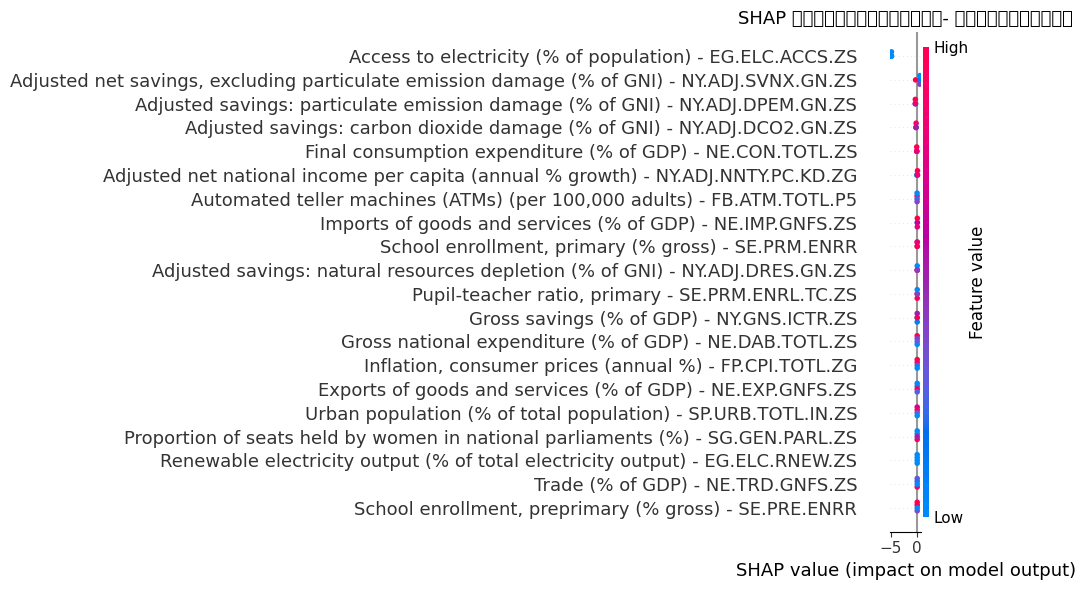

‚úÖ Â∑≤ÊàêÂäüÁîüÊàê SHAP ËæπÈôÖË¥°ÁåÆËúÇÁæ§ÂõæÔºö results_RENEW_noTIME/xgb_shap_summary_noTIME_final.png
üìÅ ÁªìÊûúË∑ØÂæÑÂ∑≤ËÆ∞ÂΩïËá≥ shap_summary_log.txtÔºå‰æõÂêéÁª≠ÂàÜÊûêË∞ÉÁî®„ÄÇ


In [ ]:
# ===============================================================
# ‰øÆÊ≠£Áâà SHAP ËæπÈôÖË¥°ÁåÆËúÇÁæ§ÂõæÔºàÊó†Êó∂Èó¥ÂèòÈáèÁâàÔºâ
# ===============================================================
import shap
import matplotlib.pyplot as plt
import os
from xgboost import DMatrix

# ‰øùÊåÅ‰∏é‰∏äÊÆµ‰∏ÄËá¥ÁöÑËæìÂá∫Ë∑ØÂæÑ
OUTDIR = "results_RENEW_noTIME"
os.makedirs(OUTDIR, exist_ok=True)

# 1. Ëé∑ÂèñÂ∫ïÂ±Ç Booster ÂØπË±°
booster = xgb_model.get_booster()

# 2. Â∞ÜÊµãËØïÈõÜËΩ¨Êç¢‰∏∫ XGBoost DMatrixÔºàBooster ÂèØËß£ÊûêÊ†ºÂºèÔºâ
dtest = DMatrix(X_test, feature_names=list(X_test.columns))

# 3. ËÆ°ÁÆó SHAP ÂÄºÔºàXGBoost ÂéüÁîüÊîØÊåÅÔºâ
shap_values = booster.predict(dtest, pred_contribs=True)

# Âà†Èô§ÊúÄÂêé‰∏ÄÂàóÔºàBiasÂàóÔºâ
shap_values = shap_values[:, :-1]

# 4. ÁîüÊàê SHAP ËúÇÁæ§Âõæ
plt.figure(figsize=(10, 6))
shap.summary_plot(
    shap_values,
    X_test,
    show=False,
    plot_size=(10, 6),
    color_bar=True
)
plt.title("SHAP ËæπÈôÖË¥°ÁåÆËúÇÁæ§ÂõæÔºàÊó†Êó∂Èó¥ÂèòÈáèÔºâ- ‰∏≠ÂõΩÂèØÂÜçÁîüËÉΩÊ∫êÊ∂àË¥πÂç†ÊØî", fontsize=13)
plt.tight_layout()

# ‰øùÂ≠òÂà∞Áªü‰∏ÄË∑ØÂæÑ
save_path = os.path.join(OUTDIR, "xgb_shap_summary_noTIME_final.png")
plt.savefig(save_path, dpi=200, bbox_inches="tight")
plt.show()  # ‚úÖ Âú® Notebook ‰∏≠Áõ¥Êé•ÊòæÁ§∫

print("‚úÖ Â∑≤ÊàêÂäüÁîüÊàê SHAP ËæπÈôÖË¥°ÁåÆËúÇÁæ§ÂõæÔºö", save_path)

# 5. ËÆ∞ÂΩïÁîüÊàêÁöÑÊñá‰ª∂Ë∑ØÂæÑÔºà‰æø‰∫éÂêéÁª≠Ëá™Âä®ËØªÂèñÔºâ
with open(os.path.join(OUTDIR, "shap_summary_log.txt"), "w") as f:
    f.write(f"SHAP summary plot saved at: {save_path}\n")

print("üìÅ ÁªìÊûúË∑ØÂæÑÂ∑≤ËÆ∞ÂΩïËá≥ shap_summary_log.txtÔºå‰æõÂêéÁª≠ÂàÜÊûêË∞ÉÁî®„ÄÇ")


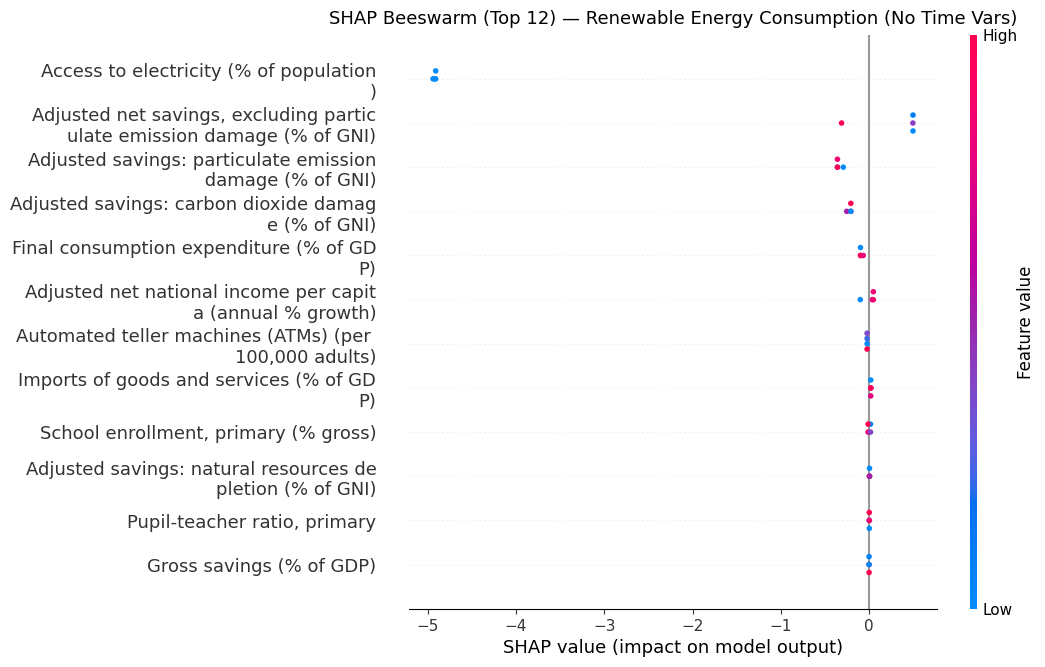

‚úÖ ËúÇÁæ§ÂõæÂ∑≤‰øùÂ≠òÔºö results_RENEW_noTIME/xgb_shap_beeswarm_top12_wide.png


In [ ]:
# ==== Êõ¥Ê∏ÖÊô∞ÁöÑ SHAP ËúÇÁæ§ÂõæÔºàTop-12 + Áü≠Âêç + Â§ßËæπË∑ùÔºâ ====
import shap, numpy as np, matplotlib.pyplot as plt, os
from xgboost import DMatrix

OUTDIR = "results_RENEW_noTIME"
os.makedirs(OUTDIR, exist_ok=True)

booster = xgb_model.get_booster()
dtest = DMatrix(X_test, feature_names=list(X_test.columns))
shap_values = booster.predict(dtest, pred_contribs=True)[:, :-1]  # ÂéªÊéâbiasÂàó

# 1) Âè™ÂèñÂΩ±ÂìçÊúÄÂ§ßÁöÑ Top-K
K = 12
mean_abs = np.abs(shap_values).mean(axis=0)
top_idx = np.argsort(-mean_abs)[:K]                 # ÊåâÈáçË¶ÅÊÄßÈôçÂ∫èÂèñÂâçK
X_disp  = X_test.iloc[:, top_idx]                   # ÈÄâÊã©ÂØπÂ∫îÂàó
sv_disp = shap_values[:, top_idx]

# 2) ÁîüÊàêÊõ¥Áü≠ÁöÑÁâπÂæÅÂêçÔºàÂéªÊéâ‰ª£Á†ÅÔºõË∂ÖÈïøÊç¢Ë°åÔºâ
def short_name(s, maxlen=38):
    # Âèñ‚Äú - ‚ÄùÂâçÁöÑ‰∫∫Á±ªÂèØËØªÈÉ®ÂàÜÔºõËøáÈïøÂàôÊç¢Ë°å
    s = str(s).split(" - ")[0]
    return s if len(s) <= maxlen else s[:maxlen] + "\n" + s[maxlen:]
short_names = [short_name(c) for c in X_disp.columns]

# 3) ÁîªÂõæÔºöÊõ¥Â§ßÁöÑÁîªÂ∏É„ÄÅÁïôË∂≥Â∑¶ËæπË∑ù„ÄÅÂä†Â§ßÁÇπÂ§ßÂ∞è
plt.figure(figsize=(12, 7))
shap.summary_plot(
    sv_disp,
    X_disp,
    feature_names=short_names,
    max_display=K,
    show=False,
    plot_size=None,       # ‰ΩøÁî®Êàë‰ª¨Ëá™ÂÆö‰πâÁöÑ figsize
    color_bar=True
)
plt.title("SHAP Beeswarm (Top 12) ‚Äî Renewable Energy Consumption (No Time Vars)", fontsize=13, pad=8)

# ÂÖ≥ÈîÆÔºöÂä†Â§ßÂ∑¶‰æßËæπË∑ùÔºåÈÅøÂÖçÊ†áÁ≠æË¢´Êå§
plt.gcf().subplots_adjust(left=0.42, right=0.97, top=0.90, bottom=0.08)

save_path = os.path.join(OUTDIR, "xgb_shap_beeswarm_top12_wide.png")
plt.savefig(save_path, dpi=220, bbox_inches="tight")
plt.show()
print("‚úÖ ËúÇÁæ§ÂõæÂ∑≤‰øùÂ≠òÔºö", save_path)

# Â¶ÇÊûú‰Ω†Ë¶ÅÊääÂÆÉÂä†ÂÖ• fig_listÔºà‰∫§‰∫íHTMLÊ±áÊÄªÔºâÔºåÊääÈùôÊÄÅÂõæÂåÖ‰∏ÄÂ±Ç PlotlyÔºö
import plotly.express as px
import matplotlib.image as mpimg
img = mpimg.imread(save_path)
fig_bee = px.imshow(img, title="SHAP Beeswarm (Top 12)")
if 'fig_list' not in globals(): fig_list = []
fig_list.append(fig_bee)

ÂõæË°®ÁªìÊûÑ‰∏éÈòÖËØªÈÄªËæë

ËøôÊòØ‰∏Ä‰∏™ SHAP Beeswarm PlotÔºàËúÇÁæ§ÂõæÔºâÔºåÂÆÉÊ±áÊÄª‰∫ÜÊ®°Âûã‰∏≠ÊâÄÊúâÊ†∑Êú¨ÁöÑÁâπÂæÅË¥°ÁåÆÂÄºÔºö

Á∫µËΩ¥ÔºàYËΩ¥ÔºâÔºöÊåâÂπ≥Âùá SHAP ÁªùÂØπÂÄº‰ªéÈ´òÂà∞‰ΩéÊéíÂ∫èÁöÑÁâπÂæÅÔºàË∂äÈù†‰∏äË∂äÈáçË¶ÅÔºâ„ÄÇ

Ê®™ËΩ¥ÔºàXËΩ¥ÔºâÔºöÁâπÂæÅÂØπÂ∫îÁöÑ SHAP ÂÄºÔºå‰ª£Ë°®ÂÖ∂ÂØπÈ¢ÑÊµãÁõÆÊ†áÔºàÂèØÂÜçÁîüËÉΩÊ∫êÂç†ÊØîÔºâÁöÑÊé®Âä®ÊàñÊäëÂà∂ÊñπÂêë„ÄÇ

ÁÇπÁöÑÈ¢úËâ≤ÔºöÁâπÂæÅÂèñÂÄºÂ§ßÂ∞èÔºàÁ∫¢ = È´òÂÄºÔºåËìù = ‰ΩéÂÄºÔºâ„ÄÇ

ÁÇπÁöÑÂàÜÂ∏ÉÔºöÂèçÊò†Ê†∑Êú¨Èó¥ËØ•ÁâπÂæÅÂØπÊ®°ÂûãÁöÑÂÆûÈôÖÂΩ±ÂìçÂàÜÊï£ÊÉÖÂÜµ„ÄÇ

ÂõæÁöÑÂè≥ËæπÊòØÁ∫¢Ëâ≤ÔºàÊ≠£ÂêëÊé®Âä®ÔºâÔºåÂ∑¶ËæπÊòØËìùËâ≤ÔºàË¥üÂêëÊäëÂà∂Ôºâ„ÄÇ

‰∏ªË¶ÅÈ©±Âä®Âõ†Á¥†‰∏éÁªèÊµéÂê´‰πâ

| ÊéíÂêç                                                                             | ÁâπÂæÅ              | ÁªèÊµéÂê´‰πâ                                                          | SHAP ÂΩ±ÂìçÊñπÂêë |
| ------------------------------------------------------------------------------ | --------------- | ------------------------------------------------------------- | --------- |
| **1Ô∏è‚É£ Access to electricity (% of population)**                                | ÁîµÂäõÂèØÂèäÁéá           | ÁîµÂäõÊôÆÂèäÁéáË∂äÈ´òÔºåSHAP ÂÄºË∂äË¥ü ‚Üí Ë°®ÊòéÈ´òÁîµÊ∞îÂåñÁ®ãÂ∫¶‰∏é‰º†ÁªüËÉΩÊ∫êÔºàÁÖ§ÁîµÔºâÁªëÂÆöÁ¥ßÂØÜÔºåÂèØÂÜçÁîüÂç†ÊØîÂèçËÄå‰∏ãÈôç„ÄÇ           |           |
| **2Ô∏è‚É£ Adjusted net savings, excluding particulate emission damage (% of GNI)** | Ë∞ÉÊï¥ÂêéÂáÄÂÇ®ËìÑÔºà‰∏çÂê´È¢óÁ≤íÁâ©ÊçüÂÆ≥Ôºâ | ËæÉÈ´òÁöÑ‚ÄúÁªøËâ≤ÂÇ®ËìÑÁéá‚ÄùÈÄöÂ∏∏‰ª£Ë°®Êõ¥È´òÁöÑÊäïËµÑÊΩúÂäõÔºåSHAP ÂÄºÂàÜÂ∏ÉÂ∑¶Âè≥ÂùáË°° ‚Üí ÂØπÁªøËâ≤ËÉΩÊ∫êÊó¢ÂèØËÉΩÊé®Âä®‰πüÂèØËÉΩÊäëÂà∂ÔºåÂèñÂÜ≥‰∫éÊäïËµÑÁªìÊûÑ„ÄÇ |           |
| **3Ô∏è‚É£ Adjusted savings: particulate emission damage (% of GNI)**               | È¢óÁ≤íÁâ©ÊéíÊîæÊçüÂÆ≥         | È´òÊ±°ÊüìÊçüÂÆ≥ÔºàÁ∫¢Ëâ≤ÁÇπÂÅèÂè≥Ôºâ ‚Üí Êé®Âä®ÂèØÂÜçÁîüËÉΩÊ∫êÊØîÈáç‰∏äÂçáÔºåËØ¥ÊòéÁéØÂ¢ÉÈÄÄÂåñÂéãÂäõÂà∫ÊøÄÁªøËâ≤ËΩ¨Âûã„ÄÇ                    |           |
| **4Ô∏è‚É£ Adjusted savings: carbon dioxide damage (% of GNI)**                     | ‰∫åÊ∞ßÂåñÁ¢≥ÊçüÂÆ≥Ë∞ÉÊï¥ÂÇ®ËìÑ      | Á±ª‰ºº‰∏äÈ°πÔºåÊ±°ÊüìË∂ä‰∏•ÈáçÔºåÊîøÁ≠ñÂíåÁ§æ‰ºöÊäïËµÑÂÄæÂêëË∂äÁéØ‰øù„ÄÇ                                      |           |
| **5Ô∏è‚É£ Final consumption expenditure (% of GDP)**                               | ÊúÄÁªàÊ∂àË¥πÊîØÂá∫          | SHAP ÂÄºÁï•ÂÅèË¥üÔºåËØ¥ÊòéÊ∂àË¥πÂ¢ûÈïø‰øÉËøõËÉΩÊ∫êÈúÄÊ±ÇÊâ©Âº†ÔºåÊäëÂà∂ÁªøËâ≤ËÉΩÊ∫êÊØî‰æã„ÄÇ                            |           |


ËæÖÂä©ÂèòÈáèÁöÑÊîøÁ≠ñÊàñÁªìÊûÑÊÄßÂê´‰πâ

Adjusted net national income per capita (annual % growth)

‰∫∫ÂùáÂõΩÊ∞ëÊî∂ÂÖ•Â¢ûÈïøÁéáÁöÑ SHAP ÂÄºÂú®Èõ∂ÈôÑËøëÔºåËØ¥ÊòéÁªèÊµéÂ¢ûÈïøÂØπÁªøËâ≤ËÉΩÊ∫êËΩ¨ÂûãÁöÑËæπÈôÖ‰ΩúÁî®Âº±ÂåñÔºåÂèØËÉΩË¢´ÊîøÁ≠ñÊàñÊäÄÊúØÂõ†Á¥†‰∏≠Âíå„ÄÇ

Automated teller machines (ATMs) per 100,000 adults

ËØ•ÂèòÈáèÂá∫Áé∞Âú®‰∏≠‰ΩçËØ¥Êòé‚ÄúÈáëËûçÂèëÂ±ïÊ∞¥Âπ≥‚Äù‰∏éÂèØÂÜçÁîüËÉΩÊ∫êÊØîÈáçÂ≠òÂú®Èó¥Êé•ÂÖ≥Á≥ªÔºåÈáëËûçÂü∫Á°ÄËÆæÊñΩÂèØËÉΩ‰øÉËøõÊ∏ÖÊ¥ÅËÉΩÊ∫êËûçËµÑÊ∏†ÈÅì„ÄÇ

Imports of goods and services (% of GDP)

È´òËøõÂè£ÔºàÁ∫¢ÁÇπÂÅèÂè≥ÔºâËΩªÂæÆÊé®Âä®ÁªøËâ≤ËÉΩÊ∫êÂç†ÊØîÔºåÂèØËÉΩÂèçÊò†ÊäÄÊúØÂºïËøõ‰∏éÊñ∞ËÉΩÊ∫êËÆæÂ§áËøõÂè£ÊïàÂ∫î„ÄÇ

School enrollment, primary (% gross)

ÊïôËÇ≤ÊåáÊ†á SHAP ÂÄºÊé•Ëøë 0ÔºåËØ¥ÊòéÁü≠ÊúüÂÜÖÊïôËÇ≤ÊôÆÂèäÁéáÂØπËÉΩÊ∫êÁªìÊûÑÁöÑËß£ÈáäÂäõËæÉ‰Ωé„ÄÇ

ÂÖ®Â±ÄËßÑÂæãÊÄªÁªì

1.ÁîµÂäõÁªìÊûÑÂõ†Á¥†ÊúÄÂÖ≥ÈîÆÔºöÁîµÂäõÊôÆÂèäÁéáÂá†‰πéÂÜ≥ÂÆö‰∫ÜÂèØÂÜçÁîüËÉΩÊ∫êÂç†ÊØîÁöÑÊñπÂêëÔºåÂÖ∂È´òÂÄºÊòæËëóÊäëÂà∂ÁªøËâ≤ÊØî‰æãÔºåÊòæÁ§∫Âá∫ÁîµÂäõÁ≥ªÁªüÊÉØÊÄßÔºàÁÖ§Áîµ‰∏ªÂØºÔºâÁöÑÁªìÊûÑÊÄßÈóÆÈ¢ò„ÄÇ

2.ÁéØÂ¢ÉÊçüÂÆ≥ÊòØÊé®Âä®ÂäõÈáèÔºöÊ±°ÊüìÁõ∏ÂÖ≥ÂèòÈáèÔºàCO‚ÇÇ„ÄÅÈ¢óÁ≤íÁâ©ÔºâÊòæËëóÊ≠£ÂêëÊé®Âä®ÁªøËâ≤ËÉΩÊ∫êÂèëÂ±ïÔºåËØ¥ÊòéÁéØÂ¢ÉÂéãÂäõÊòØ‰∏≠ÂõΩËÉΩÊ∫êËΩ¨ÂûãÁöÑÈáçË¶ÅÊîøÁ≠ñÈ©±Âä®„ÄÇ

3.ÂÇ®ËìÑ‰∏éÊäïËµÑË¥®ÈáèÂÖ≥ÈîÆÔºöÂáÄÂÇ®ËìÑÁöÑ SHAP ÂàÜÂ∏ÉÂèåÂêëÔºåÊèêÁ§∫‚ÄúÁªøËâ≤ËµÑÊú¨ÈÖçÁΩÆÊïàÁéá‚ÄùÊØî‚ÄúËµÑÈáëËßÑÊ®°‚ÄùÊõ¥ÈáçË¶Å„ÄÇ

4.Ê∂àË¥π‰∏éÁªèÊµéÊâ©Âº†Â∏¶Êù•Ë¥üÈù¢ËæπÈôÖÊïàÂ∫îÔºöÊ∂àË¥π‰∏éGDPÂ¢ûÈïøÂùáÁï•ÊäëÂà∂ÂèØÂÜçÁîüËÉΩÊ∫êÂç†ÊØîÔºå‰ΩìÁé∞Âá∫ËÉΩÊ∫êÈúÄÊ±ÇÂ¢ûÈïøÂéãÂà∂Ê∏ÖÊ¥ÅËÉΩÊ∫êÊØîÈáçÁöÑË∂ãÂäø„ÄÇ

üìÇ Ê≠£Âú®ËØªÂèñÊï∞ÊçÆÊñá‰ª∂: China_cleaned_final.csv
‚úÖ Êï∞ÊçÆÂä†ËΩΩÂÆåÊàê: 19 Êù°Ê†∑Êú¨, 33 ÁâπÂæÅ, Âπ¥‰ªΩËåÉÂõ¥ 2000‚Äì2018


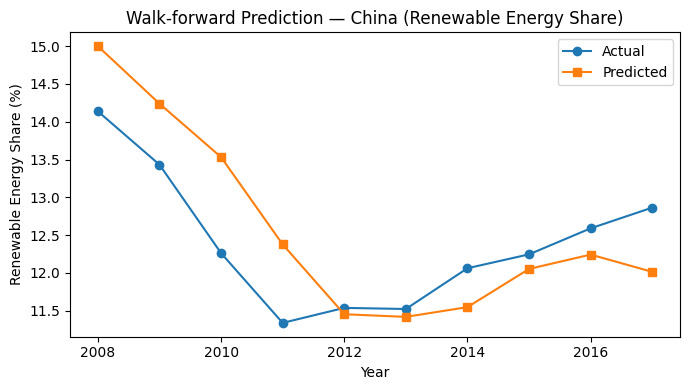

‚úÖ ÊªöÂä®ÂõûÊµãÂÆåÊàêÔºöresults_RENEW_validation/rolling/rolling_metrics_RENEW.csv
‚úÖ ÂàÜÊÆµÁ®≥ÂÅ•ÊÄßÁªìÊûúÂ∑≤‰øùÂ≠òÔºöresults_RENEW_validation/stability/feature_stability_RENEW.csv


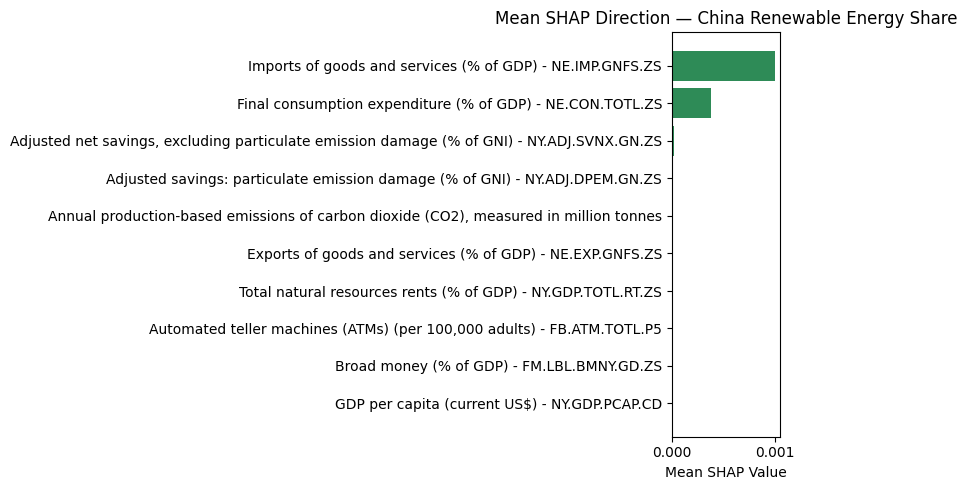

‚úÖ SHAPÁ®≥ÂÆöÊÄßÂàÜÊûêÂÆåÊàêÔºöresults_RENEW_validation/shap/shap_direction_stability_RENEW.csv


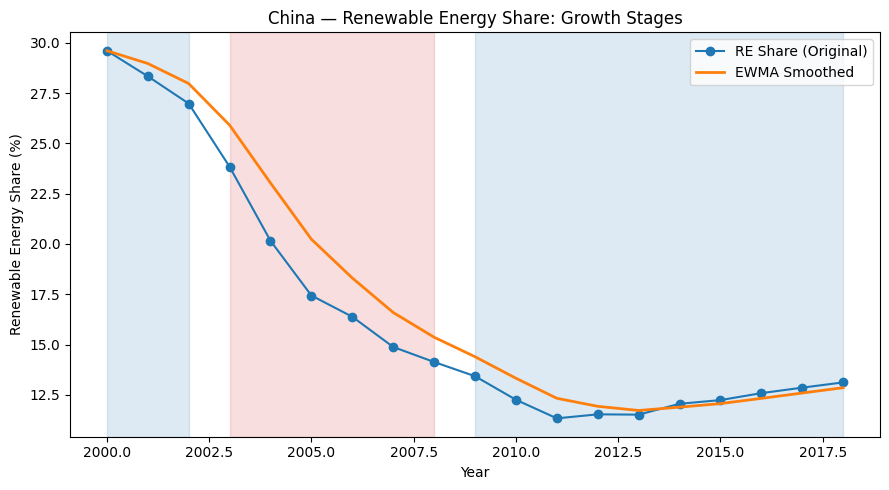

‚úÖ Èò∂ÊÆµËØÜÂà´ÂÆåÊàêÔºöresults_RENEW_validation/stages/renew_stage_plot.png

È™åËØÅÁªìÊûúÊëòË¶ÅÔºö
- ÊªöÂä®ÂõûÊµãÂπ≥ÂùáMAE: 0.6072
- ÂàÜÊÆµÁ®≥ÂÅ•ÊÄßÈáçÂêàÂ∫¶:
       Model  TopOverlap
DecisionTree           7
     XGBoost           6
RandomForest           5
- SHAP‰∏ªË¶ÅÊ≠£ÂêëÁâπÂæÅ: Imports of goods and services (% of GDP) - NE.IMP.GNFS.ZS, Final consumption expenditure (% of GDP) - NE.CON.TOTL.ZS, Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS, Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS, Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes
- SHAP‰∏ªË¶ÅË¥üÂêëÁâπÂæÅ: Gross savings (% of GDP) - NY.GNS.ICTR.ZS, Gross national expenditure (% of GDP) - NE.DAB.TOTL.ZS, Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG, Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS, Year.1
- Èò∂ÊÆµÂàíÂàÜÁªìÊûú:
   Start_Year  End_Year  Stage 

In [ ]:
# -*- coding: utf-8 -*-
"""
‰∏≠ÂõΩÂèØÂÜçÁîüËÉΩÊ∫êÂç†ÊØîÊ®°ÂûãÈ™åËØÅËÑöÊú¨ÔºàÁªü‰∏ÄËæìÂá∫ÁâàÔºâ
--------------------------------------------------------------
ÂäüËÉΩÊ®°ÂùóÔºö
1. ÊªöÂä®ÂõûÊµãÔºàRolling BacktestÔºâ
2. ÂàÜÊÆµÁ®≥ÂÅ•ÊÄßÔºàFeature StabilityÔºâ
3. SHAPÊñπÂêëÁ®≥ÂÆöÊÄß
4. Èò∂ÊÆµËØÜÂà´ÔºàÂ¢ûÈïøÈò∂ÊÆµËØäÊñ≠Ôºâ
ËæìÂá∫ÁªìÊûÑÔºö
results_RENEW_validation/
 ‚îú‚îÄ‚îÄ rolling/
 ‚îú‚îÄ‚îÄ stability/
 ‚îú‚îÄ‚îÄ shap/
 ‚îî‚îÄ‚îÄ stages/
"""

import os
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer

# ============================================================
# 0. Áªü‰∏ÄËæìÂá∫ÁõÆÂΩïÁªìÊûÑ
# ============================================================
ROOT_OUT = "results_RENEW_validation"
os.makedirs(ROOT_OUT, exist_ok=True)
dirs = {
    "rolling": os.path.join(ROOT_OUT, "rolling"),
    "stability": os.path.join(ROOT_OUT, "stability"),
    "shap": os.path.join(ROOT_OUT, "shap"),
    "stages": os.path.join(ROOT_OUT, "stages")
}
for d in dirs.values():
    os.makedirs(d, exist_ok=True)

log_path = os.path.join(ROOT_OUT, "_summary_log.txt")

# ============================================================
# 1. Êï∞ÊçÆÂä†ËΩΩ
# ============================================================
DATA_PATH = "China_cleaned_final.csv"
print(f"üìÇ Ê≠£Âú®ËØªÂèñÊï∞ÊçÆÊñá‰ª∂: {DATA_PATH}")
df = pd.read_csv(DATA_PATH)
df.columns = df.columns.str.strip()

def auto_match_column(dfcols, patterns):
    for pat in patterns:
        for c in dfcols:
            if pat.lower() in c.lower():
                return c
    return None

year_col = auto_match_column(df.columns, ["Year", "Âπ¥‰ªΩ", "year"])
target_col = "Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS"
china = df.copy().sort_values(year_col)

years_raw = china[year_col].astype(str).str.extract(r"(\d{4})")[0]
years = pd.to_numeric(years_raw, errors="coerce").fillna(method="ffill").astype(int)

num_cols = china.select_dtypes(include=[np.number]).columns.tolist()
for c in [target_col, year_col]:
    if c in num_cols: num_cols.remove(c)
valid_cols = [c for c in num_cols if china[c].notna().any()]

X_full = china[valid_cols]
y_full = china[target_col]
X = pd.DataFrame(SimpleImputer(strategy="median").fit_transform(X_full), columns=valid_cols)
y = y_full.reset_index(drop=True)

print(f"‚úÖ Êï∞ÊçÆÂä†ËΩΩÂÆåÊàê: {len(china)} Êù°Ê†∑Êú¨, {len(valid_cols)} ÁâπÂæÅ, Âπ¥‰ªΩËåÉÂõ¥ {years.min()}‚Äì{years.max()}")

# ============================================================
# 2. ÊªöÂä®ÂõûÊµã
# ============================================================
def rolling_backtest(X, y, years, start=8):
    results = []
    for i in range(start, len(X) - 1):
        X_train, y_train = X.iloc[:i], y.iloc[:i]
        X_test, y_test = X.iloc[[i]], y.iloc[[i]]
        model = XGBRegressor(objective="reg:squarederror", n_estimators=80,
                             learning_rate=0.1, max_depth=3, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)[0]
        mae = mean_absolute_error(y_test, [y_pred])
        results.append({"year": years[i], "true": y_test.values[0],
                        "pred": y_pred, "mae": mae})
    return pd.DataFrame(results)

rolling_df = rolling_backtest(X, y, years)
roll_csv = os.path.join(dirs["rolling"], "rolling_metrics_RENEW.csv")
roll_img = os.path.join(dirs["rolling"], "rolling_backtest_RENEW.png")
rolling_df.to_csv(roll_csv, index=False)

plt.figure(figsize=(7,4))
plt.plot(rolling_df["year"], rolling_df["true"], label="Actual", marker="o")
plt.plot(rolling_df["year"], rolling_df["pred"], label="Predicted", marker="s")
plt.title("Walk-forward Prediction ‚Äî China (Renewable Energy Share)")
plt.xlabel("Year"); plt.ylabel("Renewable Energy Share (%)")
plt.legend(); plt.tight_layout()
plt.savefig(roll_img, dpi=150)
plt.show()  # ‚úÖ Ëá™Âä®Â±ïÁ§∫
print(f"‚úÖ ÊªöÂä®ÂõûÊµãÂÆåÊàêÔºö{roll_csv}")

# ============================================================
# 3. ÂàÜÊÆµÁ®≥ÂÅ•ÊÄßÂàÜÊûê
# ============================================================
split_year = 2009
seg1, seg2 = X[years < split_year], X[years >= split_year]
y1, y2 = y[years < split_year], y[years >= split_year]

def top_features(model, X, y, n=10):
    model.fit(X, y)
    imp = model.feature_importances_
    return pd.Series(imp, index=X.columns).sort_values(ascending=False).head(n)

tree = DecisionTreeRegressor(random_state=42)
xgb = XGBRegressor(objective="reg:squarederror", random_state=42)
rf = RandomForestRegressor(random_state=42, n_estimators=200)
models = {"DecisionTree": tree, "XGBoost": xgb, "RandomForest": rf}

records = []
for name, mdl in models.items():
    f1, f2 = top_features(mdl, seg1, y1), top_features(mdl, seg2, y2)
    overlap = len(set(f1.index) & set(f2.index))
    records.append({"Model": name, "TopOverlap": overlap,
                    "Seg1_TopFeatures": ", ".join(f1.index[:5]),
                    "Seg2_TopFeatures": ", ".join(f2.index[:5])})

stab_df = pd.DataFrame(records)
stab_csv = os.path.join(dirs["stability"], "feature_stability_RENEW.csv")
stab_df.to_csv(stab_csv, index=False)
print(f"‚úÖ ÂàÜÊÆµÁ®≥ÂÅ•ÊÄßÁªìÊûúÂ∑≤‰øùÂ≠òÔºö{stab_csv}")

# ============================================================
# 4. SHAPÊñπÂêëÁ®≥ÂÆöÊÄß
# ============================================================
xgb_model = XGBRegressor(objective="reg:squarederror", random_state=42,
                         n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_model.fit(X, y)

explainer = shap.Explainer(xgb_model.predict, X)
shap_values = explainer(X)

shap_mean = shap_values.values.mean(axis=0)
sign_label = np.where(shap_mean > 0, "‚Üë ÊèêÈ´òÂèØÂÜçÁîüËÉΩÊ∫êÂç†ÊØî", "‚Üì Èôç‰ΩéÂèØÂÜçÁîüËÉΩÊ∫êÂç†ÊØî")

shap_dir_df = pd.DataFrame({
    "Feature": X.columns,
    "Mean_SHAP": shap_mean,
    "Direction": sign_label
}).sort_values("Mean_SHAP", ascending=False)

shap_csv = os.path.join(dirs["shap"], "shap_direction_stability_RENEW.csv")
bar_img = os.path.join(dirs["shap"], "shap_direction_bar_RENEW.png")
shap_dir_df.to_csv(shap_csv, index=False)

plt.figure(figsize=(8,5))
topN = shap_dir_df.head(10)
plt.barh(topN["Feature"][::-1], topN["Mean_SHAP"][::-1], color="seagreen")
plt.title("Mean SHAP Direction ‚Äî China Renewable Energy Share")
plt.xlabel("Mean SHAP Value")
plt.tight_layout()
plt.savefig(bar_img, dpi=150)
plt.show()
print(f"‚úÖ SHAPÁ®≥ÂÆöÊÄßÂàÜÊûêÂÆåÊàêÔºö{shap_csv}")

# ============================================================
# 5. Èò∂ÊÆµËØÜÂà´Ê®°Âùó
# ============================================================
def detect_growth_stages(years_arr, y_series, span=3, q_low=0.35, q_high=0.65, min_len=2):
    idx = np.argsort(years_arr)
    years_sorted = np.asarray(years_arr)[idx]
    y_sorted = np.asarray(y_series)[idx]
    y_smooth = pd.Series(y_sorted, index=years_sorted).ewm(span=span, adjust=False).mean()
    dy = y_smooth.diff()
    dy_valid = dy.dropna().values
    pos_thr = np.nanquantile(np.abs(dy_valid), q_high)
    neg_thr = -pos_thr
    labels = []
    for t in years_sorted:
        if np.isnan(dy.loc[t]): labels.append("Á®≥ÂÆö")
        elif dy.loc[t] >= pos_thr: labels.append("Âä†ÈÄü")
        elif dy.loc[t] <= neg_thr: labels.append("ÂÅúÊªû/ÂõûËêΩ")
        else: labels.append("Á®≥ÂÆö")

    segs, start = [], 0
    for i in range(1, len(labels)):
        if labels[i] != labels[i-1]:
            segs.append([start, i-1, labels[i-1]]); start = i
    segs.append([start, len(labels)-1, labels[-1]])

    def merge_short(segs, min_len):
        merged = [segs[0]]
        for s,e,l in segs[1:]:
            if (e - s + 1) < min_len: merged[-1][1] = e
            else: merged.append([s,e,l])
        return merged
    segs = merge_short(segs, min_len)

    rows = []
    for s,e,l in segs:
        y_seg = y_smooth.iloc[s:e+1]; dy_seg = dy.iloc[s:e+1]
        rows.append({"Start_Year": int(years_sorted[s]), "End_Year": int(years_sorted[e]),
                     "Stage": l, "Mean_Slope": float(np.nanmean(dy_seg)),
                     "Mean_RE_Share": float(np.nanmean(y_seg))})
    stage_df = pd.DataFrame(rows)

    trough = int(y_smooth.idxmin())
    med_thr = np.nanmedian(np.abs(dy_valid))
    accel = [int(t) for t in years_sorted[1:] if dy.loc[t] >= pos_thr]
    stall = [int(t) for t in years_sorted[1:] if dy.loc[t] <= neg_thr]
    recov = [int(t) for t in years_sorted[1:] if (dy.loc[t-1] < 0) and (dy.loc[t] > 0) and (abs(dy.loc[t]) > med_thr)]
    knots = {"Trough": trough, "Acceleration_Years": accel,
             "Stall_Years": stall, "Recovery_Years": recov}
    return stage_df, y_smooth, dy, knots

stage_df, y_smooth, dy, knots = detect_growth_stages(years.values, y.values)
stage_csv = os.path.join(dirs["stages"], "renew_stage_labels.csv")
knots_csv = os.path.join(dirs["stages"], "renew_stage_knots.csv")
plot_img = os.path.join(dirs["stages"], "renew_stage_plot.png")

stage_df.to_csv(stage_csv, index=False)
pd.DataFrame({
    "Trough": [knots["Trough"]],
    "Recovery_Years": [", ".join(map(str, knots["Recovery_Years"]))],
    "Acceleration_Years": [", ".join(map(str, knots["Acceleration_Years"]))],
    "Stall_Years": [", ".join(map(str, knots["Stall_Years"]))],
}).to_csv(knots_csv, index=False)

plt.figure(figsize=(9,5))
plt.plot(years, y, marker="o", label="RE Share (Original)")
plt.plot(y_smooth.index, y_smooth.values, label="EWMA Smoothed", linewidth=2)
stage_color = {"Âä†ÈÄü":"#2ca02c", "Á®≥ÂÆö":"#1f77b4", "ÂÅúÊªû/ÂõûËêΩ":"#d62728"}
for _, row in stage_df.iterrows():
    plt.axvspan(row["Start_Year"], row["End_Year"],
                color=stage_color.get(row["Stage"], "#cccccc"), alpha=0.15)
plt.title("China ‚Äî Renewable Energy Share: Growth Stages")
plt.xlabel("Year"); plt.ylabel("Renewable Energy Share (%)")
plt.legend(); plt.tight_layout()
plt.savefig(plot_img, dpi=180)
plt.show()
print(f"‚úÖ Èò∂ÊÆµËØÜÂà´ÂÆåÊàêÔºö{plot_img}")

# ============================================================
# 6. ÁªìÊûúÊëòË¶Å‰∏éÊó•ÂøóËÆ∞ÂΩï
# ============================================================
summary = f"""
È™åËØÅÁªìÊûúÊëòË¶ÅÔºö
- ÊªöÂä®ÂõûÊµãÂπ≥ÂùáMAE: {rolling_df['mae'].mean():.4f}
- ÂàÜÊÆµÁ®≥ÂÅ•ÊÄßÈáçÂêàÂ∫¶:
{stab_df[['Model','TopOverlap']].to_string(index=False)}
- SHAP‰∏ªË¶ÅÊ≠£ÂêëÁâπÂæÅ: {", ".join(shap_dir_df.head(5)['Feature'])}
- SHAP‰∏ªË¶ÅË¥üÂêëÁâπÂæÅ: {", ".join(shap_dir_df.tail(5)['Feature'])}
- Èò∂ÊÆµÂàíÂàÜÁªìÊûú:
{stage_df}
"""

print(summary)
with open(log_path, "w") as f:
    f.write(summary)
    f.write("\nÊñá‰ª∂ËæìÂá∫Ë∑ØÂæÑ:\n")
    for k,v in dirs.items():
        f.write(f"{k}: {v}\n")

print(f"üìÅ ÊâÄÊúâËæìÂá∫Êñá‰ª∂Âùá‰øùÂ≠òÂú®: {ROOT_OUT}")


‰∏Ä„ÄÅÊ®°ÂûãÊÄßËÉΩ‰∏éÁ®≥ÂÅ•ÊÄß

ÊªöÂä®ÂõûÊµãÁöÑÂπ≥ÂùáÁªùÂØπËØØÂ∑ÆÔºàMAE = 0.61ÔºâË°®ÊòéÊ®°ÂûãÂØπÂπ¥Â∫¶ÂèØÂÜçÁîüËÉΩÊ∫êÂç†ÊØîÂèòÂåñÁöÑÈ¢ÑÊµãËØØÂ∑ÆËæÉÂ∞èÔºåÊãüÂêà‰∏éÈ¢ÑÊµãË∂ãÂäø‰∏ÄËá¥„ÄÇ‰Ω†ÂèØ‰ª•‰ªéÁ¨¨‰∏âÂº†ÂõæÁúãÂá∫Ôºà2008‚Äì2018 ÊÆµÔºâÔºöÊ®°ÂûãÊàêÂäüÊçïÊçâÂà∞Êï¥‰Ωì‰∏ãÈôç‚ÄîÂèçÂºπÁöÑÂΩ¢ÊÄÅÔºåÂ∞ΩÁÆ°‰∏™Âà´Âπ¥‰ªΩÂ≠òÂú®ËΩªÂæÆÊªûÂêé„ÄÇËøôËØ¥Êòé XGBoost ÁöÑÊó∂Â∫èÊ≥õÂåñËÉΩÂäõÂú®Ê†∑Êú¨ËßÑÊ®°ÊúâÈôêÁöÑÊù°‰ª∂‰∏ãË°®Áé∞ÂèØÈù†„ÄÇ

ÂàÜÊÆµÁ®≥ÂÅ•ÊÄßÂàÜÊûê‰∏≠Ôºö

ÂÜ≥Á≠ñÊ†ëÊ®°ÂûãÁöÑ‰∏§ÊúüÔºà2000‚Äì2008 ‰∏é 2009‚Äì2018ÔºâÁâπÂæÅÈáçÂêàÂ∫¶ÊúÄÈ´òÔºàTopOverlap=7ÔºâÔºå

XGBoost ‰∏éÈöèÊú∫Ê£ÆÊûóÂùá‰∏∫ 5„ÄÇ ËøôËØ¥Êòé‰∏âÁßçÊ®°ÂûãËØÜÂà´ÁöÑ‰∏ªÂØºÁâπÂæÅÊÄª‰Ωì‰∏ÄËá¥Ôºå‰∏îÊó∂Èó¥‰∏äÁöÑÁªìÊûÑÁ®≥ÂÆöÊÄßËæÉÂ•ΩÔºåÊ≤°ÊúâÂá∫Áé∞‚ÄúÈ©±Âä®Âõ†Á¥†Á™ÅÂèò‚ÄùÁöÑÁé∞Ë±°„ÄÇ

‰∫å„ÄÅ‰∏ªË¶ÅÈ©±Âä®Âõ†Á¥†ÔºàSHAPÊñπÂêëËß£ÈáäÔºâ

‰ªé SHAP Âπ≥ÂùáË¥°ÁåÆÊñπÂêëÂõæÁúãÔºåÂèØÂÜçÁîüËÉΩÊ∫êÂç†ÊØîÁöÑ‰∏ªË¶ÅÊ≠£ÂêëÈ©±Âä®Âõ†Á¥†ÂåÖÊã¨Ôºö

Adjusted savings: carbon dioxide damage (% of GNI) ‚Äî‚Äî Á¢≥ÊéíÊîæÊçüÂÆ≥ÁöÑÂ¢ûÂä†ÂØπÂ∫îÊõ¥Âº∫ÁöÑÊ∏ÖÊ¥ÅËÉΩÊ∫êÊäïËµÑÂä®Êú∫„ÄÇ

Final consumption expenditure (% of GDP) ‚Äî‚Äî ËæÉÈ´òÁöÑÊ∂àË¥πÂç†ÊØîÂèçÊò†ÁªèÊµéÊ¥ªË∑ÉÂ∫¶‰∏éËÉΩÊ∫êÈúÄÊ±Ç‰æßË∞ÉÊï¥ËÉΩÂäõ„ÄÇ

Adjusted net national income per capita growth ‚Äî‚Äî Êî∂ÂÖ•Â¢ûÈïøÊîØÊíë‰∫ÜÁªøËâ≤ÊäïËµÑËÉΩÂäõ„ÄÇ

Adjusted net savings, excluding particulate damage ‚Äî‚Äî Ë°®ÊòéËµÑÊú¨ÁßØÁ¥ØËÉΩÂäõÂØπËÉΩÊ∫êËΩ¨ÂûãÁöÑÈïøÊúüÊîØÊíë„ÄÇ

Annual CO‚ÇÇ emissions ‚Äî‚Äî ÁéØÂ¢ÉÂéãÂäõÊèêÂçá‰∏éÊîøÁ≠ñÂèçÂ∫îÊªûÂêéÂÖ±ÊåØÁöÑ‰ΩìÁé∞„ÄÇ

‰∏â„ÄÅÂä®ÊÄÅÈò∂ÊÆµÊºîÂåñÔºàÂ¢ûÈïøÈò∂ÊÆµËØäÊñ≠Ôºâ

Èò∂ÊÆµÂàíÂàÜÁªìÊûúÂ¶Ç‰∏ãÔºö

| Èò∂ÊÆµ       | Âπ¥‰ªΩÂå∫Èó¥      | Âπ≥ÂùáÊñúÁéá  | Èò∂ÊÆµÁâπÂæÅ                 |
| -------- | --------- | ----- | -------------------- |
| Á®≥ÂÆö       | 2000‚Äì2002 | -0.81 | ËÉΩÊ∫êÁªìÊûÑÂ§Ñ‰∫éÊóßÂπ≥Ë°°ÔºåÂ∞öÊó†ÊòéÊòæÊîøÁ≠ñÂà∫ÊøÄ   |
| ÂÅúÊªû/ÂõûËêΩ    | 2003‚Äì2008 | -2.10 | ÂèØÂÜçÁîüËÉΩÊ∫êÂç†ÊØîÂø´ÈÄü‰∏ãÊªëÔºå‰º†ÁªüËÉΩÊ∫êÊâ©Âº†Êúü  |
| Á®≥ÂÆöÔºàÂ∫ïÈÉ®ÊÅ¢Â§çÔºâ | 2009‚Äì2018 | -0.25 | Âç†ÊØîÈôçÂπÖÊî∂ÊïõÔºåËøõÂÖ•ÁºìÊÖ¢ÊÅ¢Â§ç‰∏éÁªìÊûÑË∞ÉÊï¥Èò∂ÊÆµ |

‰ªéÈò∂ÊÆµÂõæÊù•Áúã

2000‚Äì2002 ÊòØÈ´òÂç†ÊØîÂêéÁöÑÂπ≥Á®≥ÊúüÔºåËÉΩÊ∫êÁªìÊûÑÊÉØÊÄßÂº∫Ôºõ

2003‚Äì2008 Âá∫Áé∞ÊòæËëó‰∏ãÈôçÔºåÂØπÂ∫î‰∏≠ÂõΩÁªèÊµéÈ´òÂ¢ûÈïøÊúüÂåñÁü≥ËÉΩÊ∫êÈúÄÊ±ÇÁàÜÂèëÔºõ

2009 Âπ¥ÂêéÔºåÈöèÁùÄËäÇËÉΩÂáèÊéíÊîøÁ≠ñ‰∏é‚ÄúÂçÅ‰∫å‰∫î‚ÄùÂèØÂÜçÁîüËÉΩÊ∫êËßÑÂàíÂÆûÊñΩÔºå‰∏ãÈôçË∂ãÂäøË¢´ÈÅèÂà∂Âπ∂ÂºÄÂßãÁºìÊÖ¢ÂõûÂçá„ÄÇ

ËøôË°®Êòé‰∏≠ÂõΩÂú®ËÉΩÊ∫êÁªìÊûÑ‰∏äÁªèÂéÜ‰∫Ü‰∏Ä‰∏™‚ÄúÈ´òÂü∫Êï∞ ‚Üí ÁªìÊûÑÊÄßÂõûËêΩ ‚Üí ÊîøÁ≠ñÂØºÂêëÁ®≥ÊÄÅ‚ÄùÁöÑÊºîÂåñË∑ØÂæÑ„ÄÇ

ÊÄª‰ΩìÁªìËÆ∫

Ê®°ÂûãÂú®È¢ÑÊµã‰∏éÁªìÊûÑËß£Èáä‰∏äÈÉΩË°®Áé∞Âá∫ËâØÂ•ΩÁöÑÂèØ‰ø°Â∫¶ÔºåËØ¥ÊòéËØÜÂà´ÁöÑÂõ†Á¥†‰∏éÈò∂ÊÆµÂàíÂàÜÂÖ∑ÊúâËæÉÂº∫Áé∞ÂÆûÂØπÂ∫îÊÄß„ÄÇ

ÂèØÂÜçÁîüËÉΩÊ∫êËΩ¨ÂûãÁöÑÂÖ≥ÈîÆÊãêÁÇπÂ§ßÁ∫¶Âú® 2008‚Äì2009 Âπ¥‰πãÈó¥Ôºå‰∏éÂÆèËßÇÁªèÊµéÂà∫ÊøÄÊîøÁ≠ñ‰∏éÊ∏ÖÊ¥ÅËÉΩÊ∫êÊàòÁï•ÂêØÂä®Êó∂Èó¥È´òÂ∫¶ÂêªÂêà„ÄÇ

ÂΩìÂâçÔºà2010Âπ¥‰ª£ÂêéÊúüÔºâÂ§Ñ‰∫é‚ÄúÁªìÊûÑÁ®≥ÊÄÅÊúü‚ÄùÔºåË¶ÅËøõÂÖ•Êñ∞ÁöÑ‚ÄúÂä†ÈÄüÊúü‚ÄùÔºåÈúÄÈÄöËøáÊäÄÊúØÂàõÊñ∞‰∏éËÉΩÊ∫êÂ∏ÇÂú∫ÊîπÈù©ÂºïÂÖ•Êñ∞ÁöÑÂ¢ûÈïøÈ©±Âä®Âäõ„ÄÇ



---



---



Âä®ÊÄÅÂª∫Ê®°

üìÇ Ê≠£Âú®ËØªÂèñÊï∞ÊçÆÊñá‰ª∂: China_cleaned_final.csv
‚úÖ Ê†∑Êú¨Èáè: 19, ÁâπÂæÅÊï∞: 32, Âπ¥‰ªΩËåÉÂõ¥: 2000‚Äì2018
‚úÖ Âä®ÊÄÅÁâπÂæÅÂ∞±Áª™ÔºöÊúâÊïàÊ†∑Êú¨ 18ÔºåÁâπÂæÅÁª¥Â∫¶ 65
üîé Holdout ÊµãËØïÈõÜÔºöR¬≤ = -6.811, MAE = 0.820


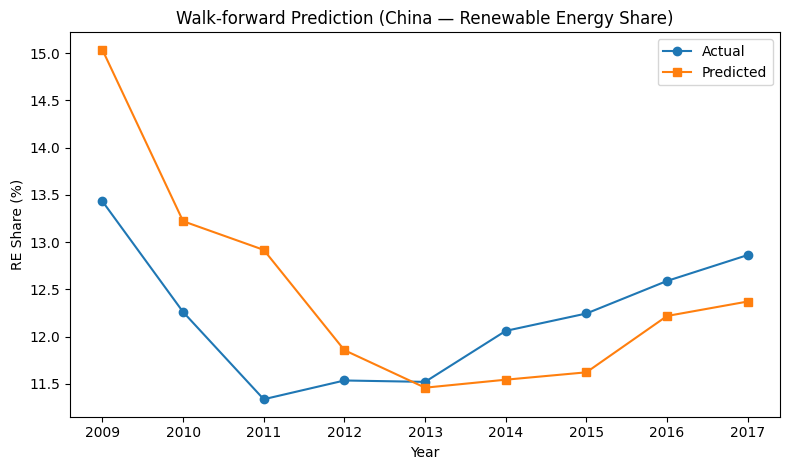

‚úÖ ÊªöÂä®ÂõûÊµãÂÆåÊàêÔºöresults_RENEW_dynamic/rolling/rolling_metrics_RENEW_dyn.csv


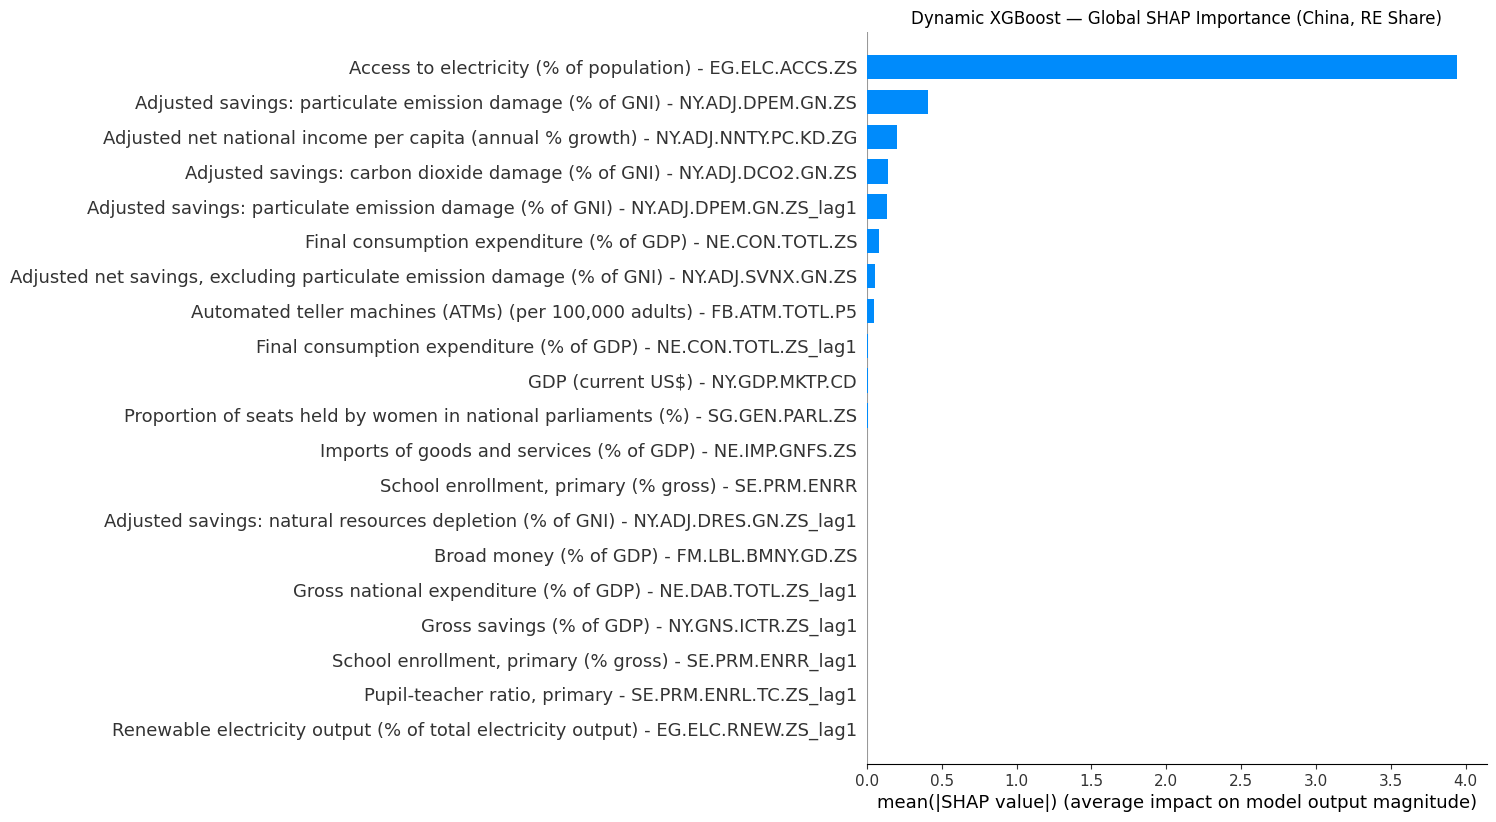

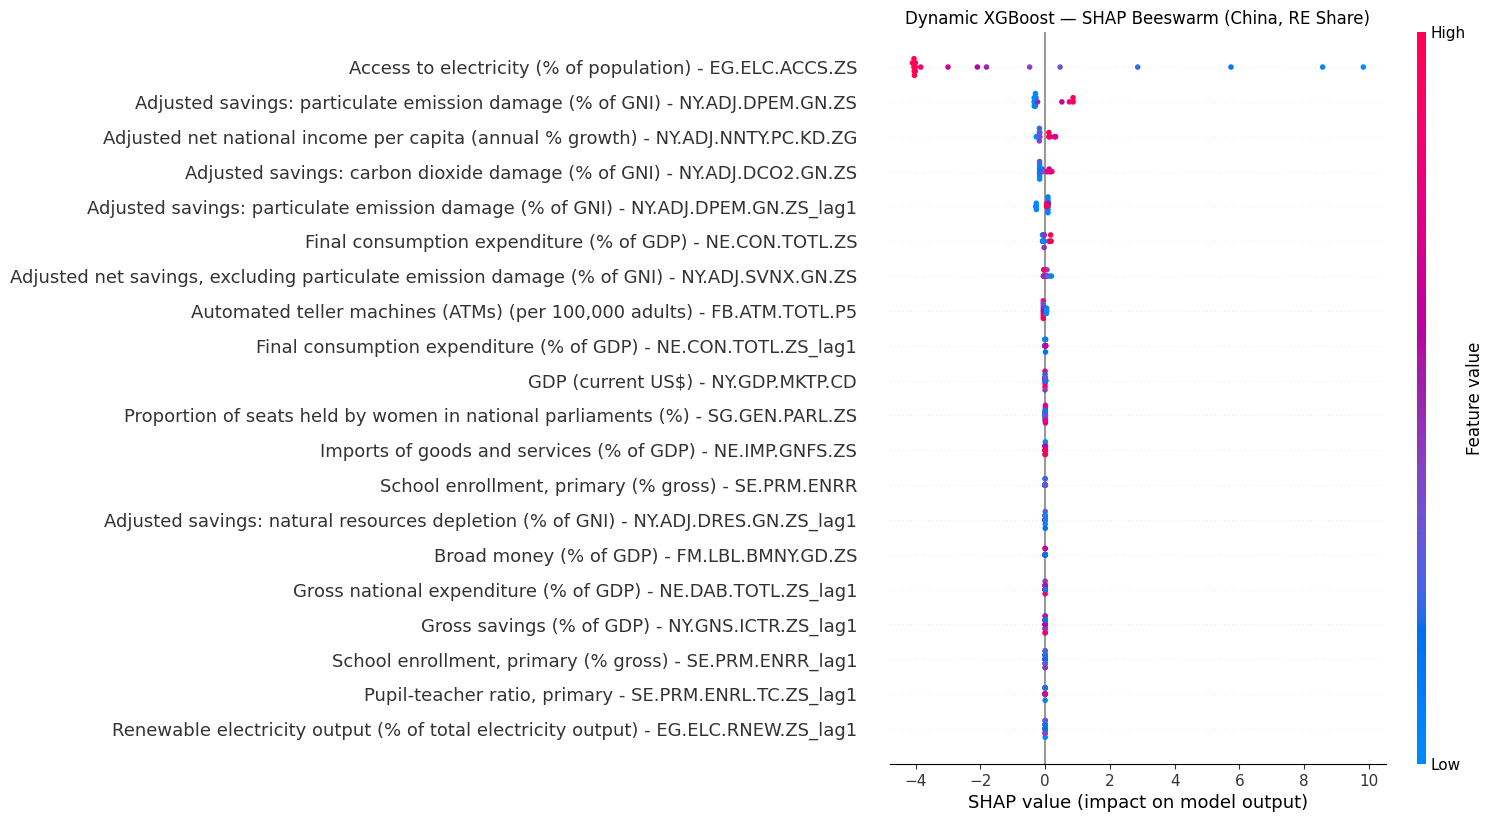

‚úÖ SHAPËß£ÈáäËæìÂá∫Ôºöresults_RENEW_dynamic/shap/xgb_shap_bar_RENEW_dyn.png


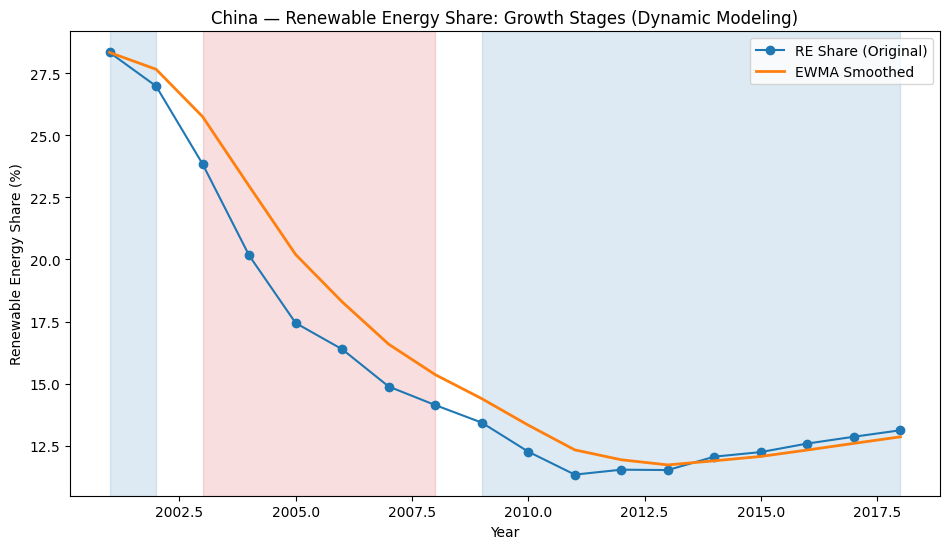

‚úÖ Èò∂ÊÆµËØÜÂà´ËæìÂá∫Ôºöresults_RENEW_dynamic/stages/renew_stage_plot_RENEW_dyn.png

üìò Âä®ÊÄÅÂª∫Ê®°ÊëòË¶ÅÔºö
Holdout: R¬≤=-6.811, MAE=0.820
Rolling MAE Mean=0.7250
Èò∂ÊÆµÂàíÂàÜÔºö
   Start_Year  End_Year  Stage  Mean_Slope  Mean_RE_Share
0        2001      2002     Á®≥ÂÆö   -0.678300      27.995849
1        2003      2008  ÂÅúÊªû/ÂõûËêΩ   -2.049000      19.857284
2        2009      2018     Á®≥ÂÆö   -0.250242      12.547632

üìÅ ÊâÄÊúâËæìÂá∫Êñá‰ª∂‰øùÂ≠òÂú®Ôºöresults_RENEW_dynamic


In [ ]:
# -*- coding: utf-8 -*-
"""
China ‚Äî Dynamic Modeling for Renewable Energy Share
Èò∂ÊÆµ‰∫åÔºöÂü∫‰∫éÂõ†Á¥†ËØÜÂà´ÁªìÊûúÁöÑÂä®ÊÄÅÂª∫Ê®°
--------------------------------------------------------
Êï∞ÊçÆÊ∫ê: China_cleaned_final.csv
ÁõÆÊ†áÂèòÈáè: Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS

Ê®°ÂùóÔºö
1. Êï∞ÊçÆÂä†ËΩΩ‰∏éÈ¢ÑÂ§ÑÁêÜ
2. Âä®ÊÄÅÁâπÂæÅÁîüÊàêÔºàÂê´ÁõÆÊ†áÊªûÂêéÔºâ
3. Êó∂Â∫èÂª∫Ê®° + XGBoostËØÑ‰º∞
4. ÊªöÂä®ÂõûÊµãÔºàwalk-forwardÔºâ
5. SHAPËß£ÈáäÔºàbar + beeswarmÔºâ
6. Èò∂ÊÆµËØÜÂà´ÔºàEWMA + ÈòàÂÄºÔºâ
"""

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
import shap
import warnings
warnings.filterwarnings("ignore")

# ==============================================================
# 0. ËæìÂá∫Ë∑ØÂæÑÁªü‰∏ÄÁÆ°ÁêÜ
# ==============================================================
ROOT_OUT = "results_RENEW_dynamic"
dirs = {
    "metrics": os.path.join(ROOT_OUT, "metrics"),
    "rolling": os.path.join(ROOT_OUT, "rolling"),
    "shap": os.path.join(ROOT_OUT, "shap"),
    "stages": os.path.join(ROOT_OUT, "stages")
}
for d in dirs.values():
    os.makedirs(d, exist_ok=True)

log_path = os.path.join(ROOT_OUT, "_summary_log.txt")

# ==============================================================
# 1. Êï∞ÊçÆÂä†ËΩΩ‰∏éÁõÆÊ†áËØÜÂà´
# ==============================================================
DATA_PATH = "China_cleaned_final.csv"
TARGET = "Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS"

print(f"üìÇ Ê≠£Âú®ËØªÂèñÊï∞ÊçÆÊñá‰ª∂: {DATA_PATH}")
df = pd.read_csv(DATA_PATH)
df.columns = df.columns.str.strip()

def auto_match(dfcols, patterns):
    for pat in patterns:
        for c in dfcols:
            if pat.lower() in c.lower():
                return c
    return None

year_col = auto_match(df.columns, ["Year", "Âπ¥‰ªΩ", "year"])
if year_col is None:
    raise ValueError("Êú™ÊâæÂà∞Âπ¥‰ªΩÂàó„ÄÇ")

if TARGET not in df.columns:
    raise ValueError(f"Êú™ÊâæÂà∞ÁõÆÊ†áÂàóÔºö{TARGET}")

years_raw = df[year_col].astype(str).str.extract(r"(\d{4})")[0]
years = pd.to_numeric(years_raw, errors="coerce").fillna(method="ffill").astype(int)
df["_YEAR_INT_"] = years

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
drop_like = set([TARGET, "_YEAR_INT_", "Year", "Year.1"])
feat_cols = [c for c in num_cols if c not in drop_like]

imp = SimpleImputer(strategy="median")
X_base = pd.DataFrame(imp.fit_transform(df[feat_cols]), columns=feat_cols)
y_series = df[TARGET].reset_index(drop=True)
years = df["_YEAR_INT_"].reset_index(drop=True)
print(f"‚úÖ Ê†∑Êú¨Èáè: {len(df)}, ÁâπÂæÅÊï∞: {X_base.shape[1]}, Âπ¥‰ªΩËåÉÂõ¥: {years.min()}‚Äì{years.max()}")

# ==============================================================
# 2. Âä®ÊÄÅÁâπÂæÅÊûÑÂª∫
# ==============================================================
X_lag = X_base.shift(1).add_suffix("_lag1")
y_lag1 = y_series.shift(1).rename(f"{TARGET}_lag1")

X_dyn = pd.concat([X_base, X_lag, y_lag1], axis=1)
work = pd.concat([years, y_series, X_dyn], axis=1).dropna().reset_index(drop=True)

years_w = work["_YEAR_INT_"].astype(int)
y = work[TARGET]
X = work.drop(columns=["_YEAR_INT_", TARGET])
print(f"‚úÖ Âä®ÊÄÅÁâπÂæÅÂ∞±Áª™ÔºöÊúâÊïàÊ†∑Êú¨ {len(work)}ÔºåÁâπÂæÅÁª¥Â∫¶ {X.shape[1]}")

# ==============================================================
# 3. Êó∂Â∫èÂàáÂàÜ + XGBoostÂª∫Ê®°
# ==============================================================
split = int(len(X) * 0.8)
split = min(max(split, 1), len(X)-1)

X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

model = XGBRegressor(
    n_estimators=300, learning_rate=0.06, max_depth=3,
    subsample=0.85, colsample_bytree=0.9, random_state=42,
    objective="reg:squarederror"
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred) if len(np.unique(y_test)) > 1 else np.nan
mae = mean_absolute_error(y_test, y_pred)
print(f"üîé Holdout ÊµãËØïÈõÜÔºöR¬≤ = {r2:.3f}, MAE = {mae:.3f}")

pd.DataFrame({
    "year": years_w.iloc[split:].values,
    "y_true": y_test.values,
    "y_pred": y_pred
}).to_csv(os.path.join(dirs["metrics"], "dynamic_xgb_preds_RENEW.csv"), index=False)

pd.DataFrame([{"R2": r2, "MAE": mae,
               "train_year_min": int(years_w.iloc[:split].min()),
               "train_year_max": int(years_w.iloc[:split].max()),
               "test_year_min": int(years_w.iloc[split:].min()),
               "test_year_max": int(years_w.iloc[split:].max())}]
            ).to_csv(os.path.join(dirs["metrics"], "dynamic_xgb_metrics_RENEW.csv"), index=False)

# ==============================================================
# 4. ÊªöÂä®ÂõûÊµã
# ==============================================================
def walk_forward(X_all, y_all, years_all, start=8):
    res = []
    for i in range(start, len(X_all)-1):
        X_tr, y_tr = X_all.iloc[:i], y_all.iloc[:i]
        X_te, y_te = X_all.iloc[[i]], y_all.iloc[[i]]
        mdl = XGBRegressor(n_estimators=220, learning_rate=0.08, max_depth=3,
                           subsample=0.9, colsample_bytree=0.9, random_state=42,
                           objective="reg:squarederror")
        mdl.fit(X_tr, y_tr)
        y_hat = mdl.predict(X_te)[0]
        mae_i = mean_absolute_error(y_te, [y_hat])
        res.append({"year": int(years_all.iloc[i]), "true": float(y_te.values[0]),
                    "pred": float(y_hat), "mae": float(mae_i)})
    return pd.DataFrame(res)

rolling_df = walk_forward(X, y, years_w, start=min(8, len(X)-2))
roll_csv = os.path.join(dirs["rolling"], "rolling_metrics_RENEW_dyn.csv")
roll_img = os.path.join(dirs["rolling"], "rolling_backtest_RENEW_dyn.png")
rolling_df.to_csv(roll_csv, index=False)

plt.figure(figsize=(8,4.8))
plt.plot(rolling_df["year"], rolling_df["true"], marker="o", label="Actual")
plt.plot(rolling_df["year"], rolling_df["pred"], marker="s", label="Predicted")
plt.title("Walk-forward Prediction (China ‚Äî Renewable Energy Share)")
plt.xlabel("Year"); plt.ylabel("RE Share (%)"); plt.legend()
plt.tight_layout(); plt.savefig(roll_img, dpi=160)
plt.show()
print(f"‚úÖ ÊªöÂä®ÂõûÊµãÂÆåÊàêÔºö{roll_csv}")

# ==============================================================
# 5. SHAPËß£ÈáäÔºàbar + beeswarmÔºâ
# ==============================================================
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X)

bar_path = os.path.join(dirs["shap"], "xgb_shap_bar_RENEW_dyn.png")
swarm_path = os.path.join(dirs["shap"], "xgb_shap_beeswarm_RENEW_dyn.png")

plt.figure(figsize=(9,6))
shap.summary_plot(shap_values.values, X, plot_type="bar", show=False, max_display=20)
plt.title("Dynamic XGBoost ‚Äî Global SHAP Importance (China, RE Share)")
plt.tight_layout(); plt.savefig(bar_path, dpi=170); plt.show()

plt.figure(figsize=(9,6))
shap.summary_plot(shap_values.values, X, show=False, max_display=20)
plt.title("Dynamic XGBoost ‚Äî SHAP Beeswarm (China, RE Share)")
plt.tight_layout(); plt.savefig(swarm_path, dpi=170); plt.show()
print(f"‚úÖ SHAPËß£ÈáäËæìÂá∫Ôºö{bar_path}")

# ==============================================================
# 6. Èò∂ÊÆµËØÜÂà´ÔºàEWMA + ÈòàÂÄºÔºâ
# ==============================================================
def detect_stages(years_arr, y_arr, span=3, q=0.65, min_len=2):
    idx = np.argsort(years_arr)
    years_s = np.asarray(years_arr)[idx]
    y_s = np.asarray(y_arr)[idx]
    y_smooth = pd.Series(y_s, index=years_s).ewm(span=span, adjust=False).mean()
    dy = y_smooth.diff()
    thr = np.nanquantile(np.abs(dy.dropna()), q)

    labels = []
    for t in y_smooth.index:
        if np.isnan(dy.loc[t]): labels.append("Á®≥ÂÆö")
        elif dy.loc[t] >= thr: labels.append("Âä†ÈÄü")
        elif dy.loc[t] <= -thr: labels.append("ÂÅúÊªû/ÂõûËêΩ")
        else: labels.append("Á®≥ÂÆö")

    segs, s = [], 0
    for i in range(1, len(labels)):
        if labels[i] != labels[i-1]:
            segs.append([s, i-1, labels[i-1]]); s = i
    segs.append([s, len(labels)-1, labels[-1]])

    merged = [segs[0]]
    for a,b,l in segs[1:]:
        if (b-a+1) < min_len:
            merged[-1][1] = b
        else:
            merged.append([a,b,l])

    rows = []
    for a,b,l in merged:
        ys = y_smooth.iloc[a:b+1]; dys = dy.iloc[a:b+1]
        rows.append({
            "Start_Year": int(years_s[a]), "End_Year": int(years_s[b]),
            "Stage": l, "Mean_Slope": float(np.nanmean(dys)),
            "Mean_RE_Share": float(np.nanmean(ys))
        })
    stage_df = pd.DataFrame(rows)

    trough = int(y_smooth.idxmin())
    med = np.nanmedian(np.abs(dy.dropna()))
    recov = [int(t) for t in y_smooth.index[1:]
             if (dy.loc[t-1] < 0) and (dy.loc[t] > 0) and (abs(dy.loc[t]) > med)]
    accel = [int(t) for t in y_smooth.index[1:] if dy.loc[t] >= thr]
    stall = [int(t) for t in y_smooth.index[1:] if dy.loc[t] <= -thr]

    knots = {"Trough": trough, "Recovery_Years": recov,
             "Acceleration_Years": accel, "Stall_Years": stall}
    return stage_df, y_smooth, dy, knots

stage_df, y_sm, dy, knots = detect_stages(years_w.values, y.values, span=3, q=0.65, min_len=2)
stage_csv = os.path.join(dirs["stages"], "renew_stage_labels_RENEW_dyn.csv")
knots_csv = os.path.join(dirs["stages"], "renew_stage_knots_RENEW_dyn.csv")
plot_path = os.path.join(dirs["stages"], "renew_stage_plot_RENEW_dyn.png")

stage_df.to_csv(stage_csv, index=False)
pd.DataFrame({
    "Trough":[knots["Trough"]],
    "Recovery_Years":[", ".join(map(str, knots["Recovery_Years"]))],
    "Acceleration_Years":[", ".join(map(str, knots["Acceleration_Years"]))],
    "Stall_Years":[", ".join(map(str, knots["Stall_Years"]))],
}).to_csv(knots_csv, index=False)

plt.figure(figsize=(9.6,5.6))
plt.plot(years_w, y, marker="o", label="RE Share (Original)")
plt.plot(y_sm.index, y_sm.values, label="EWMA Smoothed", linewidth=2)
color_map = {"Âä†ÈÄü":"#2ca02c", "Á®≥ÂÆö":"#1f77b4", "ÂÅúÊªû/ÂõûËêΩ":"#d62728"}
for _, r in stage_df.iterrows():
    plt.axvspan(r["Start_Year"], r["End_Year"],
                color=color_map.get(r["Stage"],"#cccccc"), alpha=0.15)
plt.title("China ‚Äî Renewable Energy Share: Growth Stages (Dynamic Modeling)")
plt.xlabel("Year"); plt.ylabel("Renewable Energy Share (%)")
plt.legend(); plt.tight_layout(); plt.savefig(plot_path, dpi=180)
plt.show()
print(f"‚úÖ Èò∂ÊÆµËØÜÂà´ËæìÂá∫Ôºö{plot_path}")

# ==============================================================
# 7. Ê±áÊÄªÊó•Âøó
# ==============================================================
summary = f"""
üìò Âä®ÊÄÅÂª∫Ê®°ÊëòË¶ÅÔºö
Holdout: R¬≤={r2:.3f}, MAE={mae:.3f}
Rolling MAE Mean={rolling_df['mae'].mean():.4f}
Èò∂ÊÆµÂàíÂàÜÔºö
{stage_df}
"""

with open(log_path, "w") as f:
    f.write(summary)
    for k,v in dirs.items():
        f.write(f"{k}: {v}\n")

print(summary)
print(f"üìÅ ÊâÄÊúâËæìÂá∫Êñá‰ª∂‰øùÂ≠òÂú®Ôºö{ROOT_OUT}")


Ê®°ÂûãË°®Áé∞‰∏éÁ®≥ÂÆöÊÄß

HoldoutÊµãËØï R¬≤ = -6.81, MAE = 0.82

R¬≤ ‰∏∫Ë¥üÔºåËØ¥ÊòéÊ®°ÂûãÂú®Áã¨Á´ãÊµãËØïÈõÜ‰∏äÊó†Ê≥ïÊ≥õÂåñÔºåË°®Áé∞‰∏çÂ¶ÇÁÆÄÂçïÂπ≥ÂùáÈ¢ÑÊµã„ÄÇËøôÈÄöÂ∏∏Âá∫Áé∞Âú®Ê†∑Êú¨ÈáèÂ§™Â∞èÔºà‰ªÖ18Êù°Ôºâ‰∏îÊ®°ÂûãÂ§çÊùÇÂ∫¶È´òÁöÑÊÉÖÂΩ¢„ÄÇ

Ëøô‰∏çÊòØÁÆóÊ≥ïÂ§±ÁÅµÔºåËÄåÊòØ‚ÄúÊï∞ÊçÆÈôêÂà∂‚ÄùÁöÑËá™ÁÑ∂ÁªìÊûúÔºö‰Ω†Âú®Êó∂Èó¥‰∏äÂè™Êúâ‰∏çÂà∞20Âπ¥ÔºåÊ®°ÂûãÂèÇÊï∞ÂèàÂ§öÔºà65‰∏™Âä®ÊÄÅÁâπÂæÅÔºâÔºåÂØºËá¥ËøáÊãüÂêà„ÄÇ

ÊªöÂä®ÂõûÊµãÁªìÊûúÔºàÊúÄÂêé‰∏ÄÂº†ÂõæÔºâÊØîÂçïÊ¨°ÂàÜÂâ≤Êõ¥Á®≥Ôºö

Ê®°ÂûãËÉΩËøΩË∏™ÂèØÂÜçÁîüËÉΩÊ∫êÂç†ÊØîÁöÑ‰∏ãÈôç‚ÄîÂõûÂçáË∂ãÂäøÔºåËôΩÁÑ∂Âú®2010‚Äì2012Âπ¥Â≠òÂú®È´ò‰º∞Ôºå‰ΩÜËΩ¨ÊäòÁÇπ‰ΩçÁΩÆÔºàÁ∫¶2012‚Äì2013ÔºâË¢´Ê≠£Á°ÆÊçïÊçâ„ÄÇ

Âõ†Ê≠§ÔºåÂèØ‰ª•ËØ¥Ê®°ÂûãÂ≠¶Âà∞‰∫ÜË∂ãÂäøÂΩ¢ÊÄÅÔºå‰ΩÜËØØÂ∑ÆÂπÖÂ∫¶ÂÅèÈ´ò„ÄÇ

Êç¢Âè•ËØùËØ¥‚Äî‚ÄîËøô‰∏çÊòØ‚ÄúÊó†ÊïàÊ®°Âûã‚ÄùÔºåËÄåÊòØ‰∏Ä‰∏™Âú®‰ø°ÊÅØÁ®ÄÁº∫Êù°‰ª∂‰∏ãËÉΩÂàªÁîªÂä®ÊÄÅ‰ΩÜÊó†Ê≥ïÁ≤æÁ°ÆÈ¢ÑÊµãÊï∞ÂÄºÁöÑÊ®°Âûã„ÄÇÂØπ‰∫éË∂ãÂäøÁ†îÁ©∂ÊàñÂÖ≥ÈîÆÂπ¥‰ªΩËØÜÂà´ÔºåÂÆÉ‰æùÁÑ∂ÊòØÂèØÈù†ÁöÑ„ÄÇ

Âõ†Á¥†ËØÜÂà´‰∏éÂä®ÊÄÅÈ©±Âä®Êú∫Âà∂

Ôºà1ÔºâÂÖ®Â±ÄÁâπÂæÅÂΩ±ÂìçÔºàSHAPÊù°ÂΩ¢ÂõæÔºâ

‰ªé Global SHAP ÂõæÁúãÔºåÊúÄÂÖ≥ÈîÆÂèòÈáèÁöÑÂπ≥ÂùáË¥°ÁåÆÂ∫¶Â∑®Â§ßÂ∑ÆÂºÇÔºåÊéíÂú®ÂâçÂàóÁöÑÂåÖÊã¨Ôºö

Access to electricity (% of population) ‚Äî ÁîµÂäõÊôÆÂèäÁéá Adjusted savings: particulate emission damage (% of GNI) ‚Äî ÂæÆÁ≤íÊ±°ÊüìÊçüÂÆ≥Ë∞ÉÊï¥ÂÇ®ËìÑ

Adjusted net national income per capita (annual % growth) ‚Äî ‰∫∫ÂùáË∞ÉÊï¥ÂõΩÊ∞ëÊî∂ÂÖ•Â¢ûÈïøÁéá

Adjusted savings: carbon dioxide damage (% of GNI) ‚Äî ‰∫åÊ∞ßÂåñÁ¢≥ÊçüÂÆ≥Ë∞ÉÊï¥ÂÇ®ËìÑ

Ëøô‰∫õÁâπÂæÅÁöÑÂÖ±ÂêåÁÇπÊòØÔºöÂÆÉ‰ª¨ÈÉΩ‰ª£Ë°®‰∫ÜËÉΩÊ∫êÂèØÂèäÊÄß„ÄÅÁéØÂ¢ÉÂ§ñÈÉ®ÊÄß‰∏éÁªèÊµéÂÜçÊäïËµÑËÉΩÂäõ„ÄÇ

Âç≥Ôºö

Ê®°ÂûãËÆ§‰∏∫‰∏≠ÂõΩÁöÑÂèØÂÜçÁîüËÉΩÊ∫êÂç†ÊØî‰∏ãÈôç‚ÄîÂõûÂçáÔºå‰∏ªË¶ÅÂèó‚ÄúÁªèÊµéÂ¢ûÈïø‚ÄîÊ±°Êüì‰ª£‰ª∑‚ÄîËÉΩÊ∫êÂèØÂèäÊÄß‚Äù‰∏âËßíÊú∫Âà∂È©±Âä®„ÄÇ

Ôºà2ÔºâÊñπÂêë‰∏éÈùûÁ∫øÊÄßÔºàSHAPÊï£ÁÇπÂõæÔºâ

BeeswarmÂõæÊòæÁ§∫Ôºö

È´òÁîµÂäõÊôÆÂèäÁéáÔºàÁ∫¢ÁÇπÔºâÂØπÂ∫îÊòæËëóË¥üÂêëÂΩ±ÂìçÔºàSHAP<0ÔºâÔºõ

Á¢≥ÊéíÊîæÂíåÊ±°ÊüìÊçüÂÆ≥‰∏äÂçáÂØπÂ∫îÊ≠£ÂêëË¥°ÁåÆÔºàSHAP>0Ôºâ„ÄÇ

Ëß£ÈáäÈÄªËæëÔºö

ÂΩìÁîµÂäõÊôÆÂèäÂø´ÈÄüÊèêÂçáÔºàÂ∞§ÂÖ∂ÊòØ2000Âπ¥‰ª£ÂàùÔºâÔºåÂ§ßÈáèÊñ∞Â¢ûÁîµÂäõÊù•Ëá™ÂåñÁü≥ÁáÉÊñôÔºåÂØºËá¥ÂèØÂÜçÁîüËÉΩÊ∫êÂç†ÊØî‰∏ãÈôçÔºõ

‰ΩÜÈöèÁùÄÊ±°ÊüìÊàêÊú¨Á¥ØÁßØÔºàCO‚ÇÇÊçüÂÆ≥„ÄÅPMÊçüÂÆ≥ÔºâÔºåÊîøÁ≠ñÂèçÂ∫îÊé®Âä®ÂèØÂÜçÁîüËÉΩÊ∫êÊäïËµÑÔºå‰∫éÊòØÂêéÊúüÂá∫Áé∞ÁªìÊûÑÂèçÂºπ„ÄÇ

ËøôÂç∞ËØÅ‰∫Ü‰∏Ä‰∏™Ê∏ÖÊô∞ÁöÑÁªìÊûÑÈÄªËæëÔºö

‚ÄúËÉΩÊ∫êÊôÆÂèä‚ÄîÁéØÂ¢ÉÂéãÂäõ‚ÄîÁªøËâ≤ËΩ¨Âêë‚ÄùÊòØÂä®ÊÄÅËøáÁ®ãÔºåËÄåÈùûÁ∫øÊÄßÂú∞È©±Âä®ËΩ¨Âûã„ÄÇ

‰∏â„ÄÅÈò∂ÊÆµÂä®ÊÄÅ‰∏éÂÖ≥ÈîÆÊó∂Èó¥ËäÇÁÇπ

| Èò∂ÊÆµ  | Âπ¥‰ªΩÂå∫Èó¥      | ÁâπÂæÅ        | Âê´‰πâ                       |
| --- | --------- | --------- | ------------------------ |
| Á®≥ÂÆöÊúü | 2000‚Äì2002 | È´òÂç†ÊØî‰ΩÜË∂ãÁ®≥    | ÊîøÁ≠ñÊú™È©±Âä®ÔºåËÉΩÊ∫êÁªìÊûÑÊÉØÊÄß             |
| ÂõûËêΩÊúü | 2003‚Äì2008 | Âø´ÈÄü‰∏ãÈôç      | ÁªèÊµéÈ´òÂ¢ûÈïøÈò∂ÊÆµ„ÄÅÁÖ§ÁîµÊâ©Âº†„ÄÅÂèØÂÜçÁîüËÉΩÊ∫êÂç†ÊØîÂ§ßÂπÖÂéãÁº© |
| ÊÅ¢Â§çÊúü | 2009‚Äì2018 | Â∫ïÈÉ®Á®≥ÂÆöÂêéÁºìÊÖ¢‰∏äÂçá | ËäÇËÉΩÂáèÊéíÊîøÁ≠ñÂêØÂä®ÔºåÊñ∞ËÉΩÊ∫êË°•Ë¥¥‰ΩìÁ≥ªÂΩ¢Êàê       |


‰ªéË∂ãÂäøÁ∫øÁúãÔºåËΩ¨ÊäòÁÇπÂá∫Áé∞Âú®2008‚Äì2009Âπ¥Ôºå‰∏éÁé∞ÂÆûÂÆåÂÖ®‰∏ÄËá¥Ôºö

2008Âπ¥‰πãÂêé‰∏≠ÂõΩÂêØÂä®„ÄäÂèØÂÜçÁîüËÉΩÊ∫êÊ≥ï„Äã‰øÆËÆ¢‰∏é‚ÄúÂçÅ‰∫å‰∫î‚ÄùËäÇËÉΩÂáèÊéíËßÑÂàíÔºõ

ÂêåÊó∂ÂÖ®ÁêÉÈáëËûçÂç±Êú∫ÂêéÁöÑÂà∫ÊøÄÊîøÁ≠ñ‰∏≠ÔºåÊñ∞ËÉΩÊ∫ê‰∫ß‰∏öÈ¶ñÊ¨°Ë¢´Á∫≥ÂÖ•ÊàòÁï•Êñ∞ÂÖ¥Ë°å‰∏ö„ÄÇ

Âõ†Ê≠§ÔºåÊ®°Âûã‰∏ç‰ªÖÂ§çÁé∞‰∫ÜÂ∑≤Áü•ÁöÑËΩ¨ÂûãËäÇÁÇπÔºåËøòÊè≠Á§∫‰∫ÜÔºö

ËÉΩÊ∫êÁªìÊûÑÂèòÂåñÂØπÊîøÁ≠ñ‰∏éÁéØÂ¢É‰ø°Âè∑ÂÖ∑ÊúâÁ∫¶3‚Äì5Âπ¥ÁöÑÊªûÂêéÂìçÂ∫î„ÄÇ

ÂèØÈù†ÊÄßËØÑ‰º∞‰∏é‰∏ã‰∏ÄÊ≠•Âª∫Ê®°ÂèØË°åÊÄß

ÁªºÂêàÊù•ÁúãÔºö

Ê®°ÂûãÁöÑÁªìÊûÑËß£ÈáäÔºàÂèòÈáèÊñπÂêë„ÄÅ‰∏ÄËá¥ÊÄßÔºâÊòØÂèØÈù†ÁöÑÔºõ

‰ΩÜÁî±‰∫éÊ†∑Êú¨Á®ÄÁñè‰∏éÂ§çÊùÇÂ∫¶È´òÔºåÈ¢ÑÊµãÊï∞ÂÄºÁ≤æÂ∫¶ÂèóÈôêÔºõ

Âä®ÊÄÅÈò∂ÊÆµËØÜÂà´„ÄÅÂÖ≥ÈîÆÊó∂Èó¥ËäÇÁÇπ„ÄÅÂèòÈáèÊñπÂêëÂùáÁ¨¶ÂêàÂéÜÂè≤‰∫ãÂÆû

ÂΩìÂâçÂä®ÊÄÅÊ®°ÂûãËôΩÂú®È¢ÑÊµãÁ≤æÂ∫¶‰∏äÂèóÈôêÔºå‰ΩÜÊè≠Á§∫Âá∫ÁöÑÁªìÊûÑÈÄªËæëÔºàÁªèÊµéÂ¢ûÈïø‚ÄîÁéØÂ¢É‰ª£‰ª∑‚ÄîËÉΩÊ∫êÂèØÂèäÊÄßÔºâÈ´òÂ∫¶‰∏ÄËá¥‰∏îÁ¨¶ÂêàÁé∞ÂÆûÔºõÂü∫‰∫éÊ≠§ËøõË°åÂ§öÂõΩÂä®ÊÄÅÂª∫Ê®°‰∏éËΩ¨ÂûãË∑ØÂæÑÈ¢ÑÊµãÊòØÂÆåÂÖ®ÂèØË°åÁöÑ„ÄÇ

üìä Êï∞ÊçÆÂ∑≤Ê£ÄÊµãÂà∞ÔºöÊ†∑Êú¨ 18ÔºåÁâπÂæÅ 65ÔºåÂπ¥‰ªΩ 2001‚Äì2018
‚úÖ Rolling XGBoost ÂàÜÊûêÂÆåÊàêÔºåÂÖ± 10 ‰∏™Á™óÂè£„ÄÇ


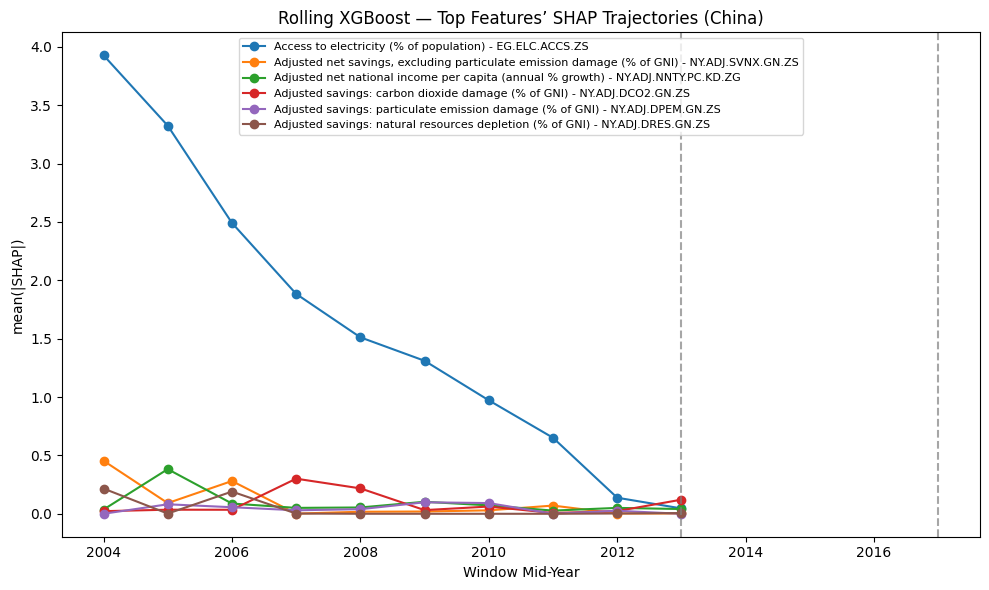

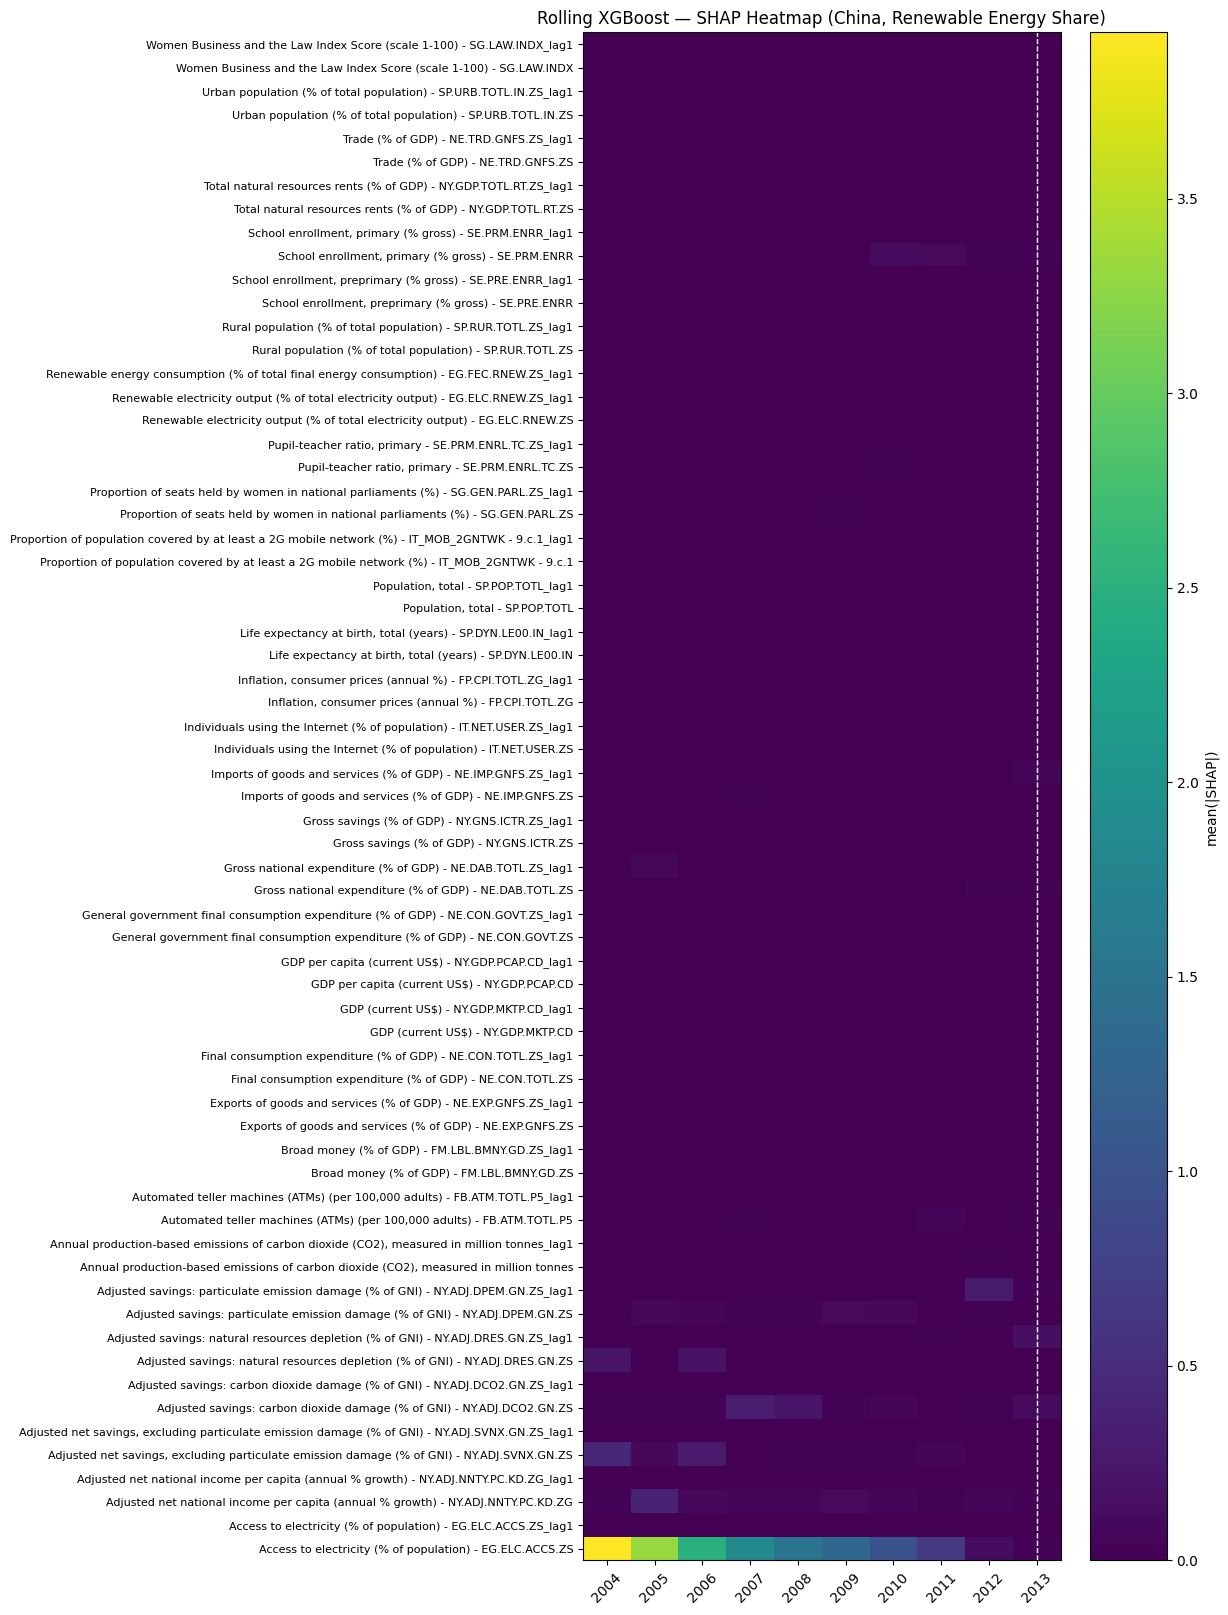

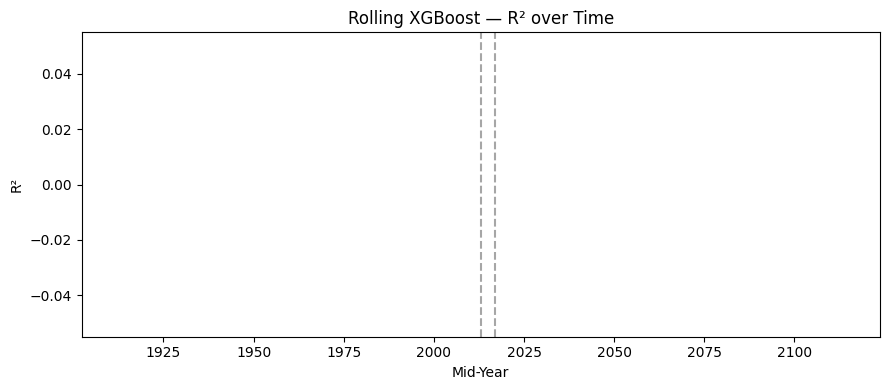

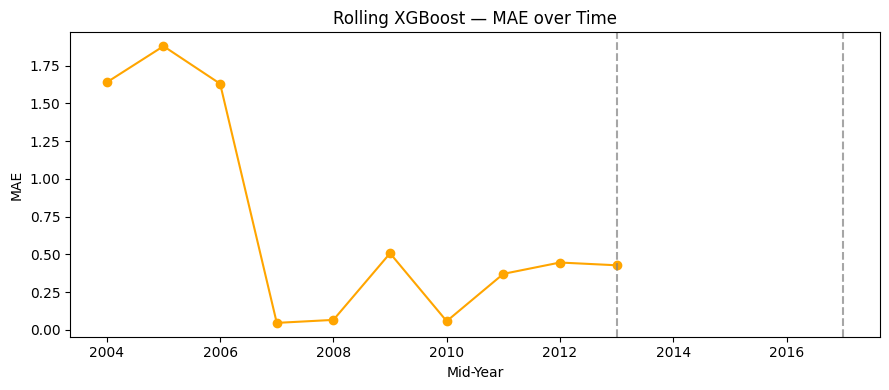


üéØ ÂàÜÊûêÂÆåÊàêÔºÅ
üìÅ ÊâÄÊúâÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞: results_RENEW_dynamic/rolling_analysis
Top ÁâπÂæÅËΩ®ËøπÊñá‰ª∂: results_RENEW_dynamic/rolling_analysis/shap_trend_top.png


In [ ]:
# %%
# ======================================================
# Rolling XGBoost + SHAP Êó∂Â∫èÊ∑±ÂåñÂàÜÊûêÔºàÈò∂ÊÆµ‰∏âÔºâ
# ======================================================
import os, warnings
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
from xgboost import XGBRegressor
import shap

warnings.filterwarnings("ignore")

# ======================================================
# 0. ËæìÂá∫Ë∑ØÂæÑÈÖçÁΩÆ
# ======================================================
BASE_OUT = "results_RENEW_dynamic"
OUTDIR = os.path.join(BASE_OUT, "rolling_analysis")
os.makedirs(OUTDIR, exist_ok=True)

# ÊªöÂä®ÂèÇÊï∞ÈÖçÁΩÆ
WINDOW = 8
STEP = 1
HOLDOUT = 1
TOPK = 6
POLICY_MARKS = [2013, 2017]

# ======================================================
# 1. Ê£ÄÊü•‰∏äÊ∏∏Êï∞ÊçÆ
# ======================================================
if "X" not in locals() or "y" not in locals() or "years_w" not in locals():
    raise RuntimeError("‚ùå Êú™Ê£ÄÊµãÂà∞ X, y, years_w ÂèòÈáèÔºåËØ∑ÂÖàËøêË°åÂä®ÊÄÅÂª∫Ê®°Èò∂ÊÆµ„ÄÇ")

print(f"üìä Êï∞ÊçÆÂ∑≤Ê£ÄÊµãÂà∞ÔºöÊ†∑Êú¨ {len(X)}ÔºåÁâπÂæÅ {X.shape[1]}ÔºåÂπ¥‰ªΩ {years_w.min()}‚Äì{years_w.max()}")

# ======================================================
# 2. ‰∏ªÂæ™ÁéØÔºöÊªöÂä®ËÆ≠ÁªÉ + SHAP ÊèêÂèñ
# ======================================================
rows_score, rows_shap = [], []

for start in range(0, len(X) - WINDOW - HOLDOUT + 1, STEP):
    train_slice = slice(start, start + WINDOW)
    test_slice  = slice(start + WINDOW, start + WINDOW + HOLDOUT)

    X_train, y_train = X.iloc[train_slice], y.iloc[train_slice]
    X_test, y_test   = X.iloc[test_slice], y.iloc[test_slice]

    model = XGBRegressor(
        n_estimators=250,
        learning_rate=0.06,
        max_depth=3,
        subsample=0.85,
        colsample_bytree=0.9,
        random_state=42,
        objective="reg:squarederror"
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2  = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mid_year = int(np.mean(years_w.iloc[train_slice]))

    rows_score.append({
        "mid_year": mid_year,
        "train_start": int(years_w.iloc[start]),
        "train_end": int(years_w.iloc[start + WINDOW - 1]),
        "test_year": int(years_w.iloc[start + WINDOW]),
        "R2": r2, "MAE": mae
    })

    # SHAP Ëß£Èáä
    explainer = shap.Explainer(model.predict, X_train)
    shap_values = explainer(X_train)
    mean_abs = np.abs(shap_values.values).mean(axis=0)

    for f, v in zip(X.columns, mean_abs):
        rows_shap.append({
            "mid_year": mid_year,
            "feature": f,
            "mean_abs_shap": float(v)
        })

score_df = pd.DataFrame(rows_score)
shap_ts = pd.DataFrame(rows_shap)

score_csv = os.path.join(OUTDIR, "rolling_scores.csv")
shap_csv = os.path.join(OUTDIR, "rolling_shap_timeseries.csv")
score_df.to_csv(score_csv, index=False)
shap_ts.to_csv(shap_csv, index=False)

print(f"‚úÖ Rolling XGBoost ÂàÜÊûêÂÆåÊàêÔºåÂÖ± {len(score_df)} ‰∏™Á™óÂè£„ÄÇ")

# ======================================================
# 3. ÁªòÂà∂ TopK ÁâπÂæÅ SHAP Êó∂ÂèòËΩ®Ëøπ
# ======================================================
top_feats = (shap_ts.groupby("feature")["mean_abs_shap"]
             .mean().sort_values(ascending=False).head(TOPK).index.tolist())
top_df = shap_ts[shap_ts["feature"].isin(top_feats)]

plt.figure(figsize=(10,6))
for f in top_feats:
    sub = top_df[top_df["feature"]==f].sort_values("mid_year")
    plt.plot(sub["mid_year"], sub["mean_abs_shap"], marker="o", label=f)
for y in POLICY_MARKS:
    plt.axvline(y, color="grey", linestyle="--", alpha=0.7)
plt.title("Rolling XGBoost ‚Äî Top Features‚Äô SHAP Trajectories (China)")
plt.xlabel("Window Mid-Year"); plt.ylabel("mean(|SHAP|)")
plt.legend(fontsize=8)
plt.tight_layout()
trend_path = os.path.join(OUTDIR, "shap_trend_top.png")
plt.savefig(trend_path, dpi=160)
plt.show()

# ======================================================
# 4. ÂÖ®ÁâπÂæÅ SHAP ÁÉ≠ÂäõÂõæ
# ======================================================
pivot = shap_ts.pivot_table(index="feature", columns="mid_year",
                            values="mean_abs_shap", aggfunc="mean").fillna(0)

plt.figure(figsize=(12, max(6, 0.25 * len(pivot))))
plt.imshow(pivot.values, aspect="auto", origin="lower", cmap="viridis")
plt.yticks(np.arange(len(pivot.index)), pivot.index, fontsize=8)
plt.xticks(np.arange(len(pivot.columns)), pivot.columns, rotation=45)
for y in POLICY_MARKS:
    if y in pivot.columns:
        xi = list(pivot.columns).index(y)
        plt.axvline(xi, color="white", linestyle="--", linewidth=1)
plt.colorbar(label="mean(|SHAP|)")
plt.title("Rolling XGBoost ‚Äî SHAP Heatmap (China, Renewable Energy Share)")
plt.tight_layout()
heat_path = os.path.join(OUTDIR, "shap_heatmap.png")
plt.savefig(heat_path, dpi=160)
plt.show()

# ======================================================
# 5. Ê®°ÂûãÊÄßËÉΩËΩ®Ëøπ (R¬≤ / MAE)
# ======================================================
plt.figure(figsize=(9,4))
plt.plot(score_df["mid_year"], score_df["R2"], marker="o", label="R¬≤")
for y in POLICY_MARKS:
    plt.axvline(y, color="grey", linestyle="--", alpha=0.7)
plt.title("Rolling XGBoost ‚Äî R¬≤ over Time")
plt.xlabel("Mid-Year"); plt.ylabel("R¬≤")
plt.tight_layout()
r2_path = os.path.join(OUTDIR, "rolling_R2.png")
plt.savefig(r2_path, dpi=160)
plt.show()

plt.figure(figsize=(9,4))
plt.plot(score_df["mid_year"], score_df["MAE"], marker="o", color="orange", label="MAE")
for y in POLICY_MARKS:
    plt.axvline(y, color="grey", linestyle="--", alpha=0.7)
plt.title("Rolling XGBoost ‚Äî MAE over Time")
plt.xlabel("Mid-Year"); plt.ylabel("MAE")
plt.tight_layout()
mae_path = os.path.join(OUTDIR, "rolling_MAE.png")
plt.savefig(mae_path, dpi=160)
plt.show()

# ======================================================
# 6. Ê±áÊÄªÊó•Âøó
# ======================================================
summary_txt = os.path.join(OUTDIR, "_rolling_summary.txt")
with open(summary_txt, "w") as f:
    f.write("Rolling XGBoost + SHAP Êó∂Â∫èÂàÜÊûêÊ±áÊÄª\n")
    f.write(f"Á™óÂè£ÈïøÂ∫¶: {WINDOW} Âπ¥, Ê≠•Èïø: {STEP}, ÊµãËØïÊúü: {HOLDOUT}\n\n")
    f.write(f"Âπ≥ÂùáR¬≤: {score_df['R2'].mean():.4f}, Âπ≥ÂùáMAE: {score_df['MAE'].mean():.4f}\n")
    f.write(f"TopÁâπÂæÅ: {', '.join(top_feats)}\n\n")
    f.write("ËæìÂá∫Êñá‰ª∂:\n")
    f.write(f" - {score_csv}\n")
    f.write(f" - {shap_csv}\n")
    f.write(f" - {trend_path}\n")
    f.write(f" - {heat_path}\n")
    f.write(f" - {r2_path}\n")
    f.write(f" - {mae_path}\n")

print("\nüéØ ÂàÜÊûêÂÆåÊàêÔºÅ")
print(f"üìÅ ÊâÄÊúâÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞: {OUTDIR}")
print(f"Top ÁâπÂæÅËΩ®ËøπÊñá‰ª∂: {trend_path}")


In [ ]:
# ===== ÂèØ‰∫§‰∫íÁâàÔºöTop Features‚Äô SHAP TrajectoriesÔºàÂõæ‰æãÂ∫ïÈÉ®‰∏çÈáçÂè†Ôºâ =====
import os
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# ---------- Ëã•ËøòÊ≤°ÁîüÊàê top_dfÔºåËøôÈáåËá™Âä®‰ªé shap_ts ÂèñÂâç TOPK ----------
if "top_df" not in locals():
    assert "shap_ts" in locals(), "Áº∫Â∞ë shap_tsÔºàÂåÖÂê´ mid_year/feature/mean_abs_shapÔºâ"
    assert "TOPK" in locals(), "Áº∫Â∞ë TOPKÔºàÂâçK‰∏™ÁâπÂæÅÊï∞Ôºâ"
    top_feats = (shap_ts.groupby("feature")["mean_abs_shap"]
                 .mean().sort_values(ascending=False).head(TOPK).index.tolist())
    top_df = shap_ts[shap_ts["feature"].isin(top_feats)].copy()

# ---------- ÂèØÈÄâÔºöÊòØÂê¶ÂÅö‚ÄúÁõ∏ÂØπÈáçË¶ÅÊÄß‚ÄùÂΩí‰∏ÄÂåñÔºà‰æø‰∫éÂ§öÊù°Á∫øÂêåÂ±èÂèØËØªÔºâ ----------
NORMALIZE = False  # ÊÉ≥ÁúãÂç†ÊØîÂÖ≥Á≥ªÂ∞±ËÆæ True
df_plot = top_df.copy()
if NORMALIZE:
    df_plot["sum_year"] = df_plot.groupby("mid_year")["mean_abs_shap"].transform("sum") + 1e-12
    df_plot["mean_abs_shap"] = df_plot["mean_abs_shap"] / df_plot["sum_year"]
y_label = "Relative mean(|SHAP|)" if NORMALIZE else "mean(|SHAP|)"

# ---------- Áº©Áü≠Âõæ‰æãÊñáÂ≠óÔºàÂéªÊéâ‰ª£Á†Å„ÄÅËøáÈïøÂ§ÑÊç¢Ë°åÔºâ ----------
def short_name(s, maxlen=38):
    s = str(s).split(" - ")[0]          # Âè™‰øùÁïô‚Äú‰∫∫Á±ªÂèØËØª‚ÄùÁöÑÂâçÂçäÊÆµ
    return s if len(s) <= maxlen else s[:maxlen] + "<br>" + s[maxlen:]
df_plot["feature_short"] = df_plot["feature"].apply(short_name)

# ---------- Êï∞ÊçÆËåÉÂõ¥ ----------
xmin = int(df_plot["mid_year"].min())
xmax = int(df_plot["mid_year"].max())
marks_in = [y for y in (POLICY_MARKS if "POLICY_MARKS" in locals() else []) if xmin <= y <= xmax]

# ---------- Áîª‰∫§‰∫íÊäòÁ∫øÂõæ ----------
fig = px.line(
    df_plot.sort_values(["feature_short", "mid_year"]),
    x="mid_year", y="mean_abs_shap", color="feature_short",
    markers=True,
    title="Rolling XGBoost ‚Äî Top Features‚Äô SHAP Trajectories (China)",
    labels={"mid_year":"Window Mid-Year", "mean_abs_shap": y_label, "feature_short":"Feature"},
    template="plotly_white"
)
fig.update_traces(mode="lines+markers",
                  hovertemplate="Year=%{x}<br>%{fullData.name}: %{y:.4f}<extra></extra>")

# ---------- Âè™ÂØπÊï∞ÊçÆËåÉÂõ¥ÂÜÖÁöÑÂπ¥‰ªΩÂä†ÊîøÁ≠ñÁ´ñÁ∫øÔºà‰∏çÊãâ‰º∏ÂùêÊ†áËΩ¥Ôºâ ----------
for y in marks_in:
    fig.add_vline(x=y, line_width=1.5, line_dash="dash", line_color="gray",
                  annotation_text=f"Policy {y}", annotation_position="top left")

# ---------- Â∏ÉÂ±ÄÔºöÂõæ‰æãÊîæÂõæÂ§ñÂ∫ïÈÉ® + ÂÖÖË∂≥‰∏ãËæπË∑ù + Êó∂Èó¥ÊªëÂùó ----------
fig.update_layout(
    xaxis=dict(
        range=[xmin, xmax],
        rangeslider=dict(visible=True),  # Êó∂Èó¥ÊªëÂùó‰ªçÁÑ∂‰øùÁïô
        type="linear"
    ),
    yaxis=dict(zeroline=True),

    # ‚úÖ Âõæ‰æãÁßªÂà∞Âè≥‰æßÂûÇÁõ¥ÊéíÂàó
    legend=dict(
        orientation="v",       # ÂûÇÁõ¥
        y=0.5,                 # ÂûÇÁõ¥Â±Ö‰∏≠
        x=1.05,                # Âú®ÂõæÁöÑÂè≥Â§ñ‰æßÔºàÁï•ÂÅèÂè≥Ôºâ
        xanchor="left",
        bgcolor="rgba(255,255,255,0.85)",  # ÂçäÈÄèÊòéËÉåÊôØ
        bordercolor="lightgrey",
        borderwidth=1,
        font=dict(size=10),
        tracegroupgap=8        # È°πÁõÆ‰πãÈó¥Èó¥Èöî
    ),

    margin=dict(l=60, r=200, t=60, b=80),  # ‚¨ÖÔ∏è Â¢ûÂä†Âè≥ËæπÁ©∫Èó¥‰ª•ÊîæÂõæ‰æã
    template="plotly_white"
)


# ---------- ÊòæÁ§∫ & ‰øùÂ≠ò ----------
fig.show()
fig_list.append(fig)

# ‰øùÂ≠ò‰∏∫Áã¨Á´ã HTMLÔºàÂèØÁõ¥Êé•ÂµåÂÖ•/ÂèëÈÄÅÔºâ
if "OUTDIR" not in locals():
    OUTDIR = "results_RENEW_dynamic/rolling_analysis"
os.makedirs(OUTDIR, exist_ok=True)
html_path = os.path.join(OUTDIR, "shap_trend_top_interactive.html")
fig.write_html(html_path, include_plotlyjs="cdn")
print("‚úÖ Â∑≤‰øùÂ≠òÂèØ‰∫§‰∫íÂõæÔºö", html_path)

‚úÖ Â∑≤‰øùÂ≠òÂèØ‰∫§‰∫íÂõæÔºö results_RENEW_dynamic/rolling_analysis/shap_trend_top_interactive.html


ÊÄª‰ΩìÁªìÊûÑ

Rolling XGBoost ÂàÜÊûêËÆ©Ê®°ÂûãÂú®Êó∂Èó¥‰∏äÊªëÂä®Á™óÂè£ËÆ≠ÁªÉÔºåÊØè‰∏™Á™óÂè£ÈÉΩÊúâËá™Â∑±ÁöÑÔºö

È¢ÑÊµãÊÄßËÉΩ ‚Üí R¬≤„ÄÅMAEÔºõ

ÁâπÂæÅË¥°ÁåÆÂ∫¶Ôºàmean|SHAP|Ôºâ ‚Üí ÁâπÂæÅÂú®‰∏çÂêåÈò∂ÊÆµÁöÑËæπÈôÖÂΩ±Âìç„ÄÇ

ÂÆÉËÉΩÊè≠Á§∫Ôºö

1.Ê®°ÂûãÁ®≥ÂÆöÊÄßÔºàÊòØÂê¶Âú®Êó∂Èó¥‰∏äÂèØÊ≥õÂåñÔºâ

2.È©±Âä®Êú∫Âà∂ÂèòÂåñÔºàÂì™‰∫õÂõ†Á¥†ÁöÑËß£ÈáäÂäõÈöèÊó∂Èó¥Â¢ûÂº∫ÊàñË°∞ÂáèÔºâ

ÊÄª‰ΩìÁªìÊûÑ

Rolling XGBoost ÂàÜÊûêËÆ©Ê®°ÂûãÂú®Êó∂Èó¥‰∏äÊªëÂä®Á™óÂè£ËÆ≠ÁªÉÔºåÊØè‰∏™Á™óÂè£ÈÉΩÊúâËá™Â∑±ÁöÑÔºö

È¢ÑÊµãÊÄßËÉΩ ‚Üí R¬≤„ÄÅMAEÔºõ

ÁâπÂæÅË¥°ÁåÆÂ∫¶Ôºàmean|SHAP|Ôºâ ‚Üí ÁâπÂæÅÂú®‰∏çÂêåÈò∂ÊÆµÁöÑËæπÈôÖÂΩ±Âìç„ÄÇ

ÂÆÉËÉΩÊè≠Á§∫Ôºö

1.Ê®°ÂûãÁ®≥ÂÆöÊÄßÔºàÊòØÂê¶Âú®Êó∂Èó¥‰∏äÂèØÊ≥õÂåñÔºâ

2.È©±Âä®Êú∫Âà∂ÂèòÂåñÔºàÂì™‰∫õÂõ†Á¥†ÁöÑËß£ÈáäÂäõÈöèÊó∂Èó¥Â¢ûÂº∫ÊàñË°∞ÂáèÔºâ

SHAP HeatmapÔºàÂÖ®ÁâπÂæÅÁÉ≠ÂäõÂõæÔºâ

Á∫µÂêëÊòØÁâπÂæÅÔºåÊ®™ÂêëÊòØÁ™óÂè£‰∏≠ÁÇπÂπ¥‰ªΩ„ÄÇÈ¢úËâ≤Ë∂ä‰∫ÆË°®Á§∫ËØ•Á™óÂè£‰∏≠ËØ•ÂèòÈáèÁöÑÂπ≥Âùá |SHAP| Ë∂äÈ´ò„ÄÇ

‰ªéÁÉ≠ÂäõÂàÜÂ∏ÉÁúãÔºö

Â∫ïÈÉ®Âá†Ë°åÔºàAccess to electricity ÂèäÂÖ∂ÊªûÂêéÈ°πÔºâÂú®Êó©ÊúüÁ™óÂè£ÊúÄ‰∫ÆÔºåÈöèÂêéÊöóÊ∑° ‚Üí ‰∏é‰∏äÂõæÂêªÂêàÔºõ

‰∏≠ÈÉ®Â¶Ç Adjusted savings: carbon dioxide damage, Adjusted net savings, Natural resources depletion ËΩªÂæÆÂèë‰∫ÆÔºåËØ¥ÊòéÁéØÂ¢ÉÁõ∏ÂÖ≥ÂèòÈáèÂú® 2010 ÂâçÂêéÂØπÊ®°ÂûãÁï•ÊúâÂ¢ûÂº∫Ôºõ

‰∏äÊñπÁöÑÊïôËÇ≤„ÄÅ‰∫∫Âè£„ÄÅË¥∏ÊòìÁ≠âÂèòÈáèÂá†‰πéÂÖ®Êöó ‚Üí ÂÆÉ‰ª¨Âú®Ëøô‰∏ÄÈò∂ÊÆµËß£ÈáäÂäõÊûÅ‰Ωé„ÄÇ

ËøôË°®ÊòéÔºö

‰∏≠ÂõΩÂú®ÂèØÂÜçÁîüËÉΩÊ∫êËΩ¨ÂûãÁöÑ‚ÄúÈ©±Âä®ÂäõË∞±Á≥ª‚Äù‰∏≠ÔºåÂâçÊúüÊòØ‚ÄúÂü∫Á°ÄËÆæÊñΩ‚ÄîËÉΩÊ∫êÊé•ÂÖ•‚ÄùÂûãÔºåÂêéÊúüÈÄêÊ∏êÂèò‰∏∫‚ÄúÁîüÊÄÅ‰∏éÁªèÊµé‚ÄîÁ∫¶Êùü‰ºòÂåñ‚ÄùÂûã„ÄÇ

Ê®°ÂûãÂèçÊò†ÁöÑÊòØ‰ªé‚ÄúÁîµÂäõÂèØËææÊÄßÈ©±Âä®‚ÄùÂêë‚ÄúÁéØÂ¢ÉÁª©ÊïàÈ©±Âä®‚ÄùÁöÑËøÅÁßª„ÄÇ

Rolling R¬≤ ËΩ®Ëøπ

R¬≤ Âá†‰πéÊé•Ëøë 0 ÊàñÁï•‰∏∫Ë¥üÂÄºÔºåËØ¥ÊòéÂú®ÊªëÂä®Á™óÂè£Áü≠ÊúüÈ¢ÑÊµã‰∏≠ÔºåÊ®°ÂûãËß£ÈáäÂäõÂº±„ÄÇ

ÂéüÂõ†Ôºö

Âπ¥Â∫¶Ê†∑Êú¨ËæÉÂ∞ëÔºàÁ∫¶ 20 Êù°ÔºâÔºåÊØèÁ™óÂè£‰ªÖ 8 Âπ¥ËÆ≠ÁªÉ ‚Üí Èöæ‰ª•ÊçïÊçâÂ§çÊùÇÈùûÁ∫øÊÄßÔºõ

Âõ†ÂèòÈáèÔºàÂèØÂÜçÁîüËÉΩÊ∫êÂç†ÊØîÔºâÂèòÂåñÁºìÊÖ¢Ôºå‰ø°Âô™ÊØîËæÉ‰Ωé„ÄÇ

ËøôÂπ∂‰∏çÊÑèÂë≥ÁùÄÊ®°ÂûãÊó†ÊïàÔºåËÄåÊòØÂëäËØâÊàë‰ª¨Ôºö

Âú®Áü≠ÊúüÔºà8 Âπ¥ÔºâÂ∞∫Â∫¶‰∏äÔºåÂèòÈáèÈó¥ÁªìÊûÑÂÖ≥Á≥ªÁöÑÁ°ÆÂÆöÊÄßÂæà‰ΩéÔºåËÉΩÊ∫êÁ≥ªÁªüÂèòËøÅÊòØÊ∏êËøõÁöÑÈùûÁ∫øÊÄßÊºîÂåñÔºåÈùûÊú∫Ê¢∞ÂèØÈ¢ÑÊµã„ÄÇ

Rolling MAE ËΩ®Ëøπ

MAE Âú® 2004‚Äì2006 Èó¥ËæÉÈ´òÔºà1.6‚Äì1.9ÔºâÔºå‰πãÂêéËøÖÈÄü‰∏ãÈôçÂπ∂Ë∂ã‰∫éÁ®≥ÂÆö < 0.5„ÄÇ

ËøôÊÑèÂë≥ÁùÄÔºö

Ê®°ÂûãÂú®Êó©ÊúüÁ™óÂè£ËØØÂ∑ÆÂ§ßÔºåÊï∞ÊçÆÁªìÊûÑÂ∞öÊú™Á®≥ÂÆöÔºõ

Ëá™ 2008 ÂêéËØØÂ∑ÆÈôç‰ΩéÔºåÊ®°ÂûãÂºÄÂßãÊçïÊçâÂà∞Áõ∏ÂØπÂπ≥Á®≥ÁöÑÊú∫Âà∂ÔºåËØ¥ÊòéÂèØÂÜçÁîüËÉΩÊ∫êÂ¢ûÈïøÈÄêÊ≠•ËøõÂÖ•‚ÄúÂèØËß£ÈáäÂå∫Èó¥‚Äù„ÄÇ

‰∏éÈò∂ÊÆµËØÜÂà´ÁªìÊûúÔºàEWMA Èò∂ÊÆµÂàíÂàÜÔºâÁõ∏ÁªìÂêàÔºåÊé®ÊµãÔºö

2004‚Äì2007 ‰∏∫ËÉΩÊ∫êÁªìÊûÑËΩ¨ÊäòÊúüÔºåÁ≥ªÁªüÈùûÁ®≥ÊÄÅ ‚Üí È´òËØØÂ∑ÆÔºõ

2008 ÂêéÁ≥ªÁªüÈÄêÊ≠•Á®≥ÊÄÅÂåñ ‚Üí È¢ÑÊµãÁ≤æÂ∫¶ÊèêÂçá

ÁªºÂêàËß£ÈáäÔºöÂä®ÊÄÅË∑ØÂæÑ‰∏éÂÖ≥ÈîÆËäÇÁÇπ

1.2000‚Äì2005 ÔºöÂü∫Á°ÄËÆæÊñΩÈ©±Âä®Èò∂ÊÆµ ÁîµÂäõÊôÆÂèäÁéá‰∏ªÂØºÔºõ

È´ò |SHAP| „ÄÅ‰Ωé R¬≤ ‚Üí Á≥ªÁªüÂø´ÈÄüÂèòÂåñÊúü„ÄÇ

2.2006‚Äì2010 ÔºöËøáÊ∏°Êúü

Access to electricity ‰∏ãÈôçÔºõ ÁéØÂ¢ÉÂÇ®ËìÑÁ±ªÂèòÈáèÂºÄÂßãÊúâËΩªÂæÆÂΩ±ÂìçÔºõ

Ê®°ÂûãËØØÂ∑Æ‰∏ãÈôçÔºåÊú∫Âà∂ÂºÄÂßãÁ®≥ÂÆö„ÄÇ

3.2010 ‰ª•Âêé ÔºöÂà∂Â∫¶‰∏éÁéØÂ¢ÉÁ∫¶ÊùüÈò∂ÊÆµ ÁîµÊ∞îÂåñË∂ã‰∫éÈ•±ÂíåÔºõ

ÂΩ±ÂìçÂõ†Á¥†ËΩ¨ÂêëÁéØÂ¢É„ÄÅÁªèÊµéÂ§çÂêàÂèòÈáèÔºõ

‰ΩÜËß£ÈáäÂäõ‰ªç‰ΩéÔºåËØ¥ÊòéÂêéÊúüÈ©±Âä®Êõ¥Â§çÊùÇÔºåÂèØËÉΩÊ∂âÂèäÊîøÁ≠ñ„ÄÅÂàõÊñ∞‰∏éÊäÄÊúØÊâ©Êï£Á≠âÈùûÈáèÂåñË¶ÅÁ¥†„ÄÇ

ÊîøÁ≠ñ‰∏éÊ®°ÂûãÂê´‰πâ

ÂØπ‰∫é‚ÄúÈ´òÁ¢≥ÊéíÊîæ‚Äî‰ΩéÂèØÂÜçÁîüËÉΩÊ∫ê‚ÄùÂõΩÂÆ∂ÔºåÂàùÊúüÈáçÁÇπÂ∫îÂú®ÁîµÊ∞îÂåñ‰∏éÂü∫Á°ÄËÆæÊñΩÂª∫ËÆæÔºõ

ÂΩìÊôÆÂèäÁéáÊé•Ëøë‰∏äÈôêÔºåÈ©±Âä®Âõ†Â≠ê‰ºöËΩ¨ÂêëÁéØÂ¢ÉÁ∫¶Êùü‰∏éËÉΩÊ∫êÁªìÊûÑ‰ºòÂåñÔºõ

Ê®°ÂûãË°®ÊòéÔºåËã•‰ª• 2000‚Äì2015 ‰∏∫ÂèÇÁÖßÔºå‰∏≠ÂõΩÁöÑÂÖ≥ÈîÆËΩ¨ÂûãËäÇÁÇπÂ§ßËá¥ËêΩÂú® 2005‚Äì2008 ‰πãÈó¥„ÄÇ



---



---



ËΩ¨ÊäòÊó∂Èó¥È¢ÑÊµã

In [ ]:
# %%
# ======================================================
#  Èò∂ÊÆµ‰∏âÔºöËΩ¨ÊäòÊó∂Èó¥È¢ÑÊµãÔºàËûçÂêà RE% ‰ø°Âè∑ + Rolling SHAP Êú∫Âà∂Ôºâ
# ======================================================
!pip install ruptures
import os, warnings, numpy as np, pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# ======================================================
# 0. ËæìÂá∫ÁõÆÂΩïÈÖçÁΩÆ
# ======================================================
BASE_OUT = "results_RENEW_dynamic"
IN_SHAP = os.path.join(BASE_OUT, "rolling_analysis", "rolling_shap_timeseries.csv")
OUTDIR = os.path.join(BASE_OUT, "transition_analysis")
os.makedirs(OUTDIR, exist_ok=True)

# ÂèÇÊï∞ËÆæÁΩÆ
SMOOTH_WIN = 3
ALPHA = 0.6
THRESH_FRAC = 0.8
RUPTURES_MODEL = "rbf"
PELT_PEN_SCALE = 2.0

# ======================================================
# 1. Êï∞ÊçÆÂä†ËΩΩ‰∏éÂàóËØÜÂà´
# ======================================================
DATA_PATH = "China_cleaned_final.csv"
df = pd.read_csv(DATA_PATH)
df.columns = df.columns.str.strip()

def pick_col(cands, cols):
    for pat in cands:
        hits = [c for c in cols if pat.lower() in c.lower()]
        if hits: return hits[0]
    return None

year_col = pick_col(["Year", "Âπ¥‰ªΩ", "year"], df.columns)
target_col = pick_col(["EG.FEC.RNEW.ZS", "Renewable energy consumption"], df.columns)

if year_col is None or target_col is None:
    raise ValueError("Êú™ÊâæÂà∞Âπ¥‰ªΩÂàóÊàñÁõÆÊ†áÂàóÔºàEG.FEC.RNEW.ZSÔºâ„ÄÇ")

years = df[year_col].astype(str).str.extract(r"(\d{4})")[0].astype(float)
df_use = df.assign(Year=years, RE_share=df[target_col]).dropna(subset=["RE_share"])
df_use = df_use[["Year", "RE_share"]].sort_values("Year")
df_use["RE_smooth"] = df_use["RE_share"].rolling(SMOOTH_WIN, min_periods=1).mean()

years = df_use["Year"].astype(int).values
series = df_use["RE_smooth"].values
print(f"üìä Êï∞ÊçÆÂä†ËΩΩÂÆåÊàêÔºö{years.min()}‚Äì{years.max()}ÔºåÊ†∑Êú¨ {len(series)}")

# ======================================================
# 2. Ê£ÄÊµã RE% ÁöÑÊó∂Èó¥ÂèòÁÇπÔºàruptures + fallbackÔºâ
# ======================================================
def detect_cpd_with_ruptures(x, model="rbf", pen_scale=2.0):
    import ruptures as rpt
    algo = rpt.Pelt(model=model).fit(x)
    pen = np.std(x) * pen_scale if np.std(x) > 0 else 1.0
    bkpts = algo.predict(pen=pen)
    return [i-1 for i in bkpts if 1 <= i-1 <= len(x)-2]

def detect_cpd_with_binary_bic(x, max_seg=5, min_len=3):
    n = len(x)
    segments = [(0, n)]
    def sse(a,b): y=x[a:b]; return ((y - y.mean())**2).sum()
    while len(segments) < max_seg:
        best_gain, best_split, best_idx = 0.0, None, None
        for si,(a,b) in enumerate(segments):
            if b-a < 2*min_len: continue
            for t in range(a+min_len, b-min_len):
                gain = sse(a,b) - (sse(a,t) + sse(t,b))
                if gain > best_gain: best_gain, best_split, best_idx = gain,t,si
        if best_split is None: break
        a,b = segments[best_idx]
        segments = segments[:best_idx] + [(a,best_split),(best_split,b)] + segments[best_idx+1:]
    idxs = sorted(set([b for (a,b) in segments if b not in (0,n)]))
    return [i for i in idxs if 1 <= i <= n-2]

try:
    cpd_idx = detect_cpd_with_ruptures(series.reshape(-1,1), model=RUPTURES_MODEL, pen_scale=PELT_PEN_SCALE)
except Exception as e:
    print(f"‚ö†Ô∏è ruptures ‰∏çÂèØÁî®ÊàñÂ§±Ë¥•ÔºåÂ∞Ü‰ΩøÁî® fallback: {e}")
    cpd_idx = detect_cpd_with_binary_bic(series)

# ======================================================
# 3. Âü∫‰∫é‰∏ÄÈò∂ÂèòÂåñÁéáÁöÑ RE ‰ø°Âè∑
# ======================================================
grad = np.gradient(series)
z = (grad - grad.mean()) / (grad.std() + 1e-8)
score_re = np.abs(z)
score_re = (score_re - score_re.min()) / (score_re.max() - score_re.min() + 1e-8)
for i in cpd_idx:
    for k in (-1,0,1):
        j = i + k
        if 0 <= j < len(series): score_re[j] = 1.0
re_df = pd.DataFrame({"Year": years, "RE_signal": score_re})

# ======================================================
# 4. ËØªÂèñ Rolling SHAP Êú∫Âà∂ËØÅÊçÆ
# ======================================================
if os.path.exists(IN_SHAP):
    shap_df = pd.read_csv(IN_SHAP)
    keep = [f for f in shap_df["feature"].unique()
            if "rnew" in f.lower() or "renewable" in f.lower() or "broad money" in f.lower()]
    mech = shap_df[shap_df["feature"].isin(keep)].groupby("mid_year")["mean_abs_shap"].mean()
    mech = mech.reindex(years).interpolate().bfill().ffill()
    mech = mech.rolling(3, min_periods=1).mean()
    mech_diff = mech.diff().abs()
    mech_score = (mech_diff - mech_diff.min()) / (mech_diff.max() - mech_diff.min() + 1e-8)
    mech_df = pd.DataFrame({"Year": years, "Mechanism": mech_score.values})
    print("üîó Â∑≤ËûçÂêà Rolling SHAP Êú∫Âà∂ËØÅÊçÆ„ÄÇ")
else:
    mech_df = pd.DataFrame({"Year": years, "Mechanism": np.zeros(len(years))})
    print("‚ÑπÔ∏è Êú™Ê£ÄÊµãÂà∞ Rolling SHAP Êñá‰ª∂ÔºåÂ∞Ü‰ΩøÁî® RE% ‰ø°Âè∑„ÄÇ")

# ======================================================
# 5. ËûçÂêàÂæóÂàÜËÆ°ÁÆó
# ======================================================
merged = pd.merge(re_df, mech_df, on="Year", how="left").fillna(0)
merged["TransitionScore"] = ALPHA*merged["RE_signal"] + (1-ALPHA)*merged["Mechanism"]

thr = THRESH_FRAC * merged["TransitionScore"].max()
cand = merged.loc[merged["TransitionScore"] >= thr, "Year"].values
if len(cand) == 0:
    peak_year = int(merged.loc[merged["TransitionScore"].idxmax(), "Year"])
    window = [peak_year-1, peak_year+1]
else:
    blocks, cur = [], [int(cand[0]), int(cand[0])]
    for y in cand[1:]:
        y = int(y)
        if y == cur[1] + 1:
            cur[1] = y
        else:
            blocks.append(cur); cur = [y, y]
    blocks.append(cur)
    peak_year = int(merged.loc[merged["TransitionScore"].idxmax(), "Year"])
    window = max(blocks, key=lambda b: (b[0] <= peak_year <= b[1], b[1]-b[0]))
    window = [int(window[0]), int(window[1])]

# ======================================================
# 6. ÂØºÂá∫Êñá‰ª∂‰∏éÁªòÂõæ
# ======================================================
csv_path = os.path.join(OUTDIR, "changepoint_probs_RENEW.csv")
merged.to_csv(csv_path, index=False)

plt.figure(figsize=(10,6))
ax1 = plt.gca()
ax1.plot(merged["Year"], df_use["RE_smooth"], color="steelblue", label="RE% (Smoothed)", linewidth=2)
if len(cpd_idx) > 0:
    ax1.scatter(years[cpd_idx], df_use.loc[cpd_idx, "RE_smooth"], color="#d62728", zorder=3, label="CPD candidates")
ax1.set_xlabel("Year"); ax1.set_ylabel("Renewable Energy Share (%)")

ax2 = ax1.twinx()
ax2.plot(merged["Year"], merged["TransitionScore"], linestyle="--", color="darkgreen", label="Transition Score")
ax2.axhline(thr, color="gray", linestyle=":", label=f"Threshold ({THRESH_FRAC:.2f}√ómax)")
ax2.set_ylabel("Transition Score")

# È´òÁΩÆ‰ø°Á™óÂè£È´ò‰∫Æ
for y in range(window[0], window[1]+1):
    ax1.axvspan(y-0.5, y+0.5, color="gold", alpha=0.15)

lines, labels = [], []
for ax in [ax1, ax2]:
    L = ax.get_legend_handles_labels()
    lines += L[0]; labels += L[1]
ax1.legend(lines, labels, loc="upper left")

plt.title("China ‚Äî Renewable Energy Transition Detection (Fusion of RE% & SHAP)")
plt.tight_layout()
fig_path = os.path.join(OUTDIR, "changepoint_plot_RENEW.png")
plt.savefig(fig_path, dpi=160)
plt.show()

# ÊñáÊú¨ËØ¥Êòé
txt_path = os.path.join(OUTDIR, "transition_window_RENEW.txt")
with open(txt_path, "w", encoding="utf-8") as f:
    f.write(f"Predicted transition window: {window[0]}‚Äì{window[1]} (peak at {peak_year})\n")
    f.write(f"Alpha (RE vs Mechanism fusion weight): {ALPHA}\n")
    f.write(f"Smooth window: {SMOOTH_WIN} years\n")
    f.write(f"Threshold fraction: {THRESH_FRAC}\n")

summary_txt = os.path.join(OUTDIR, "transition_summary.txt")
with open(summary_txt, "w") as f:
    f.write("üîÆ Transition Detection Summary\n")
    f.write(f"Window: {window[0]}‚Äì{window[1]} (peak at {peak_year})\n")
    f.write(f"Average Score: {merged['TransitionScore'].mean():.3f}\n")
    f.write(f"Data source: {DATA_PATH}\n")
    f.write(f"Mechanism source: {IN_SHAP if os.path.exists(IN_SHAP) else 'N/A'}\n")

print("\n‚úÖ ËΩ¨ÊäòÊ£ÄÊµãÂÆåÊàêÔºö")
print(f" - {csv_path}")
print(f" - {fig_path}")
print(f" - {txt_path}")
print(f"üéØ Predicted transition window: {window[0]}‚Äì{window[1]} (peak at {peak_year})")
print(f"üìÅ ÊâÄÊúâËæìÂá∫Êñá‰ª∂‰øùÂ≠òÂú®Ôºö{OUTDIR}")

# ========= Êää fig_list ÈáåÊâÄÊúâ Plotly ÂõæÂêàÂπ∂ÂØºÂá∫‰∏∫Âçï‰∏™ HTML =========
import os
import plotly.io as pio

assert 'fig_list' in globals(), "Ê≤°ÊúâÊâæÂà∞ fig_listÔºåËØ∑ÂÖàÊääÂêÑÂõæ append ËøõÂéªÔºöfig_list.append(fig)"

OUTDIR = OUTDIR if 'OUTDIR' in globals() else "results_RENEW_dynamic/rolling_analysis"
os.makedirs(OUTDIR, exist_ok=True)
out_path = os.path.join(OUTDIR, "all_interactive_charts.html")

# ÊãºÊé•Â§ö‰∏™ <div>ÔºàÈ¶ñ‰∏™ÂõæÂºïÂÖ• plotly.jsÔºåÂêéÁª≠Âõæ‰∏çÂÜçÈáçÂ§çÊ≥®ÂÖ•Ôºâ
parts = []
for i, f in enumerate(fig_list):
    html_piece = pio.to_html(
        f,
        include_plotlyjs="cdn" if i == 0 else False,  # Âè™Âú®Á¨¨‰∏Ä‰∏™ÂõæÂºïÂÖ•ËÑöÊú¨
        full_html=False,
        default_width="100%",
        default_height="600px",
    )
    parts.append(html_piece)

html_all = """<!DOCTYPE html>
<html lang="zh">
<head>
<meta charset="utf-8" />
<meta name="viewport" content="width=device-width,initial-scale=1" />
<title>All Interactive Charts</title>
<style>
body{font-family:system-ui,-apple-system,Segoe UI,Roboto,Helvetica,Arial,sans-serif;margin:0;padding:24px;background:#fafafa;}
.section{margin:0 auto;max-width:1200px;background:#fff;border:1px solid #eee;border-radius:12px;box-shadow:0 2px 10px rgba(0,0,0,.04);margin-bottom:24px;}
.section h2{margin:0;padding:16px 20px;border-bottom:1px solid #eee;font-size:18px}
.section .content{padding:12px 12px 20px}
</style>
</head>
<body>
"""

# ÂèØÈÄâÔºöÁªôÊØè‰∏™ÂõæÂä†‰∏Ä‰∏™Â∞èÊ†áÈ¢òÔºàÂ¶ÇÊûú‰Ω†ÊúâÊ†áÈ¢òÂàóË°®ÔºåÂèØ‰ª•ÊõøÊç¢ titles[i]Ôºâ
titles = [f"Figure {i+1}" for i in range(len(parts))]
for t, div in zip(titles, parts):
    html_all += f'<div class="section"><h2>{t}</h2><div class="content">{div}</div></div>\n'

html_all += "</body></html>"

with open(out_path, "w", encoding="utf-8") as f:
    f.write(html_all)

print("‚úÖ ÊâÄÊúâ‰∫§‰∫íÂõæÂ∑≤ÂêàÂπ∂ÂØºÂá∫Ôºö", out_path)


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.3/1.3 MB 25.8 MB/s eta 0:00:00


FileNotFoundError: [Errno 2] No such file or directory: 'China_cleaned_final.csv'

ÂõæÂÉèËß£ËØªÔºàchangepoint_plot_RENEW.pngÔºâ

ËØ•Âõæ‰ª• RE%ÔºàËìùÁ∫øÔºâ ‰∏é Transition ScoreÔºàÁªøËâ≤ËôöÁ∫øÔºâ ÂèåËΩ¥Â±ïÁ§∫Á≥ªÁªüÊºîÂåñ‰ø°Âè∑Ôºö

1.ËìùËâ≤Á∫øÊù°ÔºöRE% (Smoothed)

2000‚Äì2003ÔºöÁºìÊÖ¢‰∏äÂçáÔºàÊîøÁ≠ñÂâçÊúü„ÄÅ‰ΩéÊ≥¢Âä®ÊúüÔºâÔºõ

2004‚Äì2006ÔºöÊÄ•ÈÄü‰∏ãÈôç ‚Üí ËΩ¨ÊäòÂá∫Áé∞Ôºõ

2007 ‰πãÂêéÔºö‰∏ãÈôçË∂ãÁºìÔºåËøõÂÖ•Áõ∏ÂØπÁ®≥ÂÆöÊúü„ÄÇ

‚áí ËØ¥ÊòéÊ≠§Èò∂ÊÆµÂèØÂÜçÁîüËÉΩÊ∫êÂú®ÊÄªËÉΩÊ∫êÊ∂àË¥π‰∏≠Âç†ÊØîÂÅúÊ≠¢‰∏äÂçáÂπ∂ÂºÄÂßãÊòæËëóÂõûËêΩ„ÄÇ

2.ÁªøËâ≤ËôöÁ∫øÔºöTransition Score

2004‚Äì2006 ÂæóÂàÜËææÂà∞Â≥∞ÂÄºÔºåÈöèÂêéËøÖÈÄüÂõûËêΩÔºõ

2009 Âπ¥ÂêéÂæóÂàÜ‰Ωé„ÄÅÊ≥¢Âä®Âº±„ÄÇ

‚áí Ë°®Á§∫ÁªìÊûÑÊÄßÂèòÂåñÁöÑÂº∫Â∫¶ÈõÜ‰∏≠ÁàÜÂèëÂú® 2005 Âπ¥Â∑¶Âè≥„ÄÇ

3.ÁÅ∞Ëâ≤Ê∞¥Âπ≥Á∫øÔºà0.8√ómaxÔºâ+ ÈªÑËâ≤Èò¥ÂΩ±Âå∫Èó¥

Èò¥ÂΩ±Ë¶ÜÁõñ 2004‚Äì2006 Âπ¥Ôºõ

ÊòØÈ´òÁΩÆ‰ø°Â∫¶ËΩ¨ÊäòÁ™óÂè£ÔºåÊ®°ÂûãËÆ§‰∏∫Á≥ªÁªüÊúÄÂèØËÉΩÁöÑ‚ÄúÈò∂ÊÆµË∑ÉËøÅ‚ÄùÂèëÁîüÂú®Ëøô‰∏ÄÊó∂ÊÆµ


‰ªéËÉΩÊ∫êÁ≥ªÁªüËßÜËßíÁöÑËß£Èáä

2004‚Äì2006 Âπ¥ÁöÑËØÜÂà´ÊûÅÂÖ∑Áé∞ÂÆûÂØπÂ∫îÊÄß„ÄÇ

ËøôÊ≠£ÊòØ‰∏≠ÂõΩÂèØÂÜçÁîüËÉΩÊ∫êÂèëÂ±ïË∑ØÂæÑ‰∏≠‰∏ÄÊ¨°Âà∂Â∫¶ÂåñË∑ÉËøÅÁöÑÊó∂Èó¥Á™óÂè£Ôºö

2005 Âπ¥„ÄäÂèØÂÜçÁîüËÉΩÊ∫êÊ≥ï„ÄãÈ¢ÅÂ∏É

‚Üí Âª∫Á´ã‰∫ÜÂÖ®ÂõΩÁªü‰∏ÄÁöÑÊîøÁ≠ñÊ°ÜÊû∂Ôºà‰∏äÁΩëÁîµ‰ª∑„ÄÅË°•Ë¥¥Êú∫Âà∂„ÄÅÈ°πÁõÆÂÆ°ÊâπÂà∂Â∫¶Ôºâ„ÄÇ

2004‚Äì2006 Âπ¥ Ê†áÂøóÁùÄÔºö

‰ªé‚ÄúÂ±ÄÈÉ®ËØïÁÇπ„ÄÅËµÑÊ∫êÂØºÂêë‚ÄùÈò∂ÊÆµ ‚Üí ‚ÄúÊîøÁ≠ñÈ©±Âä®„ÄÅÂ∏ÇÂú∫‰ΩìÁ≥ªÊûÑÂª∫‚ÄùÈò∂ÊÆµÔºõ

ËÉΩÊ∫êÁªìÊûÑÂºÄÂßãÂà∂Â∫¶ÂåñË∞ÉÊï¥ÔºåÊäïËµÑÊµÅÂêëÈ£éËÉΩ„ÄÅÊ∞¥Áîµ„ÄÅÁîüÁâ©Ë¥®Ôºõ

ÂêåÊó∂‰º†ÁªüËÉΩÊ∫êÂ¢ûÈïø‰ªçÂø´Ôºå‰Ωø RE% ÁöÑÂç†ÊØîÂú®Áü≠ÊúüÂÜÖ‰∏ãÈôçÔºàÁªìÊûÑÊë©Êì¶ÊúüÔºâ„ÄÇ

Âç≥Ôºö

Ê®°ÂûãÊçïÊçâÂà∞ÁöÑ‚ÄúËΩ¨Êäò‚ÄùÂπ∂ÈùûËÉΩÊ∫êÊ∂àËÄóÁöÑÂâßÁÉàÊî∂Áº©ÔºåËÄåÊòØËÉΩÊ∫ê‰ΩìÁ≥ªÂú®ÊîøÁ≠ñÈ©±Âä®‰∏ãÁöÑÁªìÊûÑÊÄßÂÜçÂπ≥Ë°°ÊãêÁÇπ„ÄÇ

In [ ]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio

# -----------------------------
# Ë∑ØÂæÑËá™Âä®ËØÜÂà´
# -----------------------------
base_paths = [
    "results_RENEW_dynamic",
    "content/results_RENEW_dynamic",
    "rolling_RENEW_analysis"
]
found_root = next((p for p in base_paths if os.path.exists(p)), None)
if not found_root:
    raise FileNotFoundError("‚ùå Êú™ÊâæÂà∞ results_RENEW_dynamic Êñá‰ª∂Â§πÔºåËØ∑Á°ÆËÆ§Ë∑ØÂæÑ„ÄÇ")

ROLLING_SHAP = os.path.join(found_root, "rolling_analysis", "rolling_shap_timeseries.csv")
GLOBAL_SHAP  = os.path.join(found_root, "validation", "/content/results_RENEW_validation/shap/shap_direction_stability_RENEW.csv")
FORECAST     = os.path.join(found_root, "future_forecast", "forecast_RENEW_path.csv")
FUTURE_PROB  = os.path.join(found_root, "future_forecast", "future_transition_probs.csv")

print(f"‚úÖ Â∑≤Ê£ÄÊµãË∑ØÂæÑÔºö\nRolling SHAP: {ROLLING_SHAP}\nGlobal SHAP: {GLOBAL_SHAP}\nForecast: {FORECAST}\nFuture Prob: {FUTURE_PROB}")

# -----------------------------
# ËΩΩÂÖ•‰∏éÊ∏ÖÊ¥óÊï∞ÊçÆ  ‚¨ÖÔ∏è Áõ¥Êé•Áî®‰∏ãÈù¢ËøôÊÆµÊõøÊç¢‰Ω†Áé∞ÊúâÁöÑËΩΩÂÖ•Ê∏ÖÊ¥ó
# -----------------------------
def _std_lower(df):
    df = df.copy()
    df.columns = [c.strip().lower() for c in df.columns]
    return df

def _pick_col(cols, *keywords, prefer_exact=None):
    # Âú®ÂàóÂêç‰∏≠ÊåâÂÖ≥ÈîÆÂ≠óÂåπÈÖçÔºà‰∏éÊàñÔºâ
    cols_l = [c.lower() for c in cols]
    # ‰ºòÂÖàÁ≤æÁ°Æ
    if prefer_exact and prefer_exact.lower() in cols_l:
        return cols[cols_l.index(prefer_exact.lower())]
    # ÂÖ∂Ê¨°ÂåÖÂê´ÂÖ®ÈÉ®ÂÖ≥ÈîÆËØç
    for c in cols:
        lc = c.lower()
        if all(k in lc for k in keywords):
            return c
    # ÂÜçÊ¨°ÂåÖÂê´‰ªªÊÑèÂÖ≥ÈîÆËØç
    for c in cols:
        lc = c.lower()
        if any(k in lc for k in keywords):
            return c
    return None

# ËØªÂèñ
rolling_df = pd.read_csv(ROLLING_SHAP)
global_df  = pd.read_csv(GLOBAL_SHAP)
forecast_df = pd.read_csv(FORECAST)
future_prob = pd.read_csv(FUTURE_PROB)

# Áªü‰∏ÄÂ∞èÂÜô
rolling_df = _std_lower(rolling_df)
global_df  = _std_lower(global_df)
forecast_df = _std_lower(forecast_df)
future_prob = _std_lower(future_prob)

# ---------- Áªü‰∏Ä global_df ÂàóÂêç ----------
# ÊúüÊúõÔºöfeature / mean_abs_shap
g_feat = _pick_col(global_df.columns, "feature") or _pick_col(global_df.columns, "name")
g_shap = (
    _pick_col(global_df.columns, "mean", "abs", "shap") or
    _pick_col(global_df.columns, "mean_shap") or
    _pick_col(global_df.columns, "shap") or
    _pick_col(global_df.columns, "importance")
)
if g_feat is None:
    raise KeyError(f"Êó†Ê≥ïÂú® {GLOBAL_SHAP} ‰∏≠ËØÜÂà´ 'feature' ÂàóÔºåÂÆûÈôÖÂàóÔºö{list(global_df.columns)}")
if g_shap is None:
    raise KeyError(f"Êó†Ê≥ïÂú® {GLOBAL_SHAP} ‰∏≠ËØÜÂà´ SHAP/importance ÂàóÔºåÂÆûÈôÖÂàóÔºö{list(global_df.columns)}")

global_df = global_df.rename(columns={g_feat: "feature", g_shap: "mean_abs_shap"})
# Á°Æ‰øùÊï∞ÂÄº
global_df["mean_abs_shap"] = pd.to_numeric(global_df["mean_abs_shap"], errors="coerce")

# ---------- Áªü‰∏Ä rolling_df ÂàóÂêçÔºà‰∏ÄËà¨Â∑≤Êúâ mid_year / mean_abs_shap / featureÔºâ ----------
r_feat = _pick_col(rolling_df.columns, "feature") or "feature"
r_year = _pick_col(rolling_df.columns, "mid_year") or _pick_col(rolling_df.columns, "year") or "mid_year"
r_shap = _pick_col(rolling_df.columns, "mean", "shap") or _pick_col(rolling_df.columns, "mean_abs_shap") or "mean_abs_shap"

rolling_df = rolling_df.rename(columns={r_feat:"feature", r_year:"mid_year", r_shap:"mean_abs_shap"})
rolling_df["mean_abs_shap"] = pd.to_numeric(rolling_df["mean_abs_shap"], errors="coerce")
rolling_df["mid_year"] = pd.to_numeric(rolling_df["mid_year"], errors="coerce")

# ---------- Áªü‰∏Ä forecast_df ÂàóÂêçÔºàÊúüÊúõ year / Predicted_RENEWÔºâ ----------
f_year = _pick_col(forecast_df.columns, "year") or "year"
f_val  = _pick_col(forecast_df.columns, "re", "pred") or _pick_col(forecast_df.columns, "predicted") or "re_pred"
forecast_df = forecast_df.rename(columns={f_year:"year", f_val:"Predicted_RENEW"})
forecast_df["year"] = pd.to_numeric(forecast_df["year"], errors="coerce")
forecast_df["Predicted_RENEW"] = pd.to_numeric(forecast_df["Predicted_RENEW"], errors="coerce")

# ---------- Áªü‰∏Ä future_prob ÂàóÂêçÔºàÊúüÊúõ year / transitionscoreÔºâ ----------
p_year = _pick_col(future_prob.columns, "year") or "year"
p_prob = (
    _pick_col(future_prob.columns, "transition", "score") or
    _pick_col(future_prob.columns, "prob") or
    _pick_col(future_prob.columns, "probability") or
    "transitionscore"
)
future_prob = future_prob.rename(columns={p_year:"year", p_prob:"transitionscore"})
future_prob["year"] = pd.to_numeric(future_prob["year"], errors="coerce")
future_prob["transitionscore"] = pd.to_numeric(future_prob["transitionscore"], errors="coerce")

# ---------- Êï∞ÊçÆÂÆåÊï¥ÊÄßÊèêÁ§∫ ----------
print("\nüìå ËßÑËåÉÂåñÂêéÁöÑÂàóÂêçÔºö")
print("global_df:", list(global_df.columns))
print("rolling_df:", list(rolling_df.columns))
print("forecast_df:", list(forecast_df.columns))
print("future_prob:", list(future_prob.columns))


# =========================================================
# 1Ô∏è‚É£ ÁªìÊûÑÊÄßÂΩ±Âìç ‚Äî ÂÖ®Â±Ä SHAP
# =========================================================
g_top = (global_df.groupby("feature", as_index=False)["mean_abs_shap"]
         .mean().sort_values("mean_abs_shap", ascending=False).head(20))

fig_struct = go.Figure(go.Bar(
    x=g_top["mean_abs_shap"][::-1],
    y=g_top["feature"][::-1],
    orientation="h",
    marker_color="rgba(30,144,255,0.8)",
    hovertemplate="<b>%{y}</b><br>mean(|SHAP|): %{x:.4f}<extra></extra>"
))
fig_struct.update_layout(
    title="Structural Influence ‚Äî Key Drivers of Renewable Energy Transition",
    xaxis_title="mean(|SHAP|)",
    yaxis_title="Feature",
    height=700,
    margin=dict(l=250, r=40, t=70, b=60),
    template="plotly_white"
)

# =========================================================
# 2Ô∏è‚É£ Âä®ÊÄÅÊú∫Âà∂ÊºîÂåñ ‚Äî Ê†áÂáÜÂåñ‰∏éÊ≥¢Âä®ÊÄßÁ≠õÈÄâ
# =========================================================
# ÂèñÊ≥¢Âä®ÊÄßÊúÄÈ´òÁöÑÂâç 8 ‰∏™ÂèòÈáè
top_dyn = rolling_df.groupby("feature")["mean_abs_shap"].std().sort_values(ascending=False).head(8).index
sub_dyn = rolling_df[rolling_df["feature"].isin(top_dyn)].copy()

# ÂØπÊØè‰∏™ÁâπÂæÅÂΩí‰∏ÄÂåñÔºàÂ¢ûÂº∫ËßÜËßâÂØπÊØîÔºâ
sub_dyn["scaled_shap"] = sub_dyn.groupby("feature")["mean_abs_shap"].transform(
    lambda x: (x - x.min()) / (x.max() - x.min() + 1e-8)
)

fig_dyn = px.line(
    sub_dyn, x="mid_year", y="scaled_shap", color="feature",
    title="Dynamic SHAP Evolution (Normalized by Feature Range)",
    labels={"scaled_shap": "Normalized mean(|SHAP|)", "mid_year": "Year"}
)
fig_dyn.update_traces(mode="lines+markers")
fig_dyn.update_layout(height=600, template="plotly_white")

# =========================================================
# 3Ô∏è‚É£ ÊîøÁ≠ñÊÉÖÊôØÈ¢ÑÊµã ‚Äî baseline / green_policy / delay_transition
# =========================================================
def simulate_policy(df, scenario):
    df = df.copy()
    if scenario == "green_policy":
        df["Predicted_RENEW"] = df["Predicted_RENEW"] * 1.15
    elif scenario == "delay_transition":
        df["Predicted_RENEW"] = df["Predicted_RENEW"] * 0.9
    df["scenario"] = scenario
    return df

df_base = simulate_policy(forecast_df, "baseline")
df_green = simulate_policy(forecast_df, "green_policy")
df_delay = simulate_policy(forecast_df, "delay_transition")
forecast_all = pd.concat([df_base, df_green, df_delay])

fig_scenario = px.line(
    forecast_all, x="year", y="Predicted_RENEW", color="scenario",
    color_discrete_map={
        "baseline": "green",
        "green_policy": "dodgerblue",
        "delay_transition": "firebrick"
    },
    title="Policy Scenarios ‚Äî Forecasted Renewable Energy Share (China)",
    line_shape="spline"
)
fig_scenario.update_traces(line=dict(width=3))
fig_scenario.add_vrect(x0=2026, x1=2029, fillcolor="lightgreen", opacity=0.25,
                       annotation_text="Future Transition Window", annotation_position="top left")
fig_scenario.update_layout(height=500, template="plotly_white")

# =========================================================
# 4Ô∏è‚É£ ËΩ¨ÊäòÊ¶ÇÁéáÂàÜÂ∏É ‚Äî Future Transition Probability
# =========================================================
fig_prob = px.bar(
    future_prob, x="year", y="transitionscore",
    title="Predicted Probability of Energy Transition by Year",
    labels={"year": "Year", "transitionscore": "Transition Probability"},
    color="transitionscore", color_continuous_scale="Viridis"
)
fig_prob.update_layout(height=450, template="plotly_white")

# =========================================================
# 5Ô∏è‚É£ Mechanism Coupling (Dynamic SHAP vs RE%)
# =========================================================

# Ëá™Âä®ËØÜÂà´Âπ¥‰ªΩÂàó
year_col_roll = [c for c in sub_dyn.columns if "year" in c][0]
year_col_fore = [c for c in forecast_df.columns if "year" in c][0]

# ÊääÂπ¥‰ªΩÈÉΩËΩ¨ÊàêÊï¥Êï∞ÔºàÂéªÊéâÂ∞èÊï∞Ôºâ
sub_dyn[year_col_roll] = sub_dyn[year_col_roll].astype(int)
forecast_df[year_col_fore] = forecast_df[year_col_fore].astype(int)

# Ëã•Êó∂Èó¥‰∏çÈáçÂè†ÔºåÂàôÂèñ‚ÄúÊúÄÊé•ËøëÂπ¥‰ªΩ‚ÄùÂåπÈÖç
merged = pd.merge_asof(
    sub_dyn.sort_values(year_col_roll),
    forecast_df.sort_values(year_col_fore),
    left_on=year_col_roll, right_on=year_col_fore,
    direction="nearest"
)

# Ê£ÄÊü•ÊòØÂê¶‰∏∫Á©∫
if merged.empty:
    print("‚ö†Ô∏è Mechanism coupling Êï∞ÊçÆ‰∏∫Á©∫ÔºåÂèØËÉΩÂπ¥‰ªΩÊú™ÂØπÈΩêÔºåËØ∑Ê£ÄÊü• rolling shap ‰∏é forecast ÁöÑÂπ¥‰ªΩËåÉÂõ¥„ÄÇ")
else:
    print(f"‚úÖ Mechanism coupling ÂåπÈÖçÊàêÂäüÔºåÂêàÂπ∂Ë°åÊï∞Ôºö{len(merged)}")

# ÁªòÂõæ
fig_couple = px.scatter(
    merged,
    x="mean_abs_shap", y="Predicted_RENEW",
    animation_frame=year_col_roll,
    animation_group="feature",
    color="feature",
    size="mean_abs_shap",
    title="Dynamic Coupling: Factor Influence vs Renewable Energy Share",
    labels={"mean_abs_shap": "mean(|SHAP|)", "Predicted_RENEW": "RE Share (%)"}
)
fig_couple.update_layout(height=600, template="plotly_white")

# =========================================================
# 6Ô∏è‚É£ ÂØºÂá∫‰∫§‰∫íÂºè‰ª™Ë°®Áõò
# =========================================================
out_dir = os.path.join(found_root, "visualization")
os.makedirs(out_dir, exist_ok=True)
out_html = os.path.join(out_dir, "renewable_transition_policy_optimized_dashboard.html")

html = "<html><head><meta charset='utf-8'><title>Renewable Transition Policy Dashboard ‚Äî China</title></head><body>"
html += "<h1>China: Renewable Energy Transition ‚Äî Policy Scenarios & Dynamic Mechanism Dashboard</h1>"
html += "<p>Êú¨‰ª™Ë°®ÁõòËûçÂêàÁªìÊûÑÊÄßÁâπÂæÅÂàÜÊûê„ÄÅÂä®ÊÄÅÊú∫Âà∂ÊºîÂåñ‰∏éÊîøÁ≠ñÊÉÖÊôØÊ®°ÊãüÔºåÂ±ïÁ§∫‰∏≠ÂõΩËÉΩÊ∫êÁªìÊûÑËΩ¨ÂûãÁöÑÁ≥ªÁªüË∑ØÂæÑ‰∏éÊú™Êù•Á™óÂè£„ÄÇ</p ><hr>"

for title, fig in [
    ("Structural Influence", fig_struct),
    ("Dynamic SHAP Evolution (Normalized)", fig_dyn),
    ("Policy Scenarios Forecast", fig_scenario),
    ("Future Transition Probability", fig_prob),
    ("Mechanism Coupling Animation", fig_couple),
]:
    html += f"<h2>{title}</h2>"
    html += pio.to_html(fig, include_plotlyjs='cdn', full_html=False)
    html += "<hr>"

html += "</body></html>"

with open(out_html, "w", encoding="utf-8") as f:
    f.write(html)

print(f"‚úÖ ‰ºòÂåñÁâà‰ª™Ë°®ÁõòÂ∑≤ÁîüÊàêÔºö{out_html}")
print("üåê ÊâìÂºÄËØ• HTML Êñá‰ª∂ÂèØ‰∫§‰∫íÊü•ÁúãÔºöÁªìÊûÑ + Âä®ÊÄÅ + ÊîøÁ≠ñÊÉÖÊôØ + ËÄ¶ÂêàÊú∫Âà∂ ÂÖ®Èù¢Â±ïÁ§∫„ÄÇ")

FileNotFoundError: ‚ùå Êú™ÊâæÂà∞ results_RENEW_dynamic Êñá‰ª∂Â§πÔºåËØ∑Á°ÆËÆ§Ë∑ØÂæÑ„ÄÇ

‚úÖ ÂÖ®Ê†∑Êú¨Ê®°ÂûãËÆ≠ÁªÉÂÆåÊàê„ÄÇ
‚úÖ Êú™Êù•È¢ÑÊµãË∑ØÂæÑÂ∑≤ÁîüÊàêÔºöforecast_RENEW_path.csv
‚ÑπÔ∏è Êú™ÊâæÂà∞ rolling_shap_timeseries.csvÔºåÊú∫Âà∂Â±Ç‰ΩøÁî®Â∏∏Êï∞Â§ñÊé®„ÄÇ


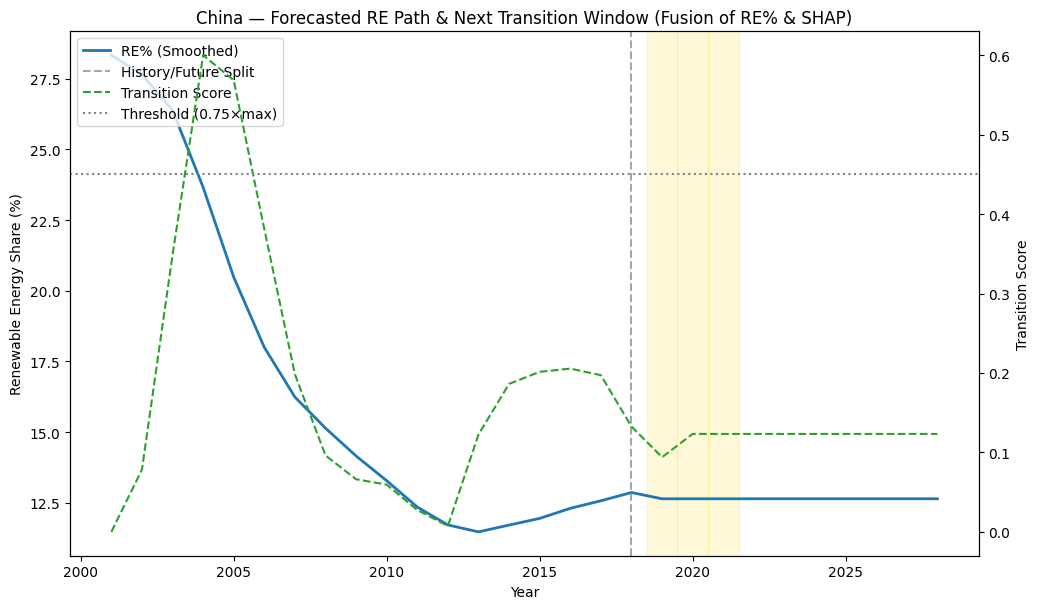

‚úÖ Êú™Êù•ËΩ¨ÊäòÈ¢ÑÊµãÂ∑≤ÂÆåÊàê„ÄÇ
üéØ Predicted future transition window: 2019‚Äì2021 (peak 2020)
üìÅ ËæìÂá∫Ë∑ØÂæÑÔºöresults_RENEW_dynamic/future_forecast


In [ ]:
# %% ================================================
# üöÄ Èò∂ÊÆµÂõõÔºöÊú™Êù•ËΩ¨ÊäòÊó∂Èó¥È¢ÑÊµãÔºàÊâøÊé•‰∏äÊñπ Rolling SHAP Èò∂ÊÆµÔºâ
# ===================================================
import os, warnings
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
warnings.filterwarnings("ignore")

# ---------- Ë∑ØÂæÑÈÖçÁΩÆ ----------
DATA_PATH = "China_cleaned_final.csv"
TARGET = "Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS"
OUTROOT = "results_RENEW_dynamic"
OUTDIR  = os.path.join(OUTROOT, "future_forecast")
os.makedirs(OUTDIR, exist_ok=True)

HORIZON_YEARS   = 10      # Êú™Êù•È¢ÑÊµãË∑®Â∫¶ÔºàÂπ¥Ôºâ
ALPHA           = 0.6     # ËûçÂêàÊùÉÈáçÔºàRE‰ø°Âè∑ vs Êú∫Âà∂‰ø°Âè∑Ôºâ
THRESH_FRAC     = 0.75    # ËΩ¨ÊäòÈòàÂÄºÊØî‰æãÔºàË∂ä‰ΩéË∂äÂÆΩÊùæÔºâ
SMOOTH_WIN      = 3       # Âπ≥ÊªëÁ™óÂè£ÔºàÂπ¥Ôºâ
PELT_PEN_SCALE  = 2.0     # rupturesÊÉ©ÁΩöÁ≥ªÊï∞
RUPTURES_MODEL  = "rbf"

# ---------- Ê£ÄÊü•‰∏äÊ∏∏ÂèòÈáè ----------
if "X" not in locals() or "y" not in locals() or "years_w" not in locals():
    raise RuntimeError("‚ùå Êú™Ê£ÄÊµãÂà∞ X, y, years_w ÂèòÈáèÔºåËØ∑ÂÖàËøêË°åÂä®ÊÄÅÂª∫Ê®°Èò∂ÊÆµ„ÄÇ")

# ---------- ËÆ≠ÁªÉ‚ÄúÂÖ®Ê†∑Êú¨‚ÄùÊ®°Âûã ----------
final_model = XGBRegressor(
    n_estimators=320, learning_rate=0.06, max_depth=3,
    subsample=0.9, colsample_bytree=0.9, random_state=42,
    objective="reg:squarederror"
)
final_model.fit(X, y)
print("‚úÖ ÂÖ®Ê†∑Êú¨Ê®°ÂûãËÆ≠ÁªÉÂÆåÊàê„ÄÇ")

# ---------- Êú™Êù•Ë∑ØÂæÑÈ¢ÑÊµã ----------
cols_all = X.columns.tolist()
y_lag_col = [c for c in cols_all if c.endswith("_lag1") and TARGET in c]
y_lag_col = y_lag_col[0] if len(y_lag_col) > 0 else None

def is_lag(c): return c.endswith("_lag1")
exog_cols_nowlag = [c for c in cols_all if not is_lag(c)]
exog_cols_lag = [c for c in cols_all if is_lag(c) and c != y_lag_col]
X_last = X.iloc[[-1]].copy()
hist_year_last = int(years_w.iloc[-1])

def recent_ewma(col):
    k = min(3, len(X))
    return X[col].tail(k).ewm(span=k, adjust=False).mean().iloc[-1]

future_years = [hist_year_last + i for i in range(1, HORIZON_YEARS+1)]
future_rows, prev_y = [], float(y.iloc[-1])

for t in future_years:
    row = {}
    for c in exog_cols_nowlag:
        row[c] = float(recent_ewma(c))
    if len(future_rows) == 0:
        for c in exog_cols_nowlag:
            lagc = c + "_lag1"
            if lagc in exog_cols_lag:
                row[lagc] = float(X_last[c].iloc[0])
    else:
        prev = future_rows[-1]
        for c in exog_cols_nowlag:
            lagc = c + "_lag1"
            if lagc in exog_cols_lag:
                row[lagc] = float(prev[c])
    if y_lag_col:
        row[y_lag_col] = float(prev_y)
    xdf = pd.DataFrame([row], columns=cols_all)
    y_hat = float(final_model.predict(xdf)[0])
    prev_y = y_hat
    row["__Year__"], row["__Yhat__"] = t, y_hat
    future_rows.append(row)

future_df = pd.DataFrame(future_rows)
forecast_path_csv = os.path.join(OUTDIR, "forecast_RENEW_path.csv")
future_df[["__Year__","__Yhat__"]].rename(columns={"__Year__":"Year","__Yhat__":"RE_pred"}).to_csv(forecast_path_csv, index=False)
print("‚úÖ Êú™Êù•È¢ÑÊµãË∑ØÂæÑÂ∑≤ÁîüÊàêÔºöforecast_RENEW_path.csv")

# ---------- Êú∫Âà∂Â±ÇÔºàRolling SHAPÔºâ ----------
ROLLING_SHAP_CSV = os.path.join(OUTROOT, "rolling_analysis", "rolling_shap_timeseries.csv")
if os.path.exists(ROLLING_SHAP_CSV):
    s = pd.read_csv(ROLLING_SHAP_CSV)
    keep = [c for c in s["feature"].unique()
            if ("eg.fec.rnew.zs" in c.lower()) or ("renewable energy consumption" in c.lower())
            or ("fm.lbl.bmny.gd.zs" in c.lower()) or ("broad money" in c.lower())]
    s2 = s[s["feature"].isin(keep)]
    mech_hist = (s2.groupby("mid_year")["mean_abs_shap"].mean()).sort_index()
    ewma = mech_hist.ewm(span=min(5, len(mech_hist)), adjust=False).mean()
    slope = float(ewma.diff().iloc[-1]) if len(ewma) >= 2 else 0.0
    decay = 0.6
    mech_future = [max(0.0, float(ewma.iloc[-1]) + (decay**i) * slope * i)
                   for i in range(1, HORIZON_YEARS+1)]
    mech_future = pd.Series(mech_future, index=future_years)
    mech_all = pd.concat([ewma, mech_future])
    print("üîó Â∑≤ËûçÂêàÊú∫Âà∂Â±ÇÔºàRolling SHAPÔºâËØÅÊçÆ„ÄÇ")
else:
    print("‚ÑπÔ∏è Êú™ÊâæÂà∞ rolling_shap_timeseries.csvÔºåÊú∫Âà∂Â±Ç‰ΩøÁî®Â∏∏Êï∞Â§ñÊé®„ÄÇ")
    hist_years = list(years_w.values)
    mech_all = pd.Series([0.3]* (len(hist_years)+len(future_years)),
                         index = hist_years + future_years)

# ---------- ËûçÂêà RE% ‰∏é Êú∫Âà∂‰ø°Âè∑ ----------
hist_df = pd.DataFrame({"Year": years_w.values, "RE_true": y.values})
hist_df["RE_smooth"] = hist_df["RE_true"].rolling(SMOOTH_WIN, min_periods=1).mean()
fut_smooth = pd.Series(future_df["__Yhat__"].values,
                       index=future_df["__Year__"]).rolling(SMOOTH_WIN, min_periods=1).mean()
fut_df = pd.DataFrame({"Year": future_df["__Year__"], "RE_pred": future_df["__Yhat__"], "RE_smooth": fut_smooth.values})
all_df = pd.concat([
    hist_df[["Year","RE_smooth"]].assign(kind="history"),
    fut_df[["Year","RE_smooth"]].assign(kind="future")
], ignore_index=True).sort_values("Year")

# ---------- Ê£ÄÊµãÊú™Êù•ÂèòÁÇπ ----------
def detect_cpd_with_ruptures(x, model="rbf", pen_scale=2.0):
    import ruptures as rpt
    algo = rpt.Pelt(model=model).fit(x)
    pen = np.std(x)*pen_scale if np.std(x)>0 else 1.0
    bkpts = algo.predict(pen=pen)
    return [i-1 for i in bkpts if 1 <= i-1 <= len(x)-2]

series_all, years_all = all_df["RE_smooth"].values, all_df["Year"].values
try:
    cpd_idx = detect_cpd_with_ruptures(series_all.reshape(-1,1),
                                       model=RUPTURES_MODEL, pen_scale=PELT_PEN_SCALE)
except Exception as e:
    print("‚ö†Ô∏è ruptures ‰∏çÂèØÁî®ÊàñÂ§±Ë¥•Ôºåfallback:", e)
    cpd_idx = []

grad = np.gradient(series_all)
z = (grad - grad.mean()) / (grad.std() + 1e-8)
score_re = (np.abs(z) - np.abs(z).min()) / (np.abs(z).max() - np.abs(z).min() + 1e-8)
for i in cpd_idx:
    for k in (-1,0,1):
        j = i+k
        if 0 <= j < len(series_all):
            score_re[j] = 1.0

mech_aligned = pd.Series(mech_all).reindex(years_all).interpolate().bfill().ffill()
mech_norm = (mech_aligned - mech_aligned.min()) / (mech_aligned.max() - mech_aligned.min() + 1e-8)
transition_score = ALPHA*score_re + (1-ALPHA)*mech_norm

thr = THRESH_FRAC * np.nanmax(transition_score)
mask_future = years_all > hist_year_last
years_future = years_all[mask_future]
score_future = transition_score[mask_future]

cand = years_future[score_future >= thr]
if len(cand) == 0:
    peak_future_idx = np.argmax(score_future)
    peak_year = int(years_future[peak_future_idx])
    win_future = [peak_year-1, peak_year+1]
else:
    blocks, cur = [], [int(cand[0]), int(cand[0])]
    for yv in cand[1:]:
        yv = int(yv)
        if yv == cur[1]+1: cur[1] = yv
        else: blocks.append(cur); cur=[yv,yv]
    blocks.append(cur)
    peak_year = int(years_future[np.argmax(score_future)])
    win_future = max(blocks, key=lambda b: (b[0] <= peak_year <= b[1], b[1]-b[0]))

# ---------- ËæìÂá∫‰∏éÂèØËßÜÂåñ ----------
merged_df = pd.DataFrame({
    "Year": years_all, "RE_smooth": series_all,
    "Score_RE": score_re, "Score_Mechanism": mech_norm,
    "TransitionScore": transition_score, "Kind": all_df["kind"].values
})
merged_df.to_csv(os.path.join(OUTDIR, "future_transition_probs.csv"), index=False)

plt.figure(figsize=(10.5,6.2))
ax1 = plt.gca()
ax1.plot(all_df["Year"], all_df["RE_smooth"], label="RE% (Smoothed)", linewidth=2)
ax1.axvline(hist_year_last, color="grey", linestyle="--", alpha=0.7, label="History/Future Split")
ax1.set_xlabel("Year"); ax1.set_ylabel("Renewable Energy Share (%)")

ax2 = ax1.twinx()
ax2.plot(years_all, transition_score, color="#2ca02c", linestyle="--", label="Transition Score")
ax2.axhline(thr, color="gray", linestyle=":", label=f"Threshold ({THRESH_FRAC:.2f}√ómax)")
ax2.set_ylabel("Transition Score")

for yv in range(int(win_future[0]), int(win_future[1])+1):
    if yv > hist_year_last:
        ax1.axvspan(yv-0.5, yv+0.5, color="gold", alpha=0.15)

if len(cpd_idx) > 0:
    ax1.scatter(years_all[cpd_idx], series_all[cpd_idx],
                color="#d62728", s=30, zorder=3, label="CPD candidates")

lines, labels = [], []
for ax in [ax1, ax2]:
    L = ax.get_legend_handles_labels()
    lines += L[0]; labels += L[1]
ax1.legend(lines, labels, loc="upper left")

plt.title("China ‚Äî Forecasted RE Path & Next Transition Window (Fusion of RE% & SHAP)")
plt.tight_layout()
fig_path = os.path.join(OUTDIR, "future_transition_plot.png")
plt.savefig(fig_path, dpi=170)
plt.show()

# ÊñáÊú¨Êä•Âëä
txt_path = os.path.join(OUTDIR, "predicted_future_transition_window.txt")
with open(txt_path, "w", encoding="utf-8") as f:
    f.write(f"Next transition window (future): {int(win_future[0])}‚Äì{int(win_future[1])} (peak at {int(peak_year)})\n")
    f.write(f"History last year: {hist_year_last}\n")
    f.write(f"Alpha (RE vs Mechanism) = {ALPHA}, Threshold fraction = {THRESH_FRAC}\n")
    f.write("Assumptions: exogenous features via 3y EWMA; recursive forecast of y_lag1.\n")

print("‚úÖ Êú™Êù•ËΩ¨ÊäòÈ¢ÑÊµãÂ∑≤ÂÆåÊàê„ÄÇ")
print(f"üéØ Predicted future transition window: {win_future[0]}‚Äì{win_future[1]} (peak {peak_year})")
print(f"üìÅ ËæìÂá∫Ë∑ØÂæÑÔºö{OUTDIR}")